In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from pandas import DataFrame
import io
import json
import h5py

sns.set_style("white")

In [3]:
'''defines glob object which has all of the files to be under data folder and have filepath of bigwig_intronic/huandy_ and then other.
'''
files = glob("data/bigwig_intronic/huandy_*")


In [39]:
'''Initialize the empty h5 file'''

with h5py.File('data/aggregate_regions.h5', 'w') as h5file:

    '''For each bed file, read and append to the h5 collection'''
    for idx,f in enumerate(files):

        '''Log the current file # to keep track of progress'''
        if idx % 1000 == 0:
            print(idx, end= " ")

        region = pd.read_table(f,names=["chromosome","start","end","conservation"])
        
        '''Convert to correct datatypes'''
        region["start"] = region["start"].astype(int)
        region["end"] = region["end"].astype(int)
        region["conservation"] = region["conservation"].astype(float)

        '''Identify the region by the file name'''
        region_id =f.split("/")[-1]
        
        '''Create separate datasets for start, end, and conservation'''
        h5file.create_dataset(region_id+"_start",  data=region["start"])
        h5file.create_dataset(region_id+"_end",  data=region["end"])
        h5file.create_dataset(region_id+"_conservation",  data=region["conservation"])
        


0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 100000 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000 131000 132000 133000 134000 135000 136000 137000 138000 139000 140000 141000 142000 143000 144000 145000 146000 147000 148000 149000 150000 151000 152000 153000 154000 155000 156000 157000 158000 

In [44]:
with h5py.File('data/aggregate_regions.h5', 'r') as h5file:
    '''For each bed file, read and append to the h5 collection'''
    for idx,f in enumerate(files[:10000]):

        '''Log the current file # to keep track of progress'''
        if idx % 100 == 0:
            print(idx, end= " ")

        '''Identify the region by the file name'''
        region_id =f.split("/")[-1]
        
        x = h5file[region_id+"_conservation"]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 

In [22]:
for idx,f in enumerate(files[:1000]):
    
    if idx % 100 == 0:
        print(idx, end= " ")
    
    region_id =f.split("/")[-1]

    region = pd.read_hdf('data/aggregate_regions.h5',key=region_id)

0 100 200 300 400 500 600 700 800 900 

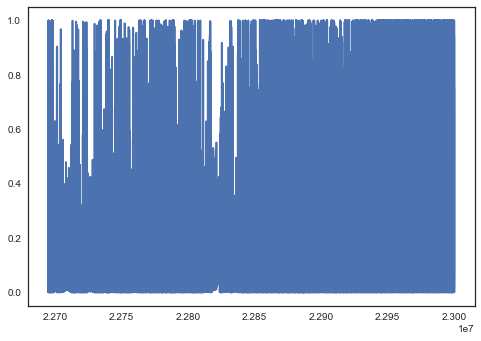

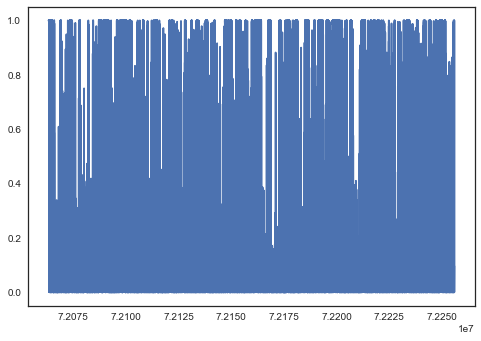

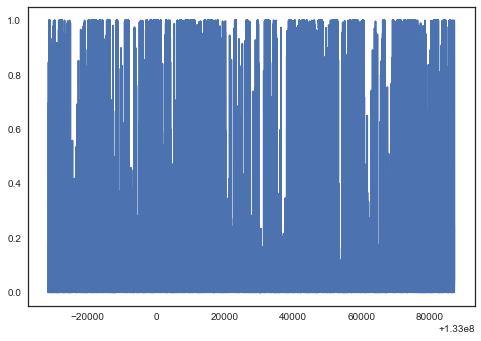

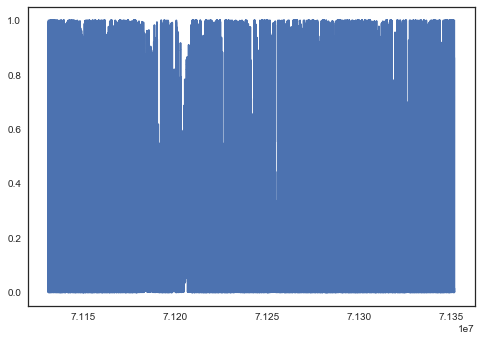

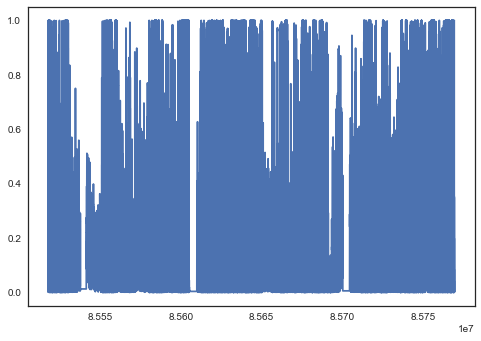

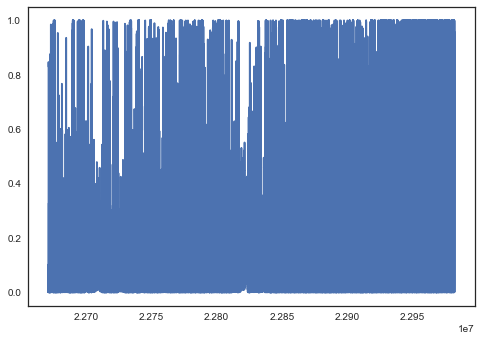

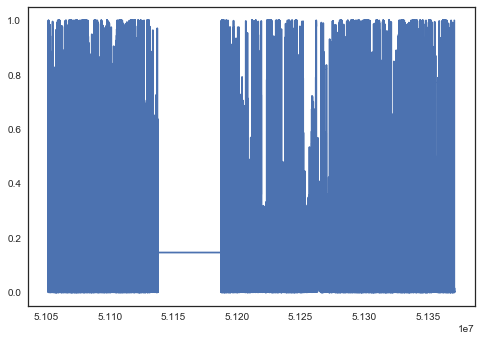

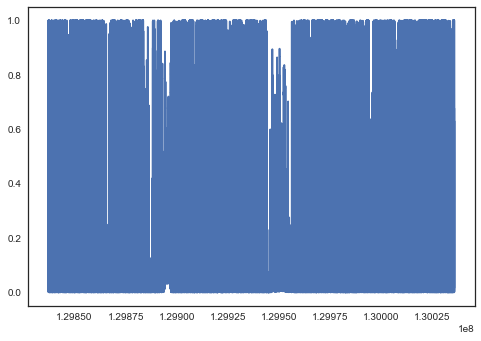

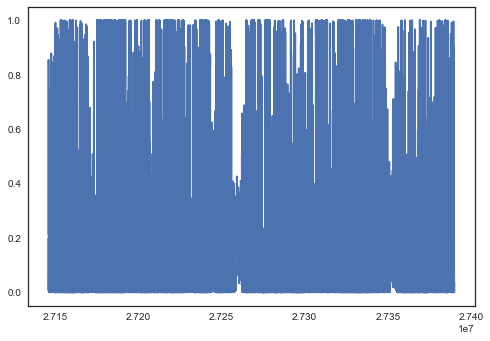

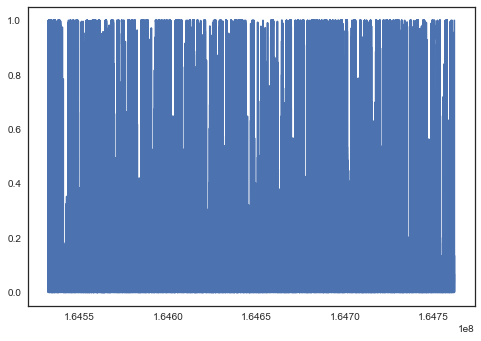

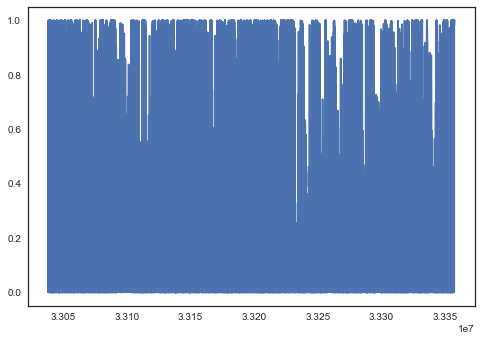

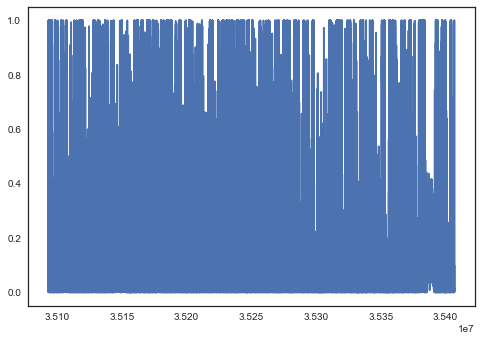

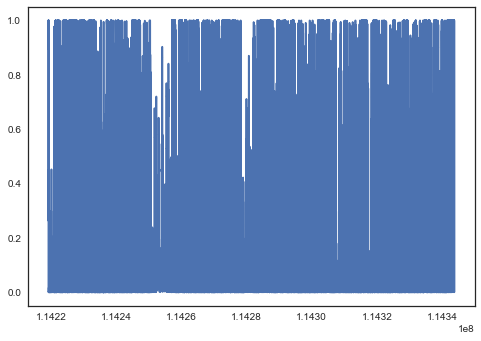

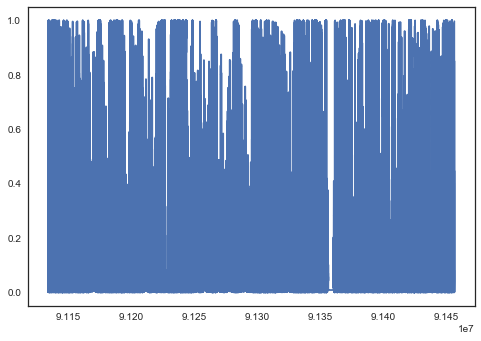

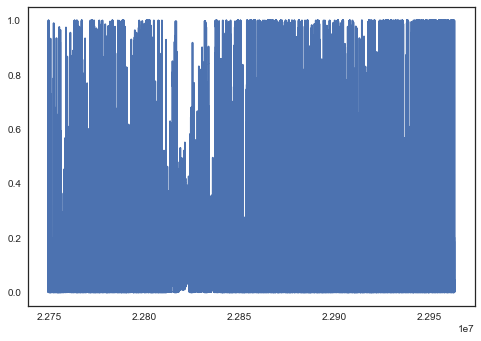

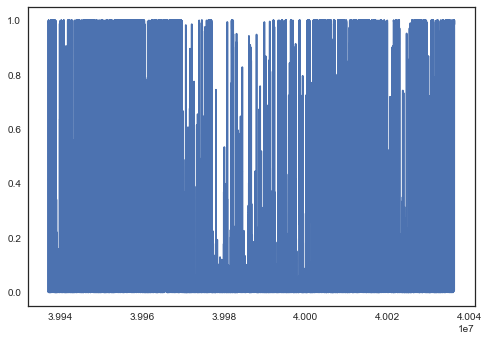

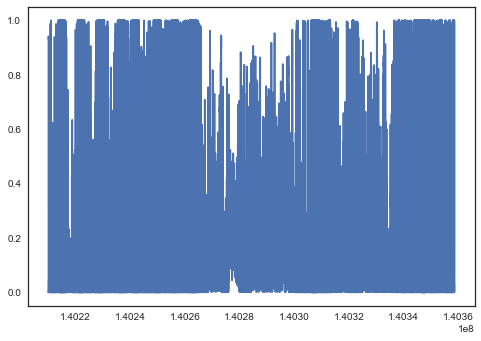

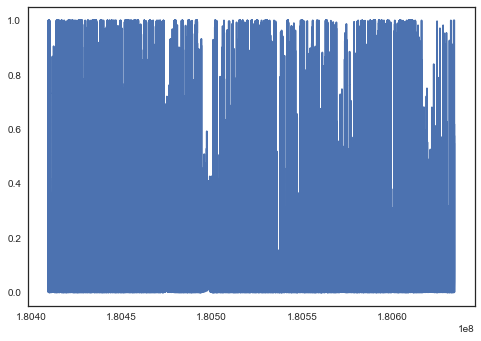

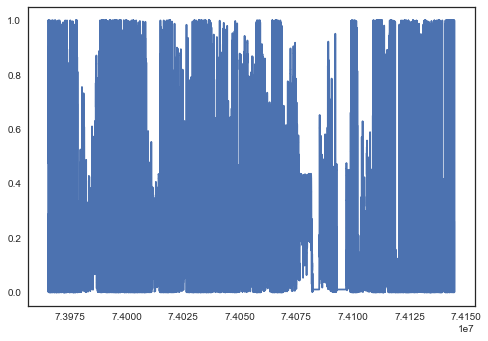

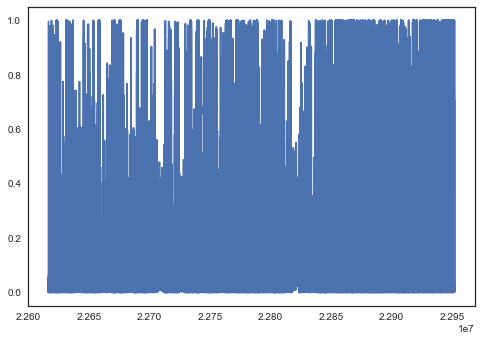

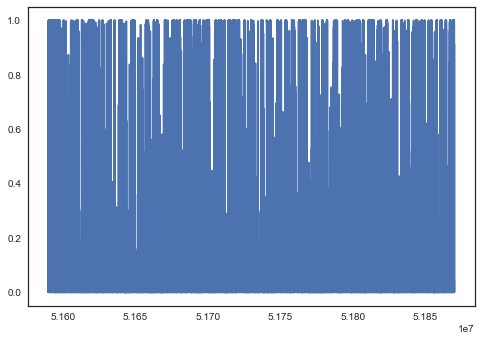

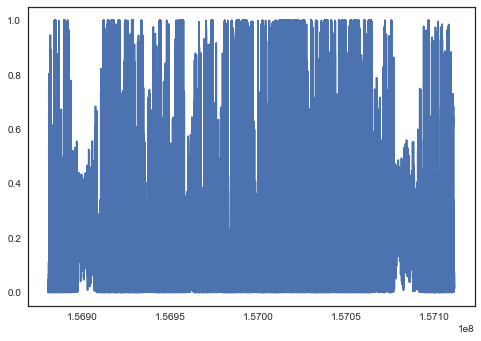

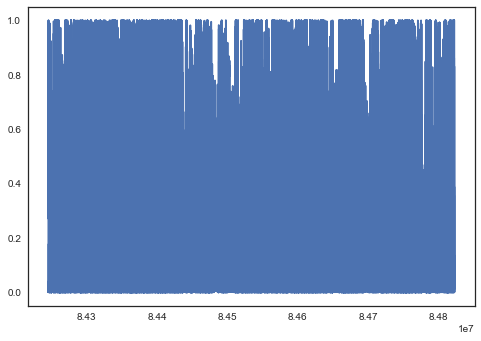

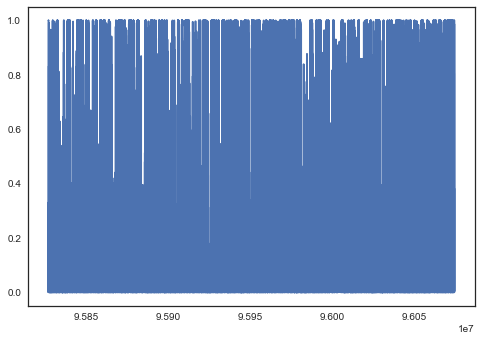

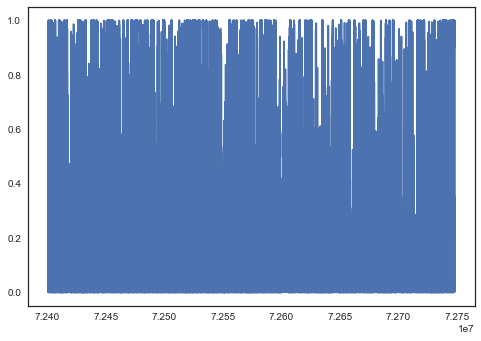

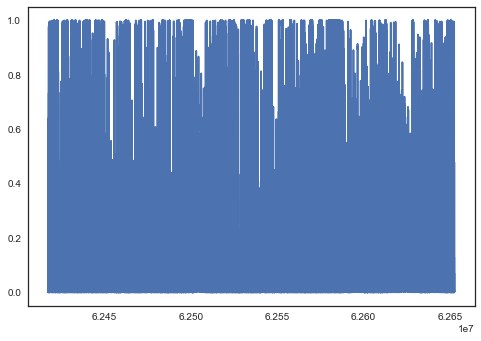

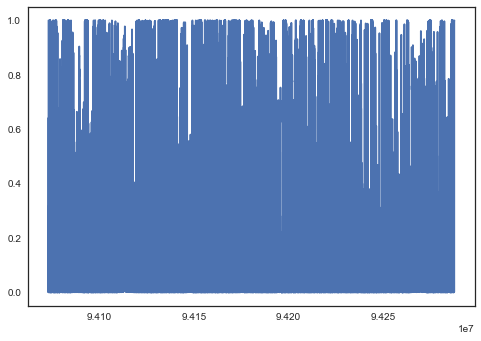

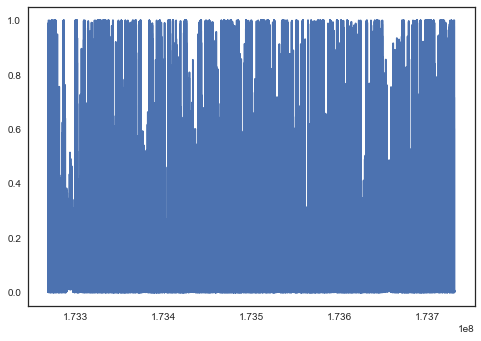

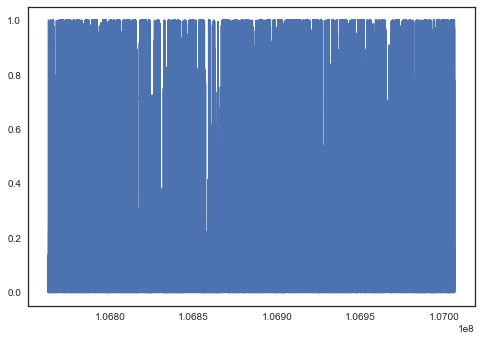

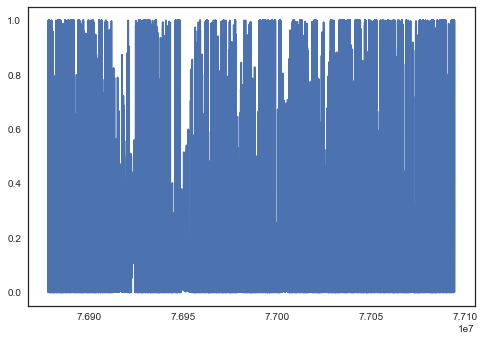

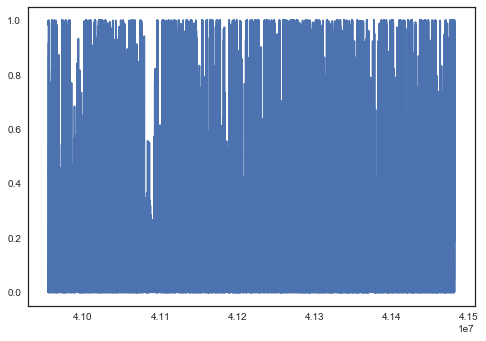

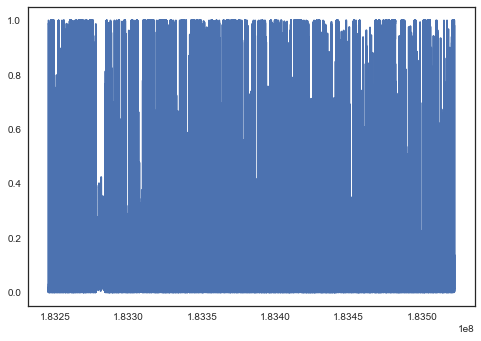

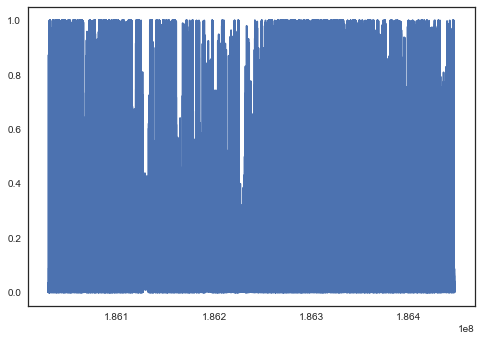

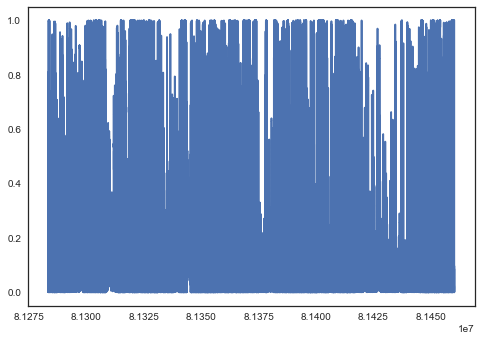

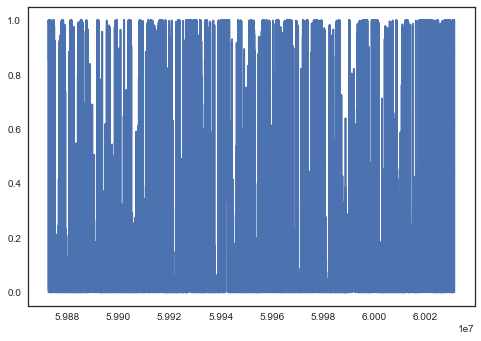

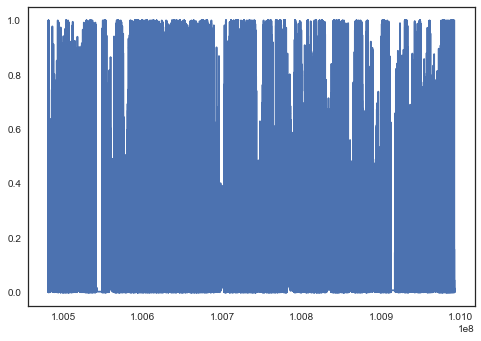

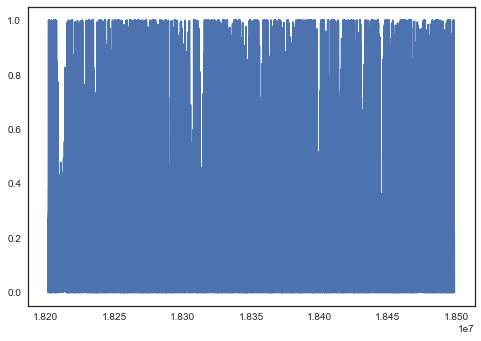

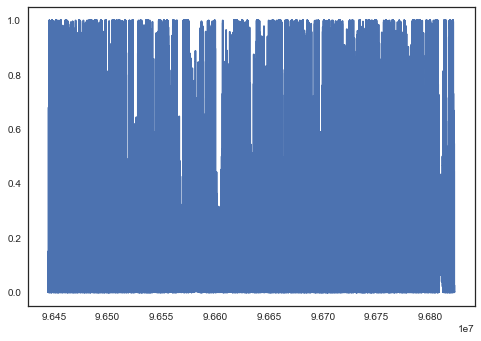

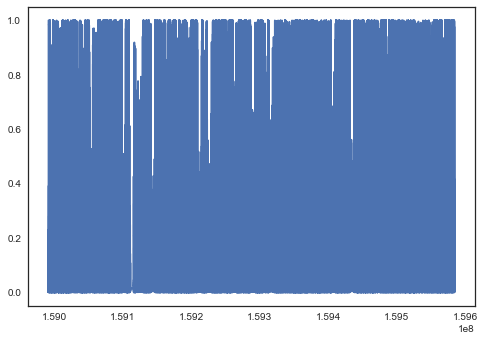

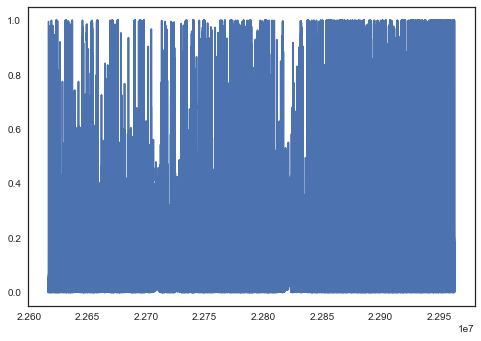

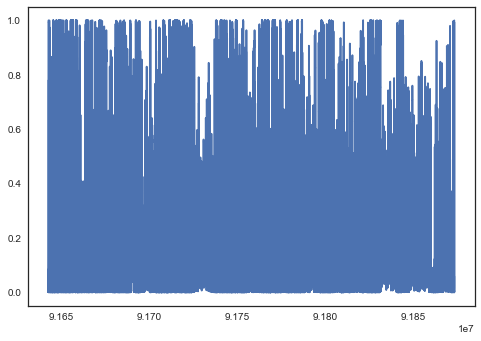

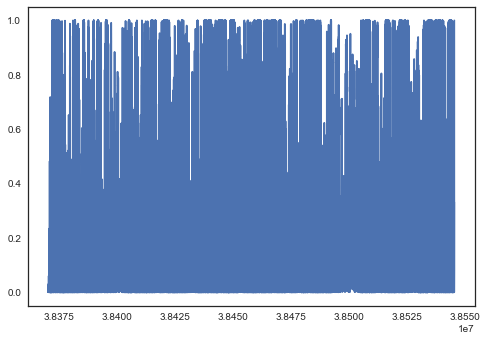

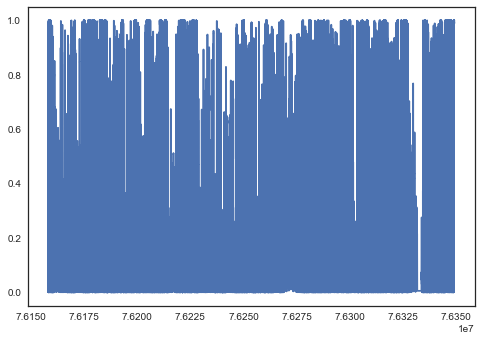

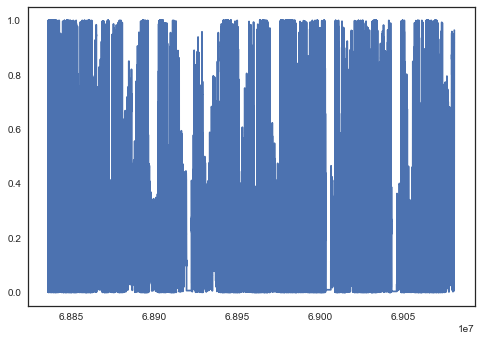

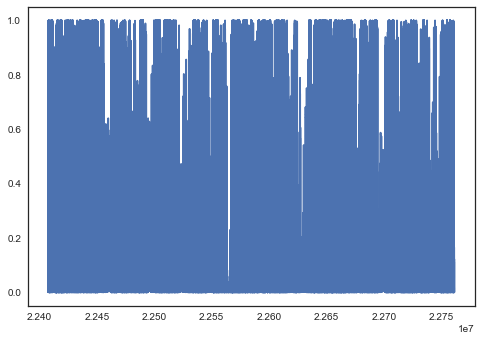

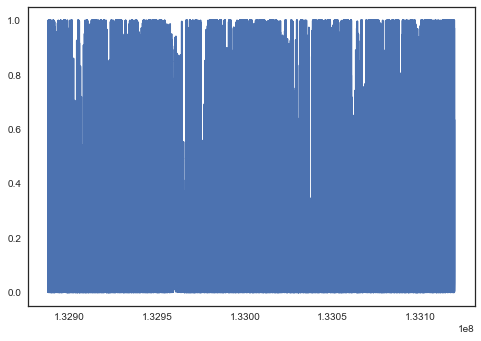

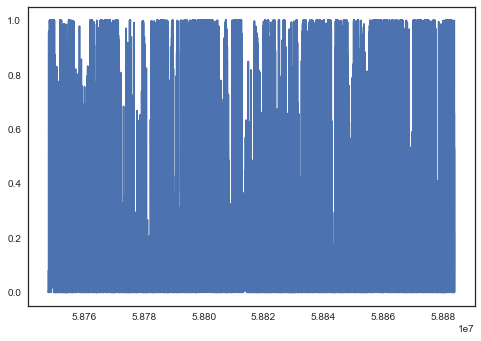

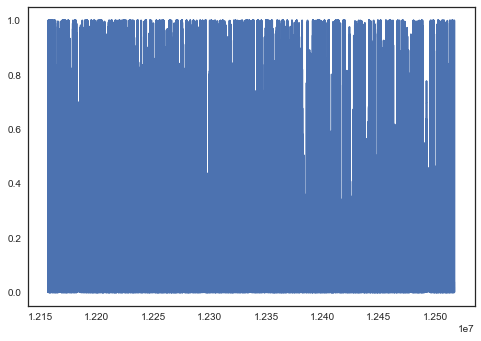

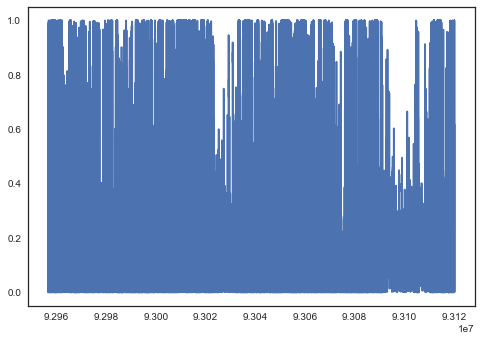

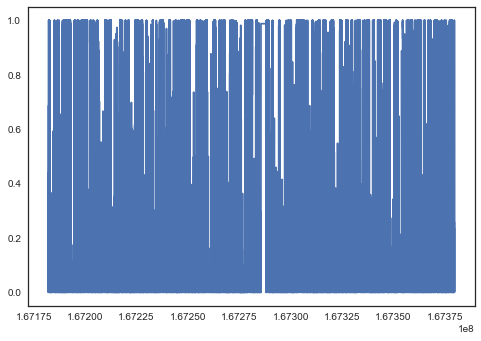

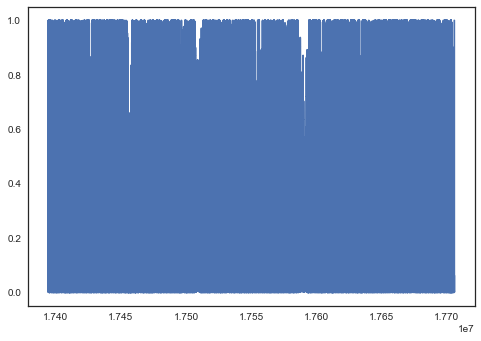

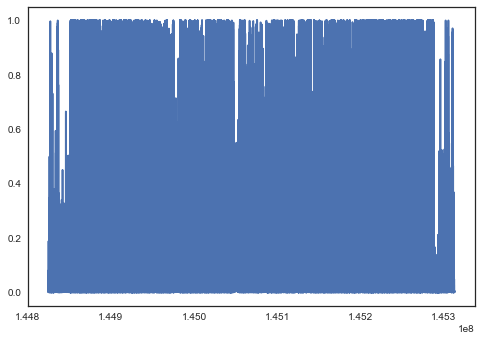

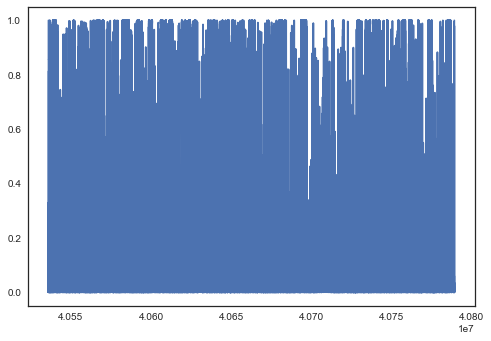

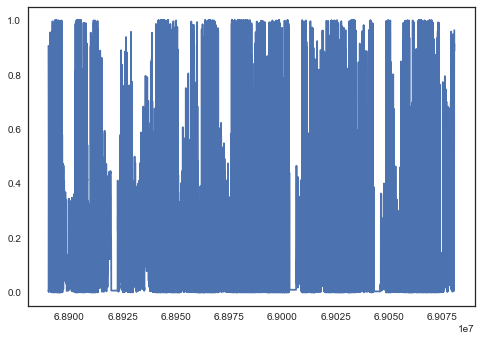

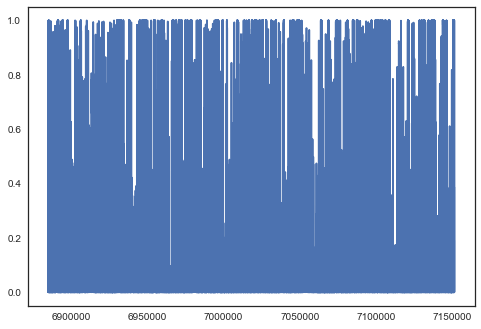

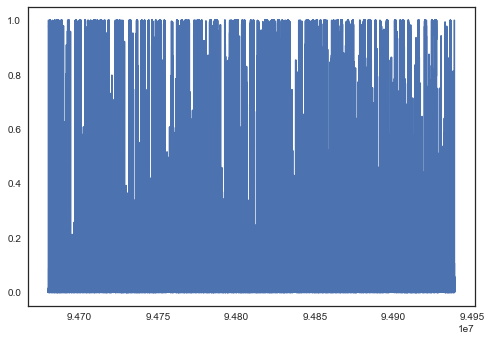

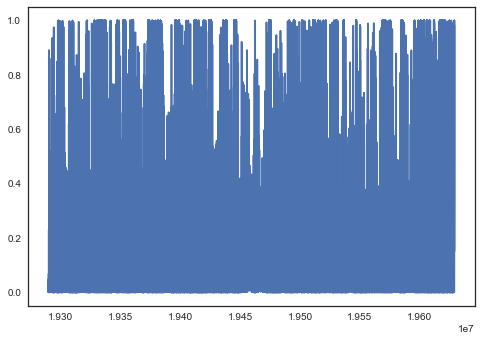

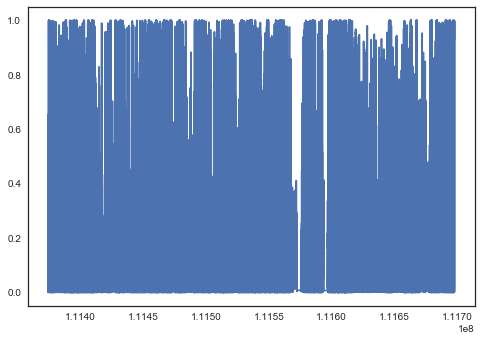

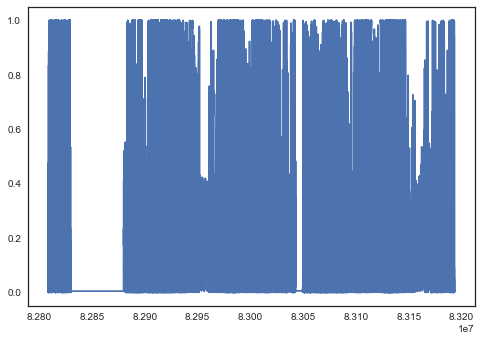

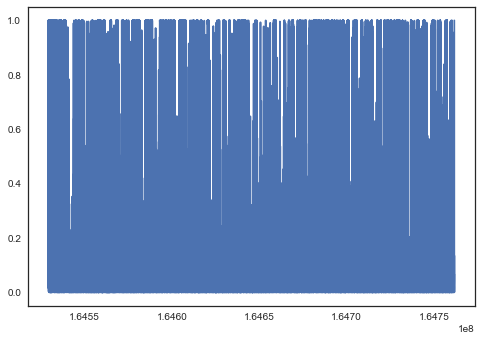

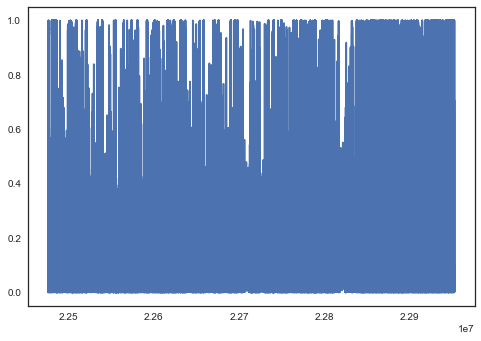

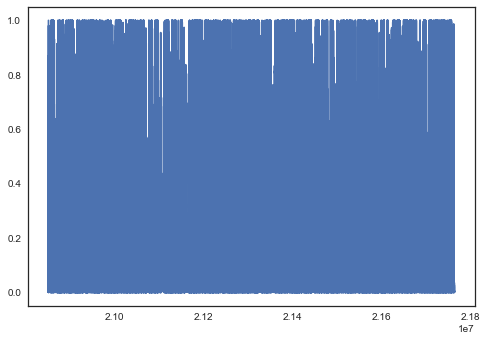

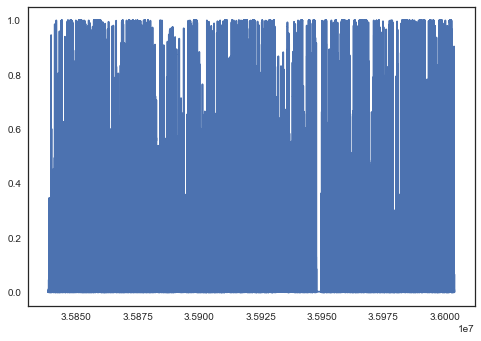

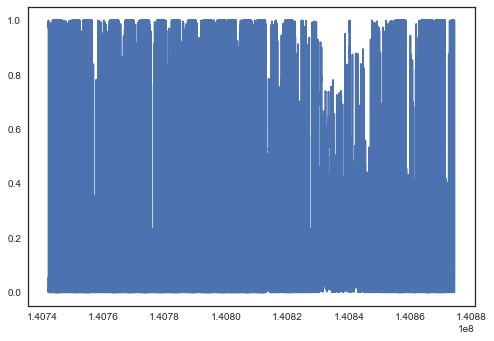

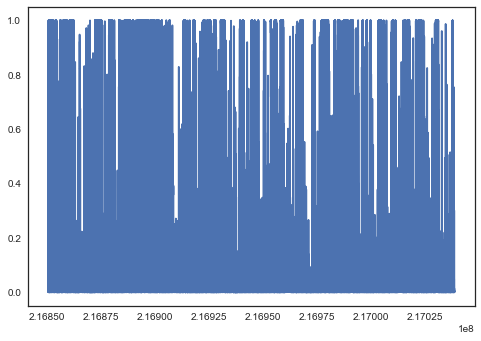

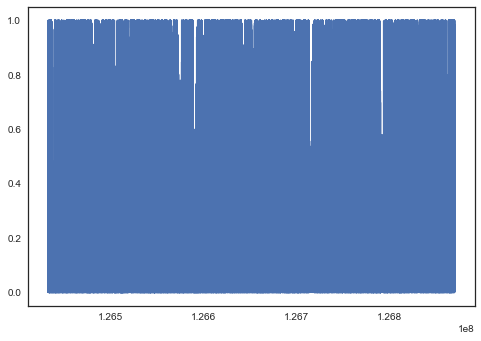

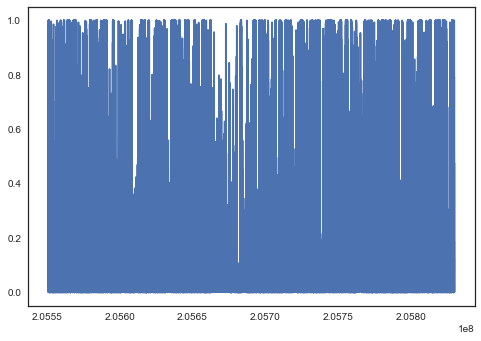

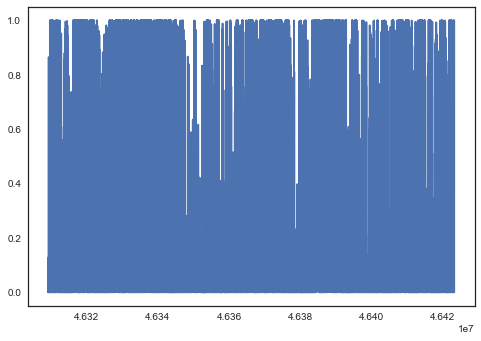

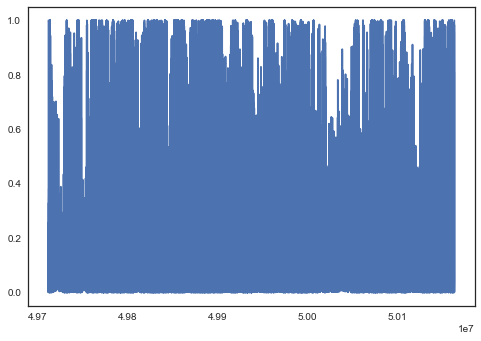

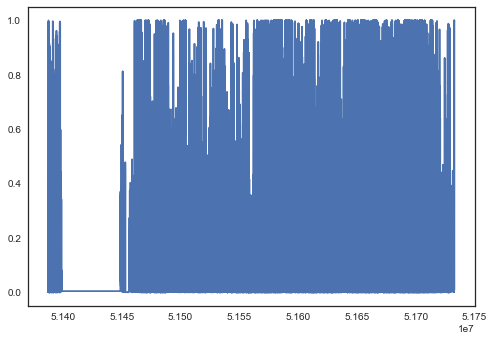

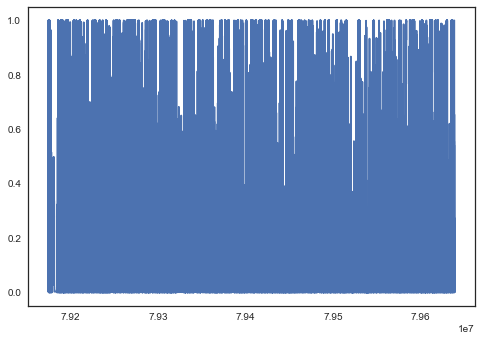

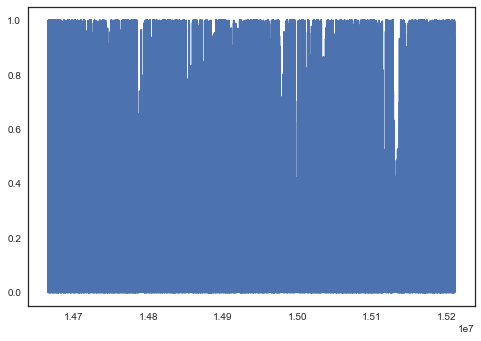

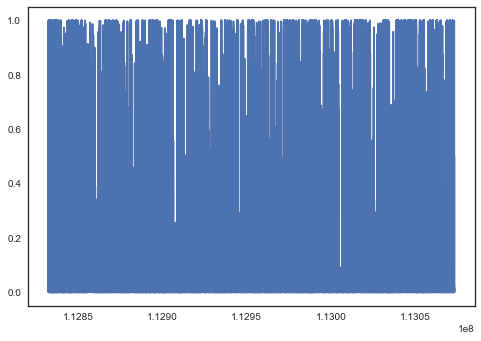

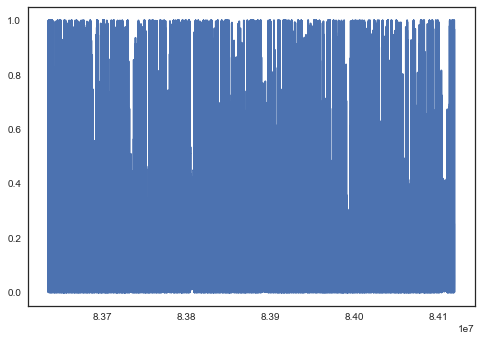

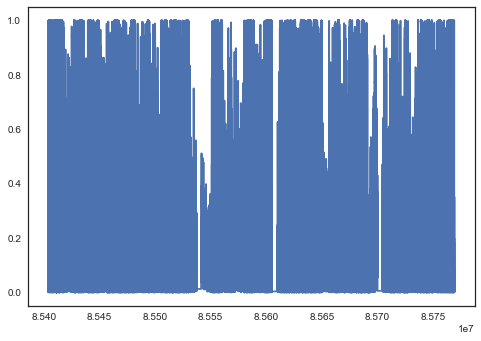

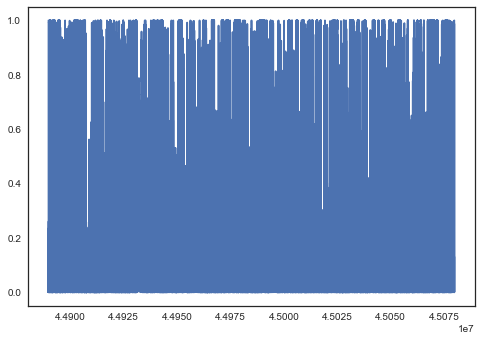

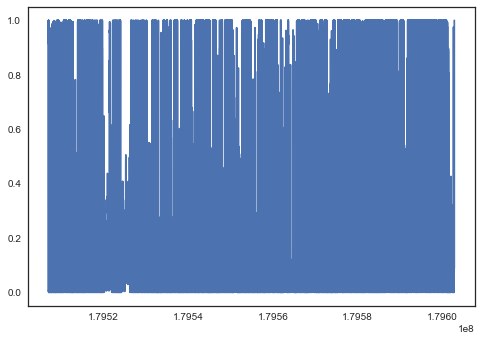

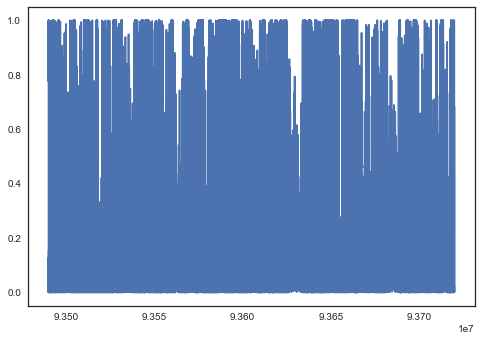

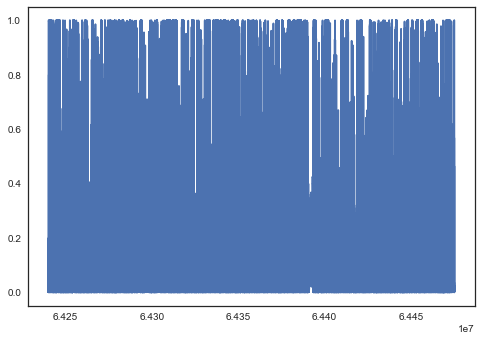

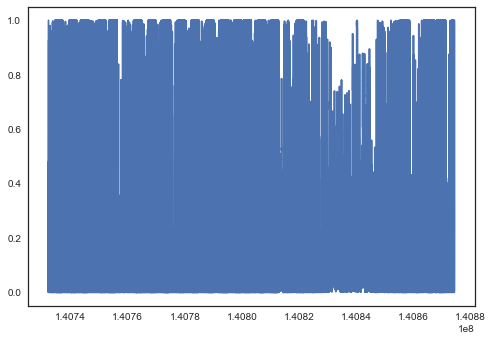

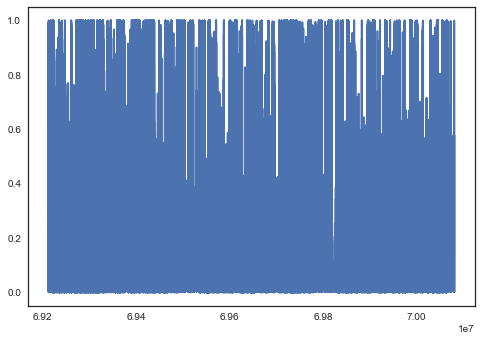

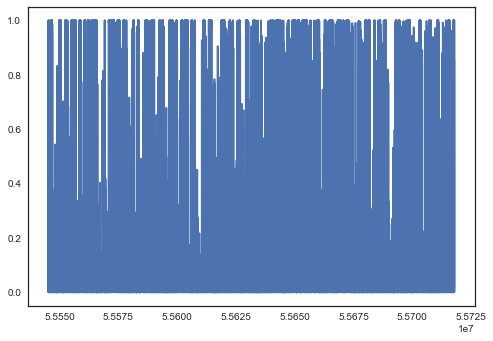

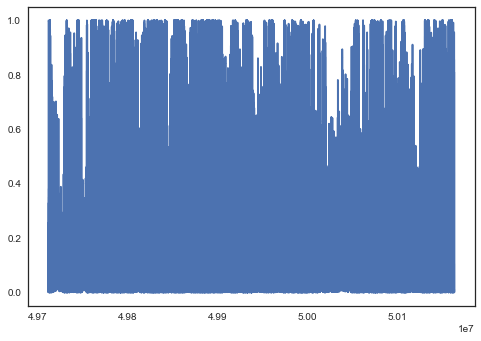

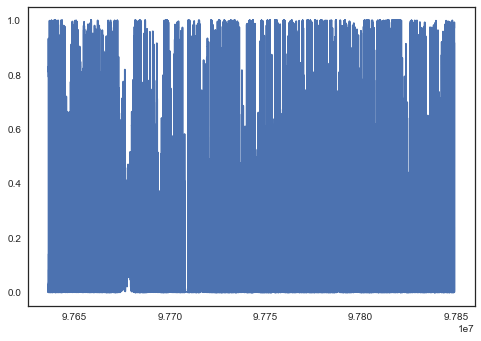

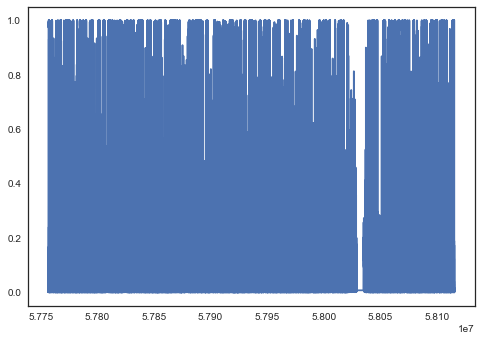

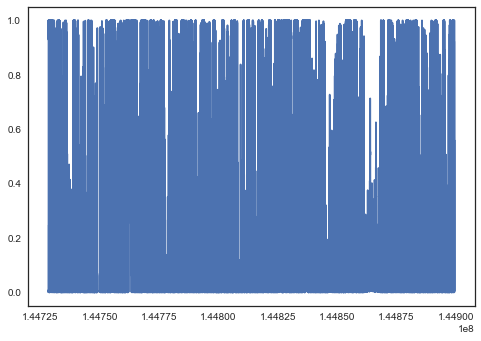

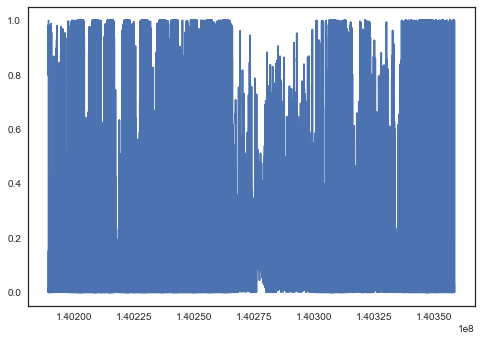

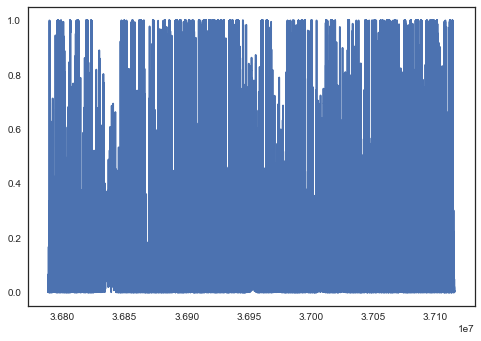

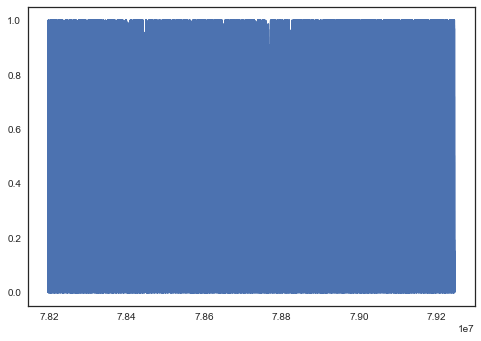

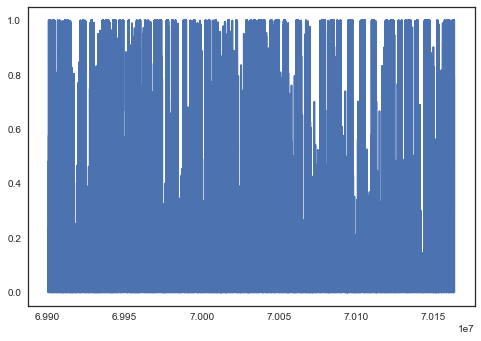

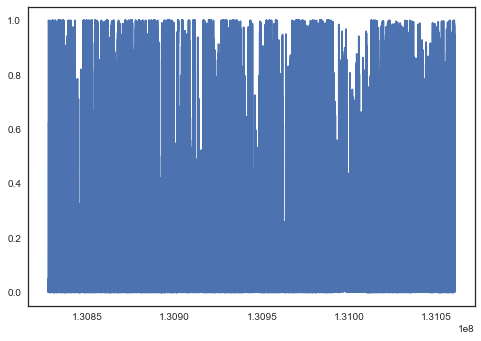

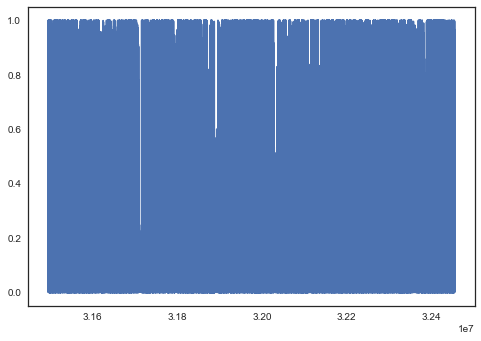

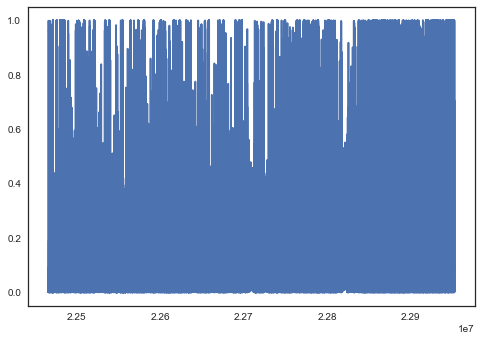

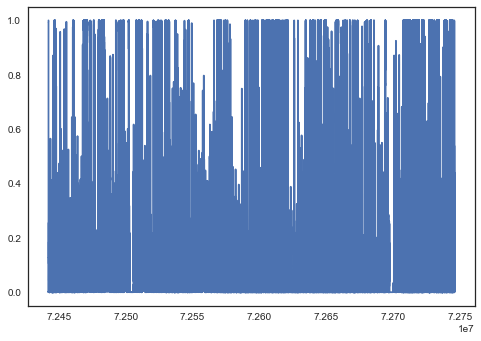

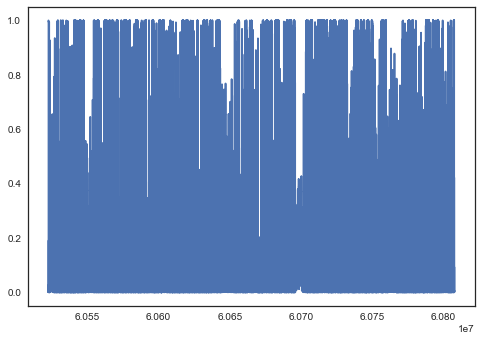

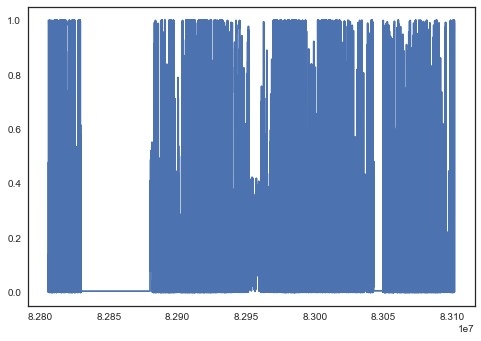

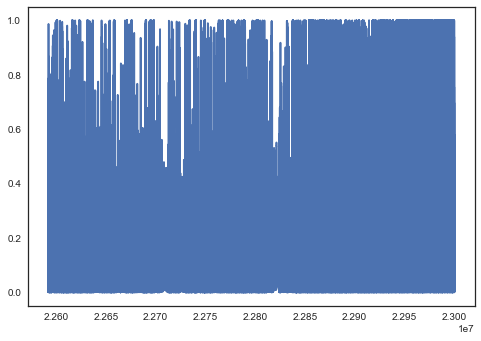

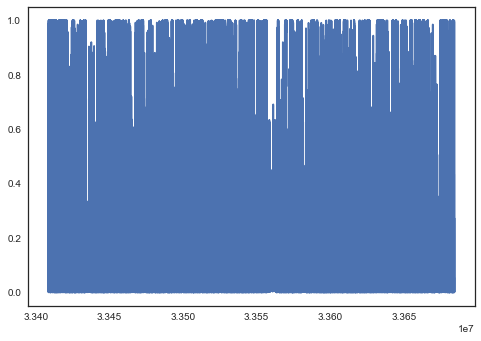

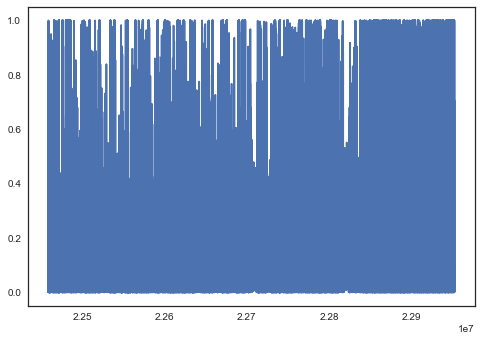

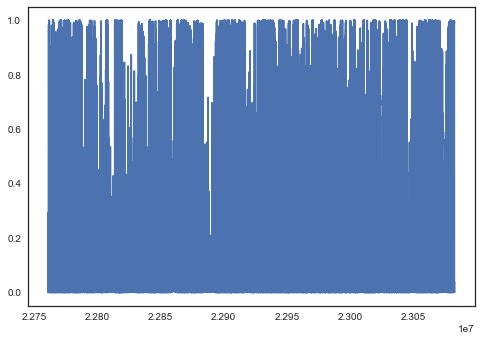

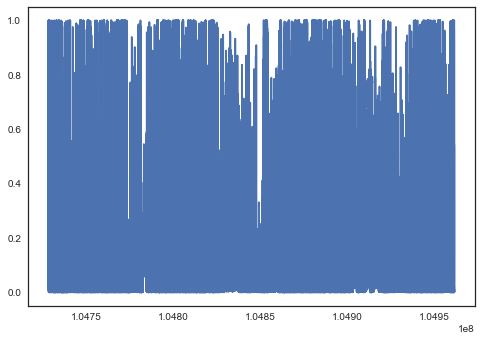

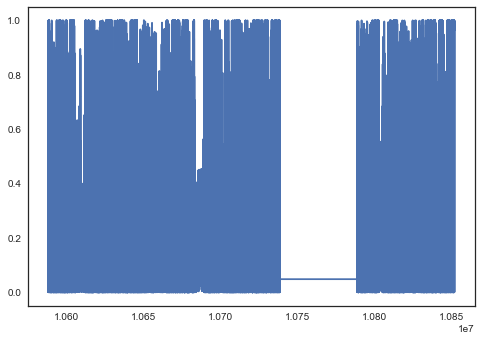

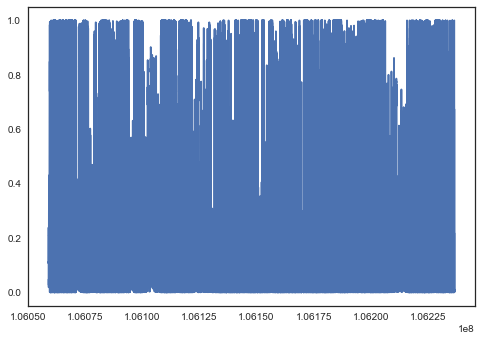

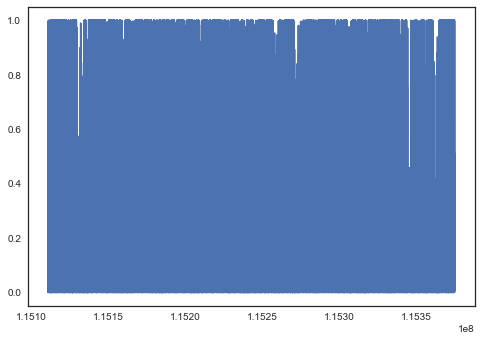

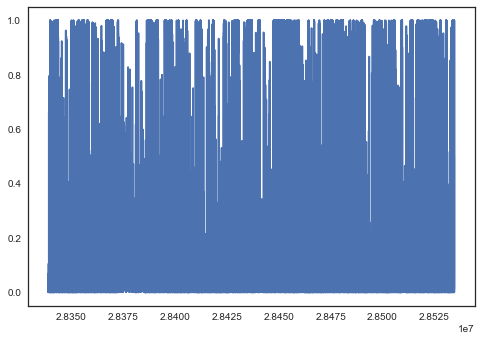

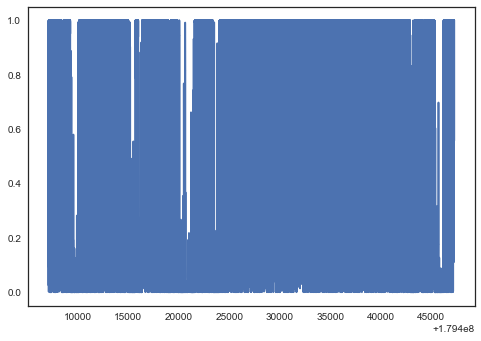

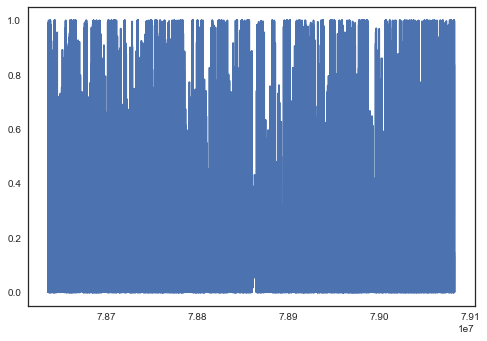

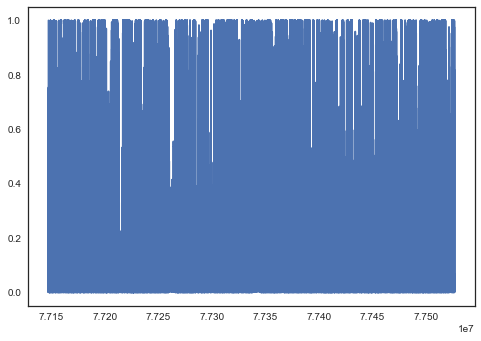

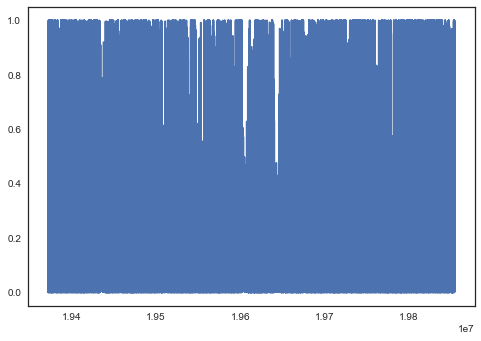

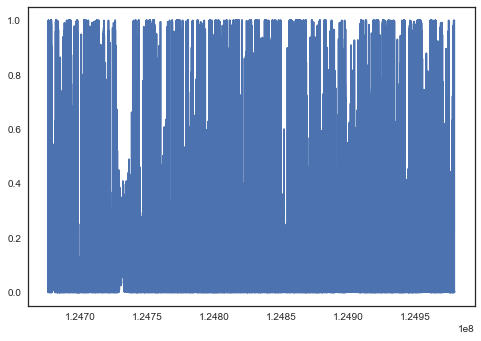

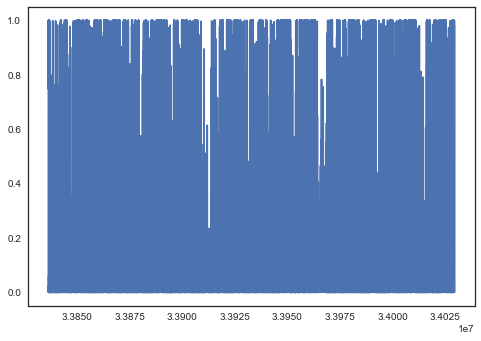

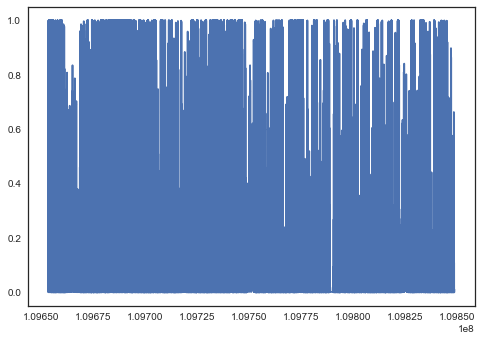

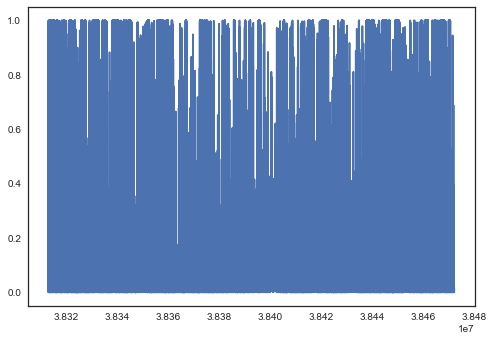

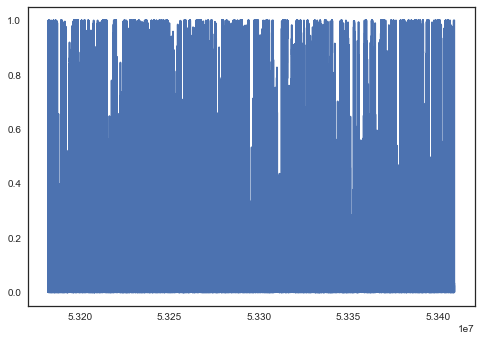

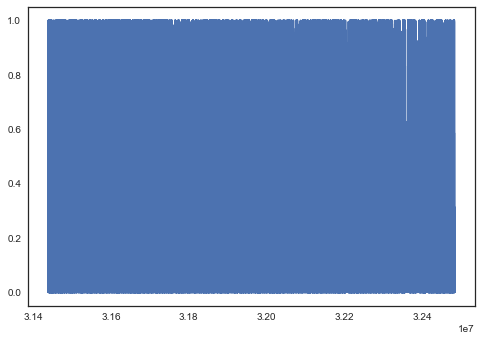

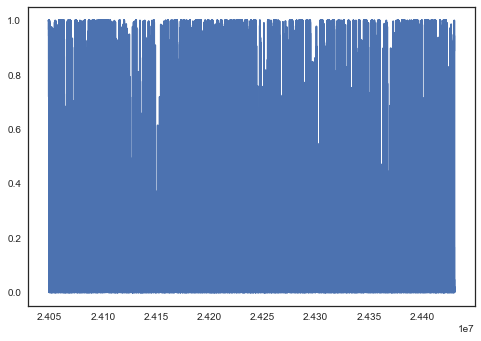

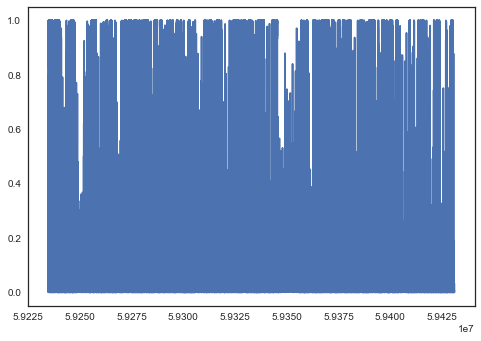

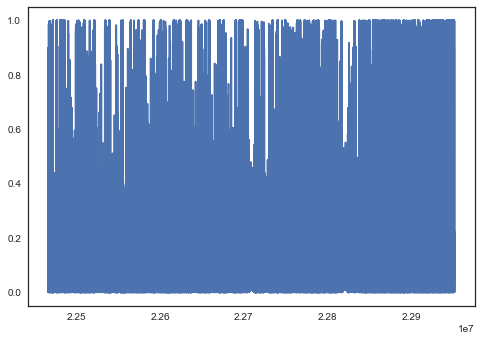

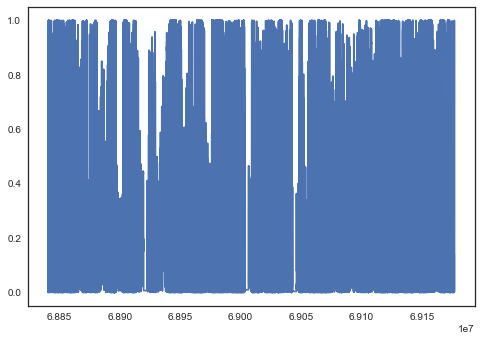

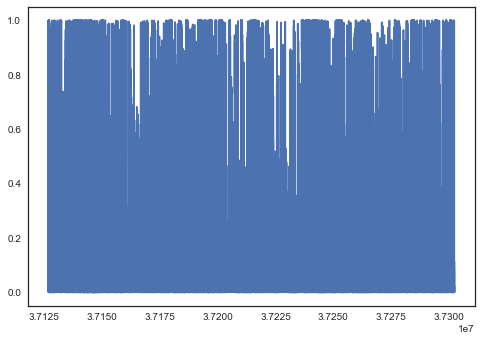

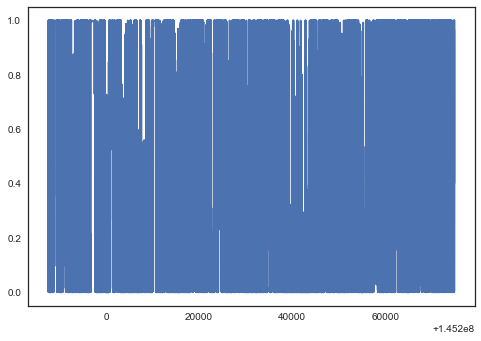

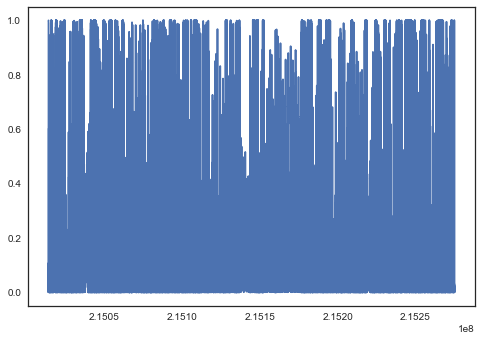

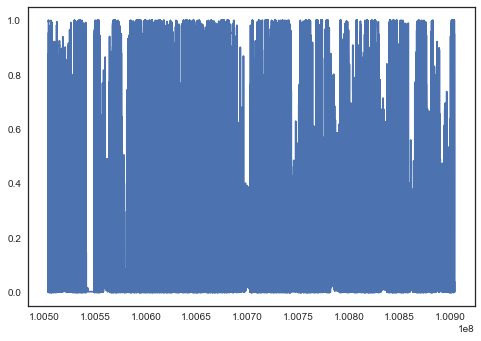

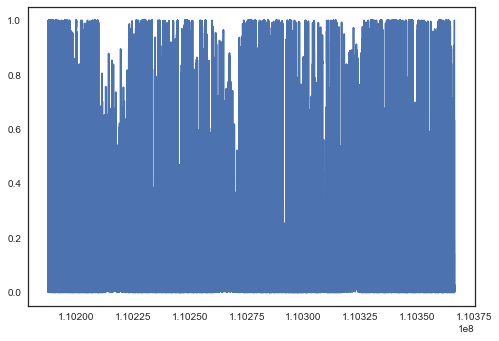

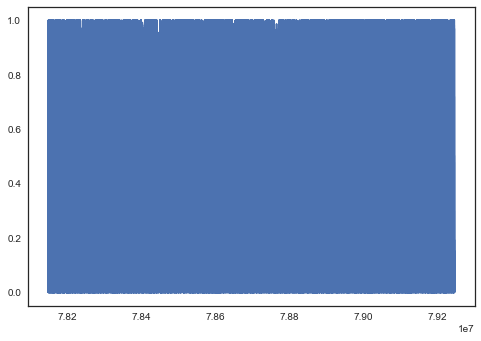

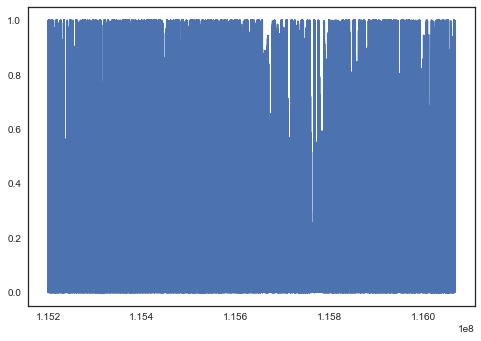

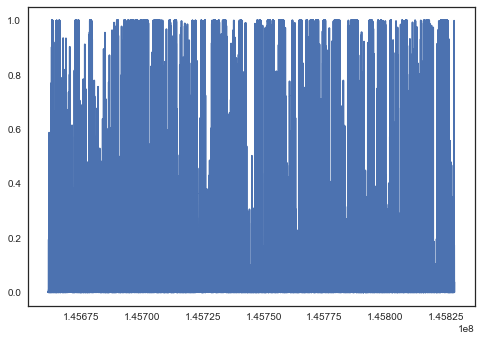

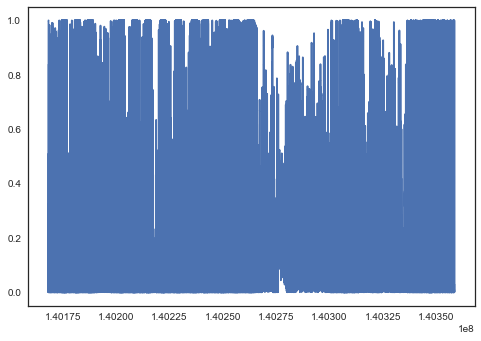

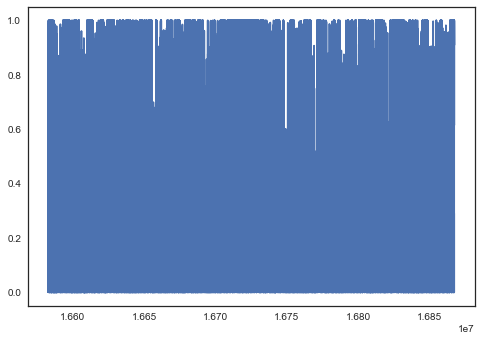

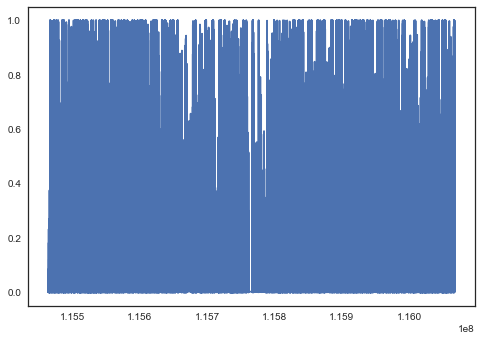

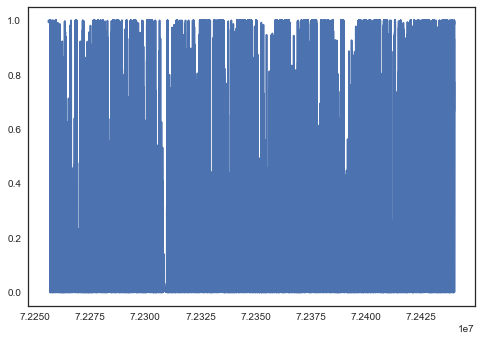

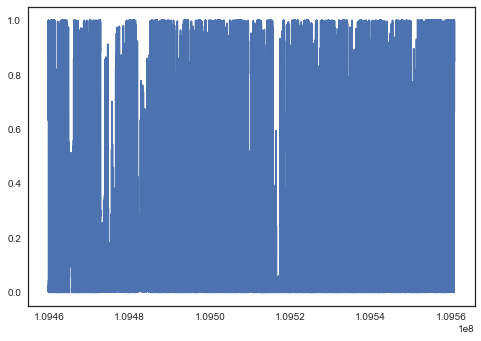

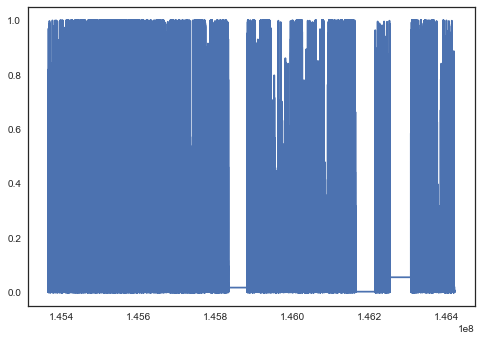

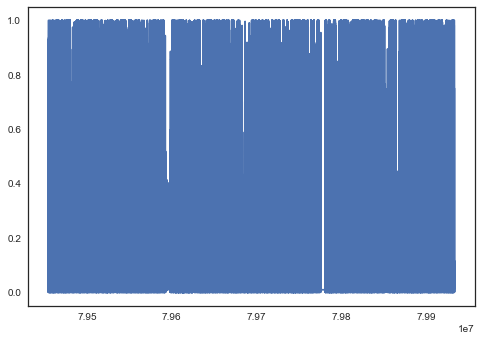

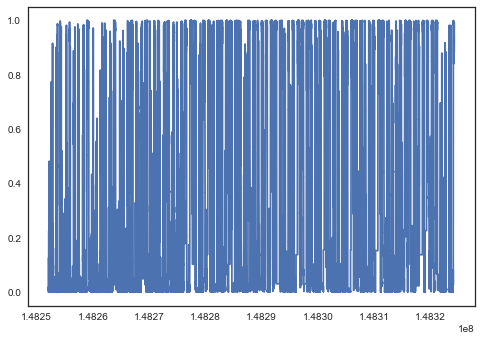

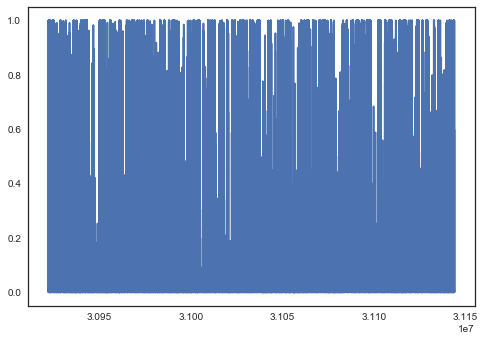

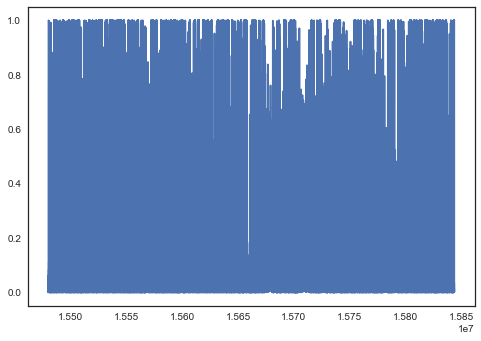

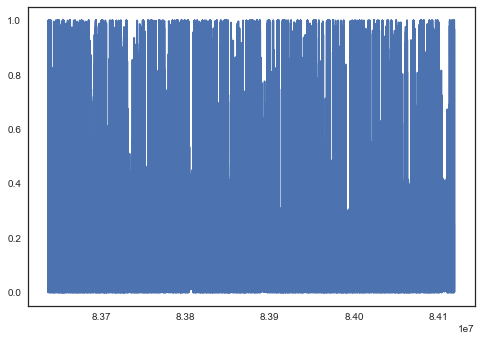

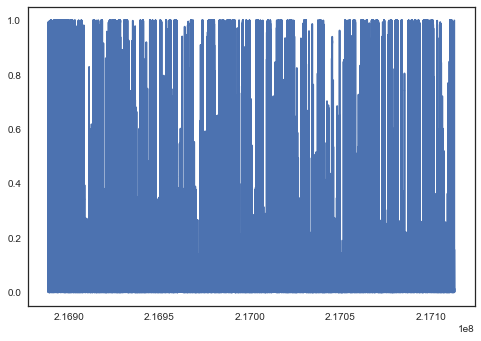

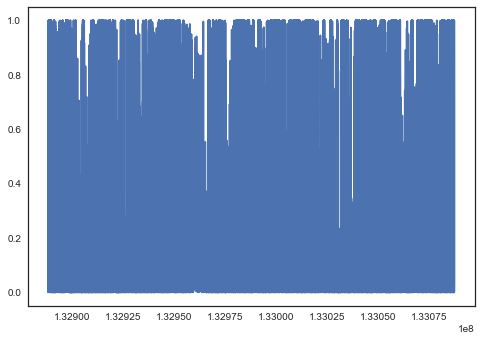

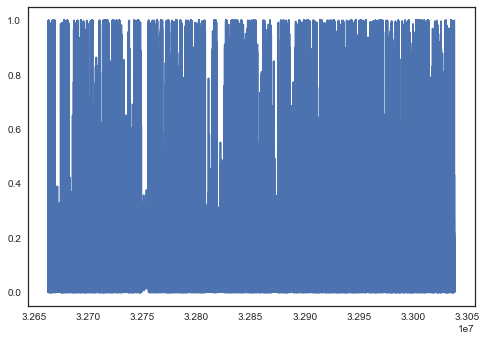

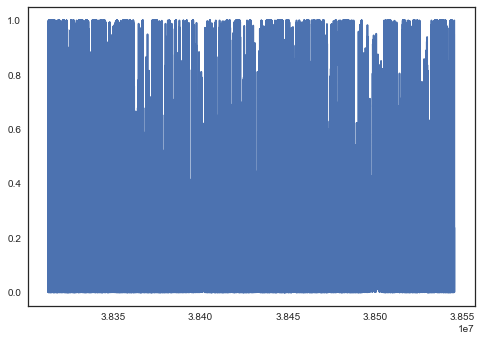

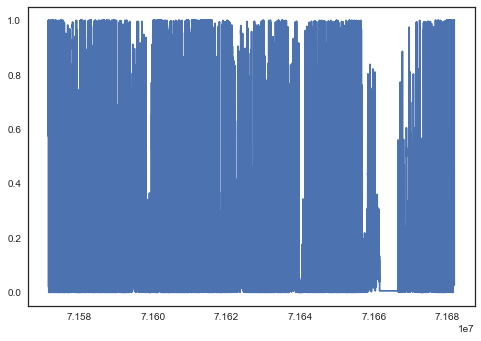

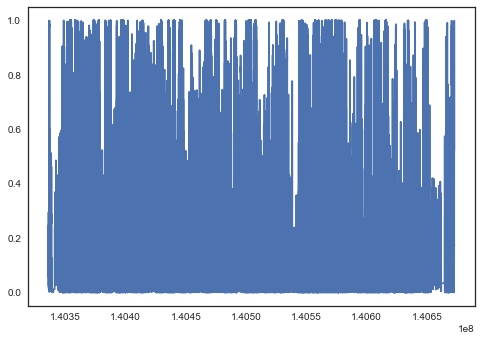

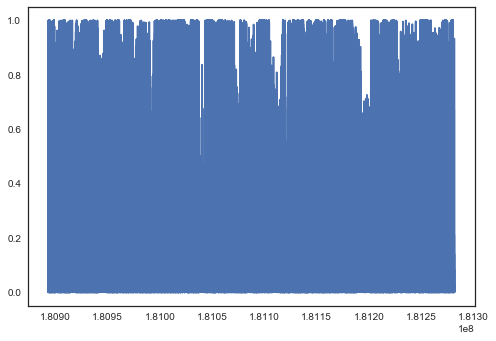

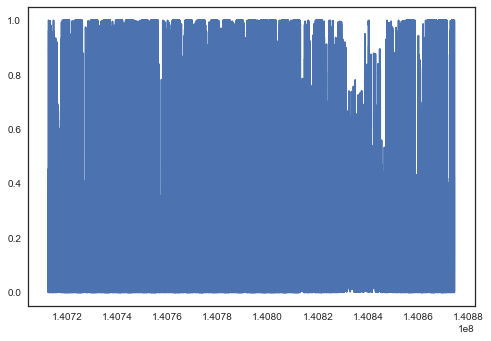

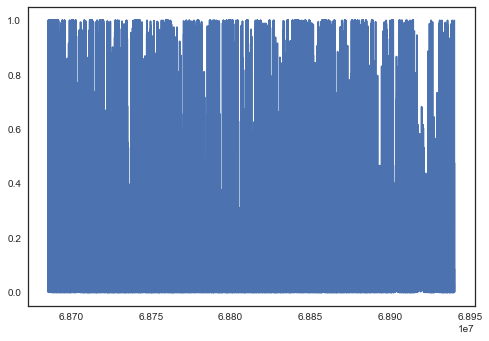

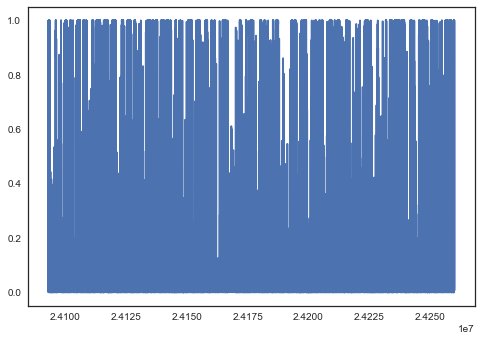

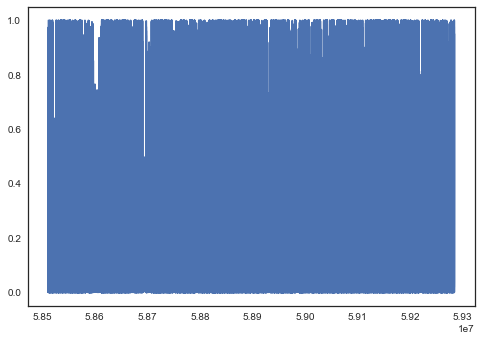

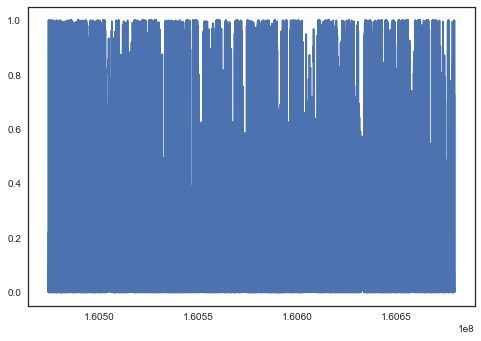

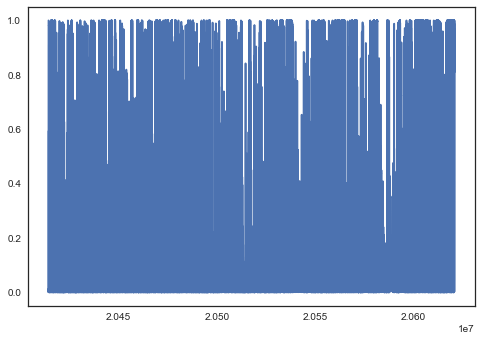

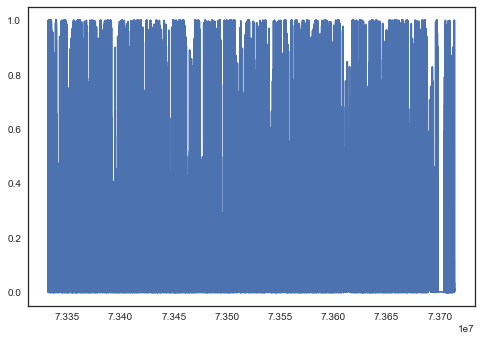

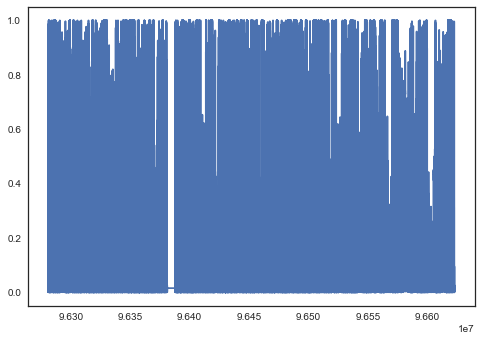

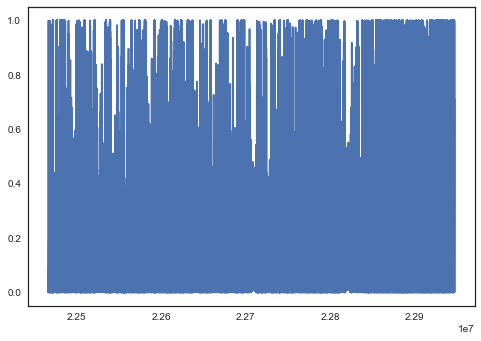

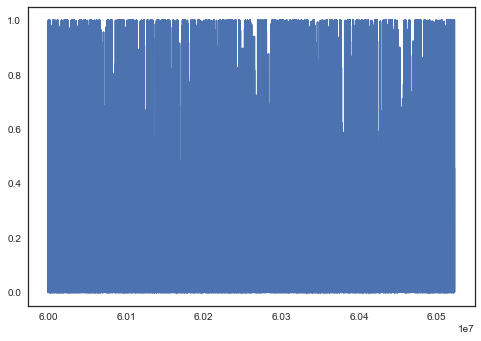

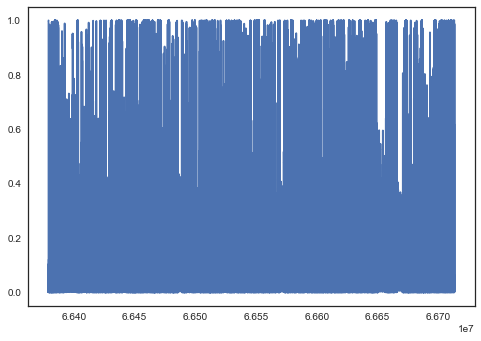

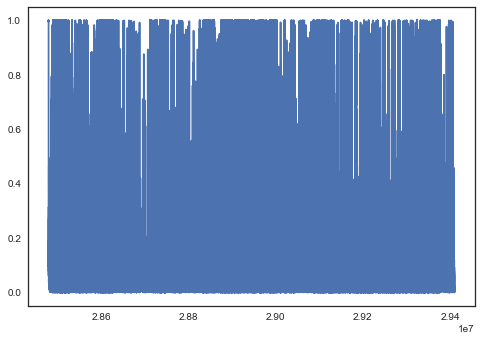

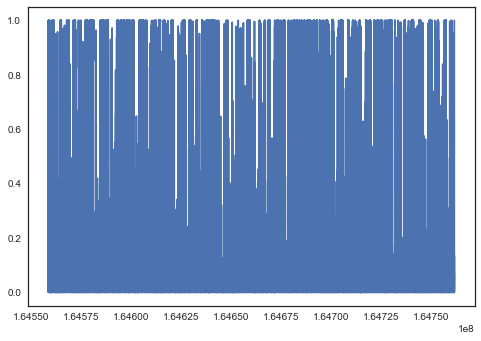

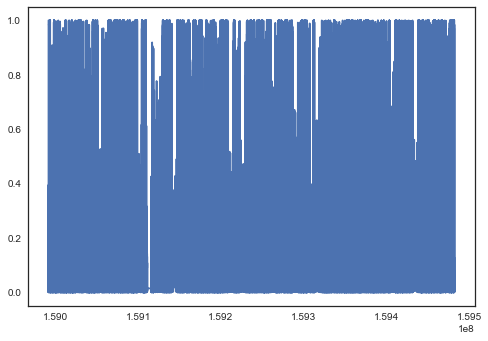

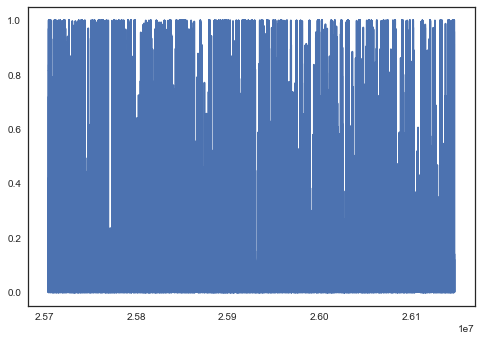

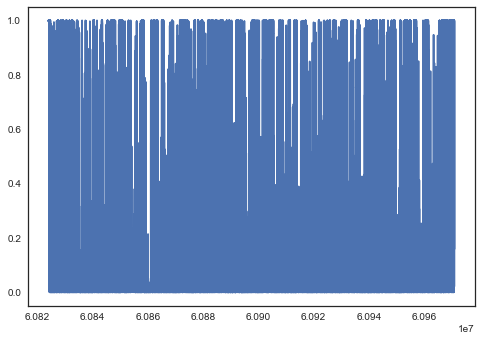

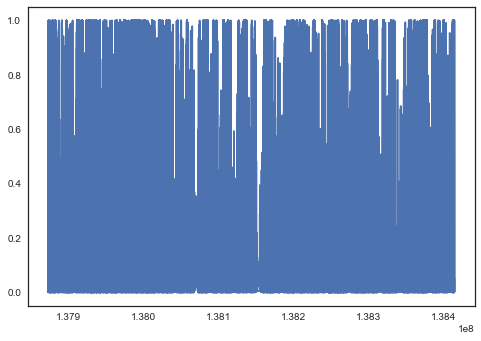

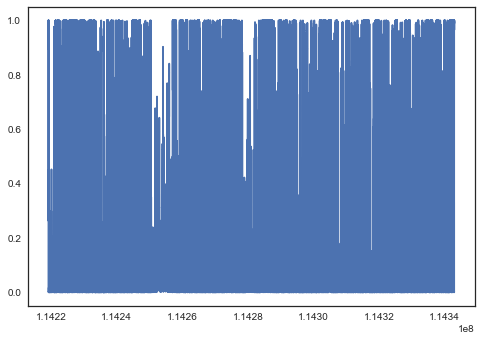

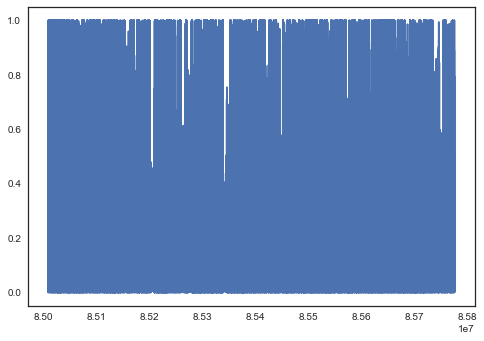

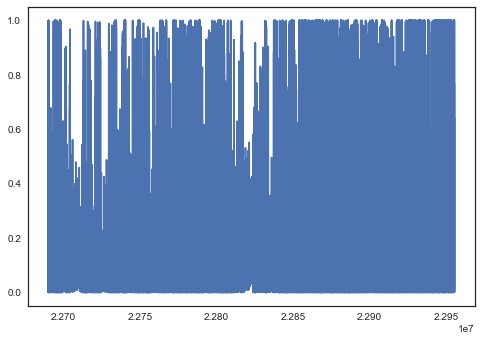

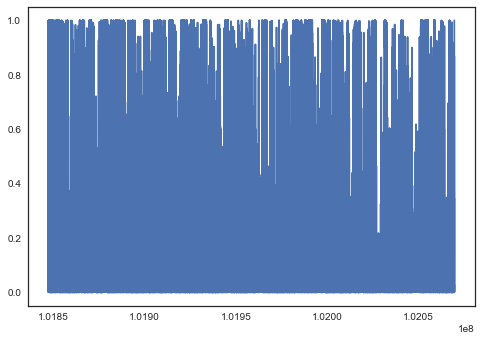

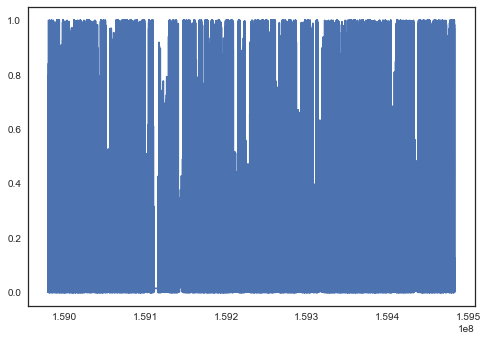

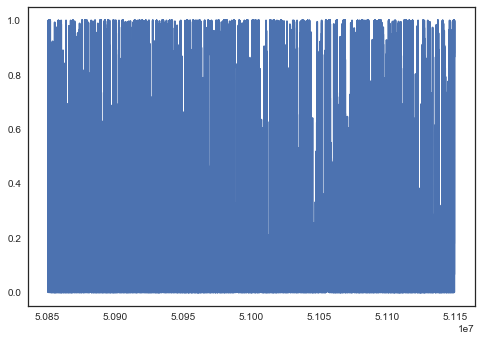

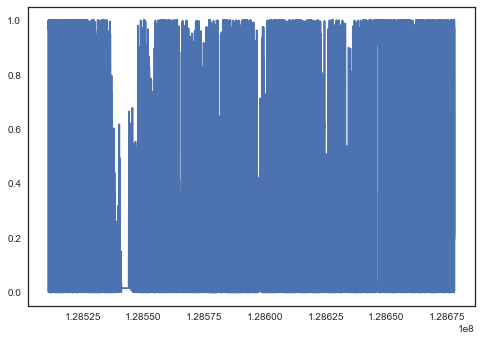

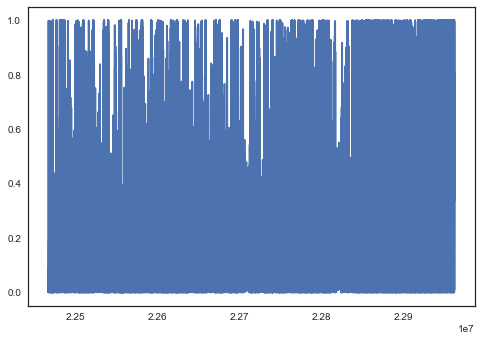

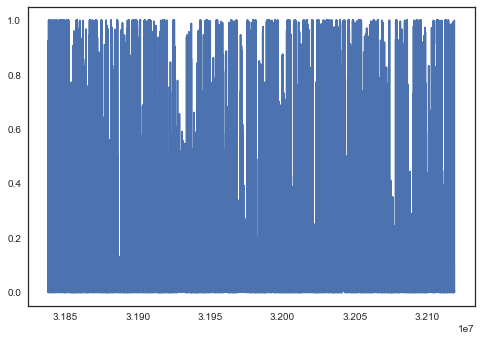

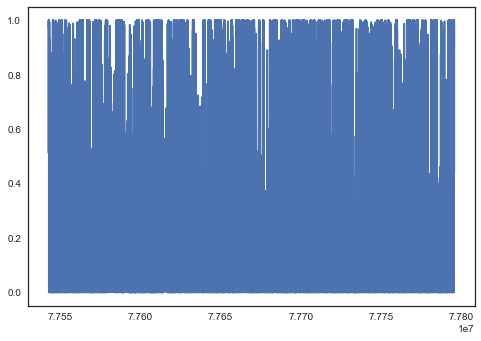

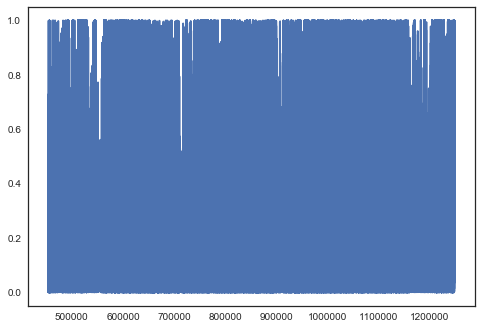

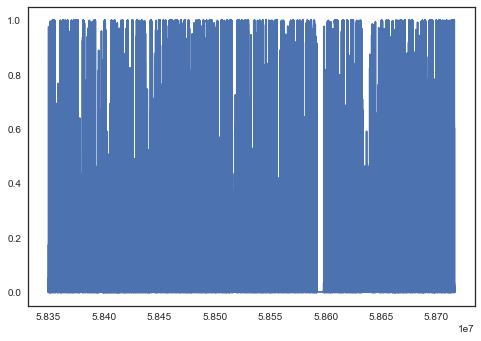

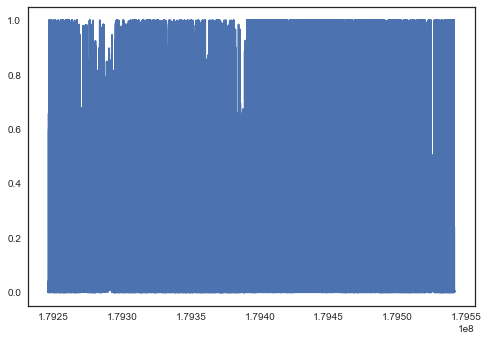

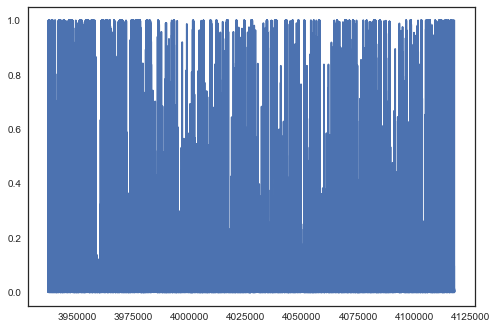

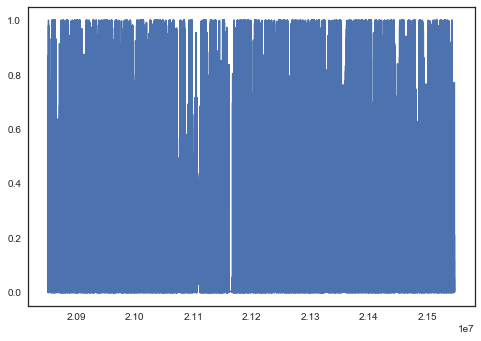

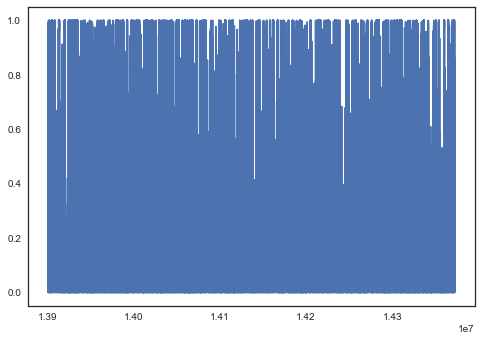

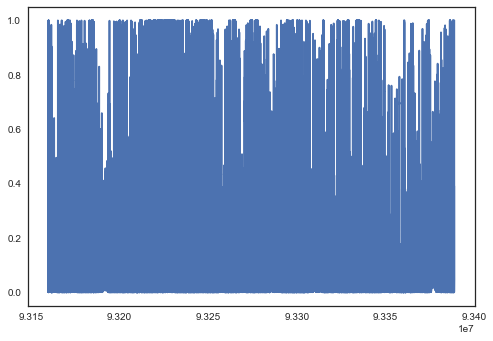

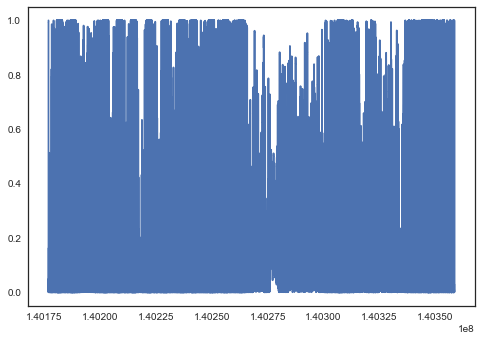

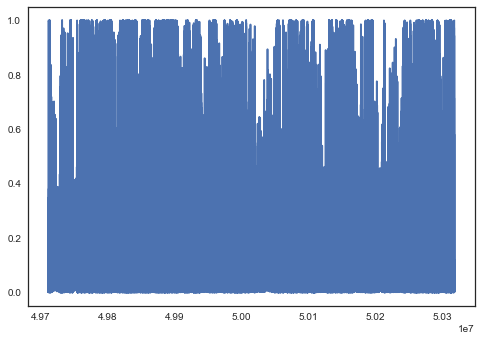

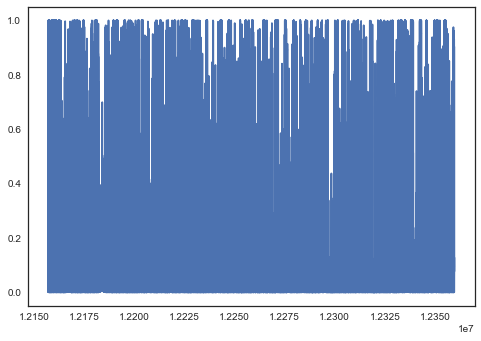

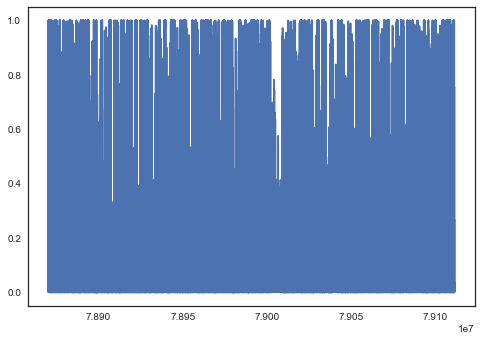

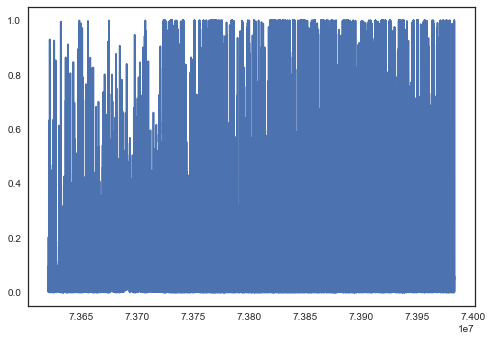

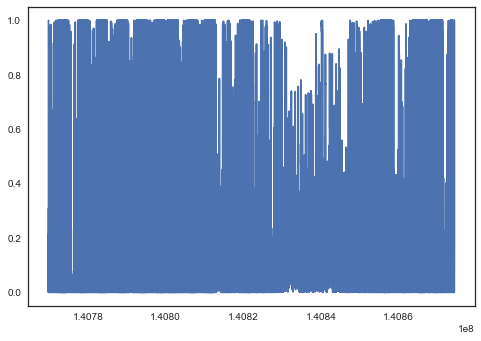

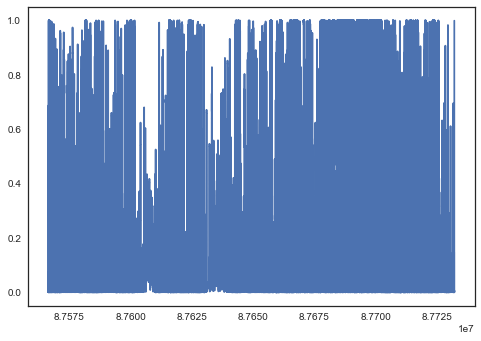

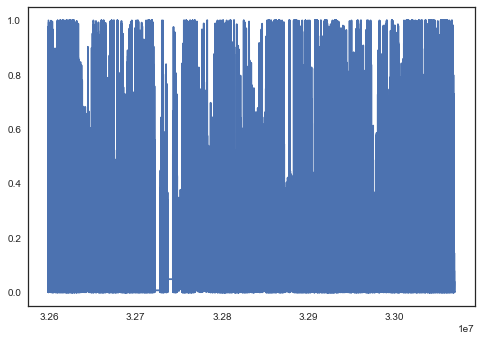

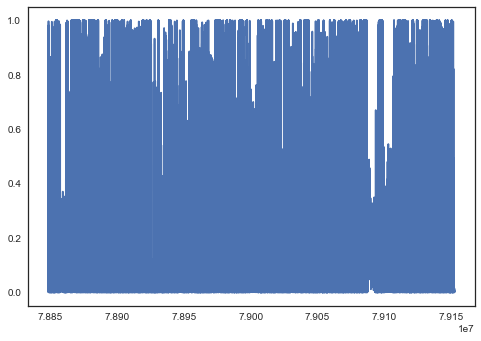

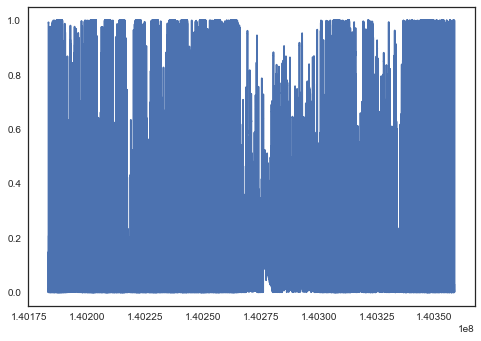

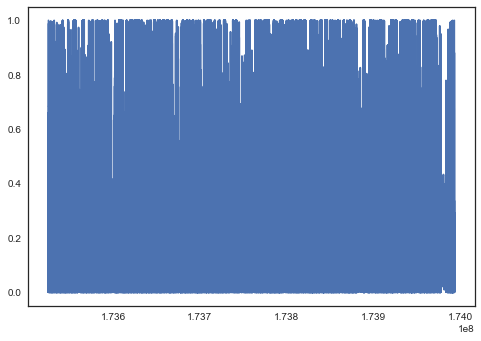

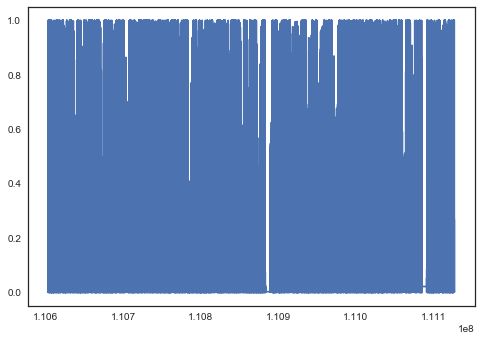

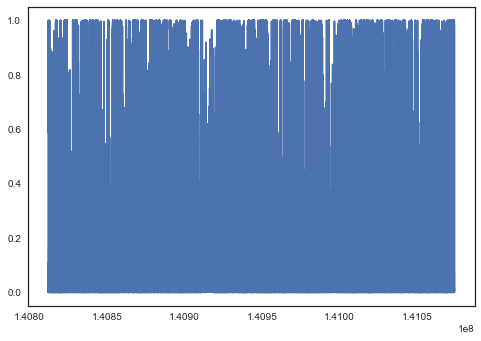

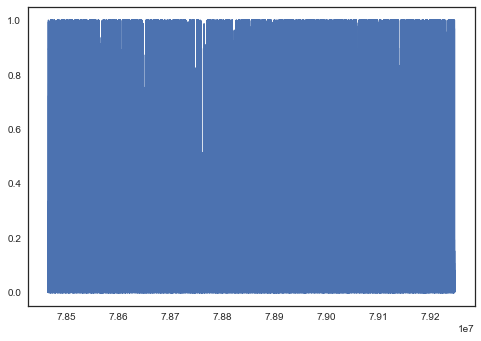

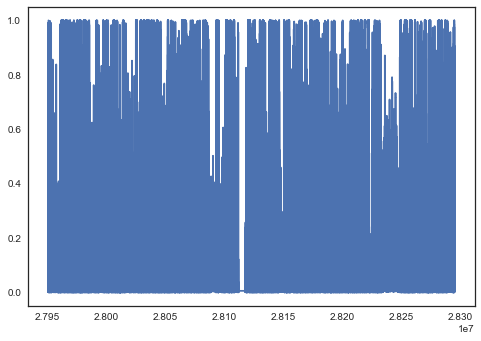

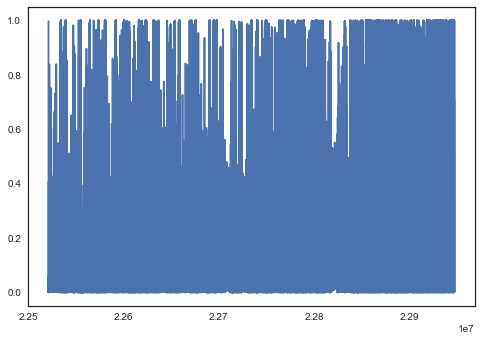

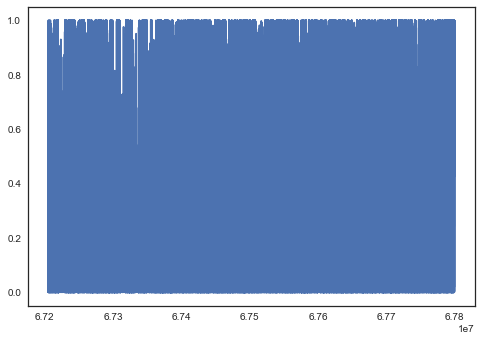

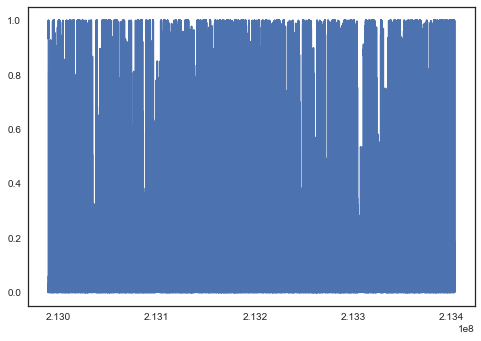

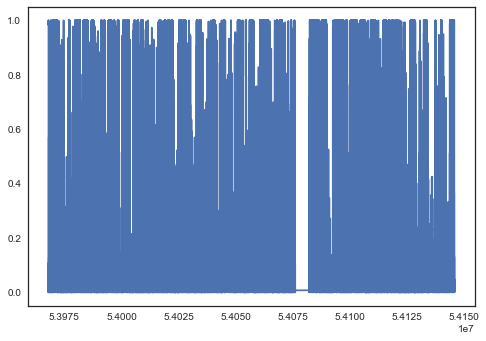

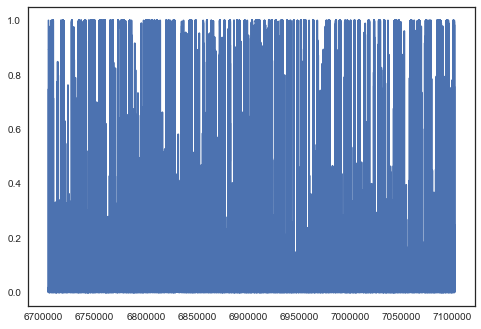

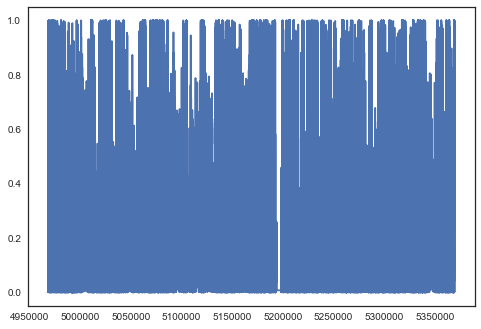

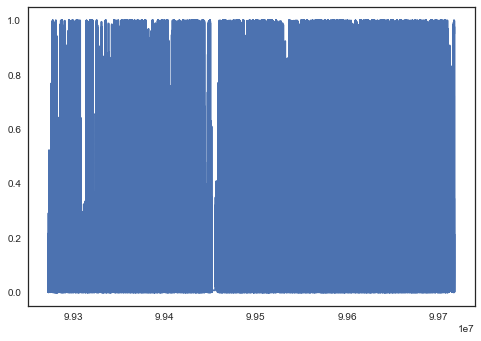

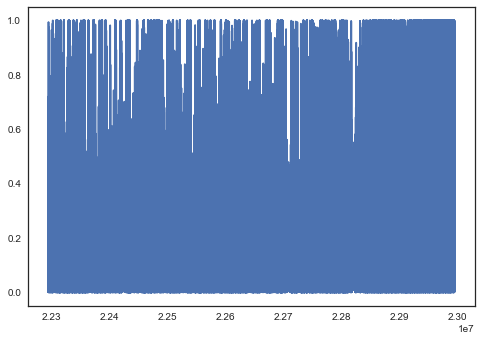

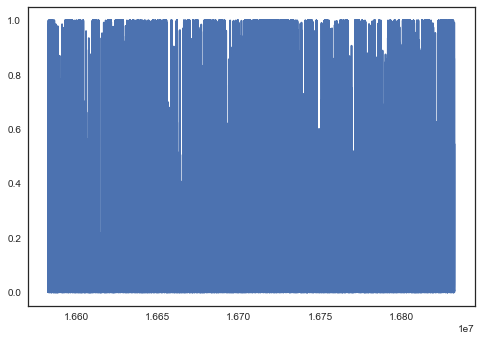

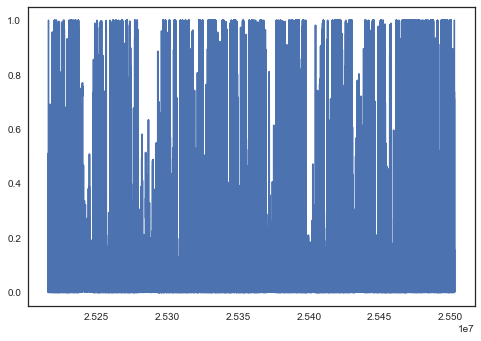

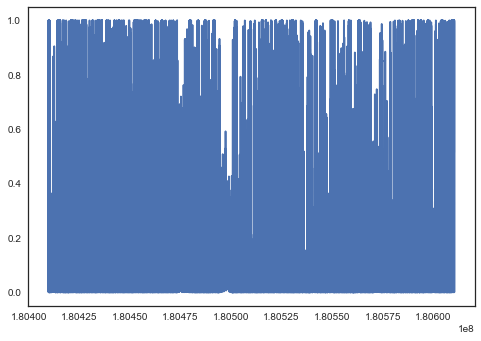

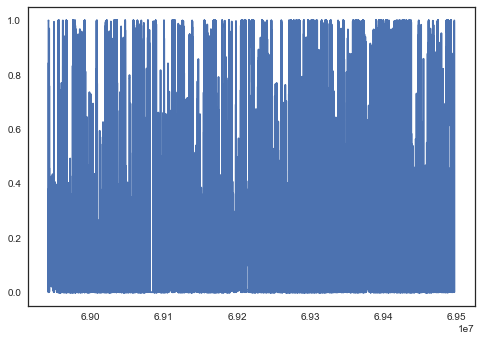

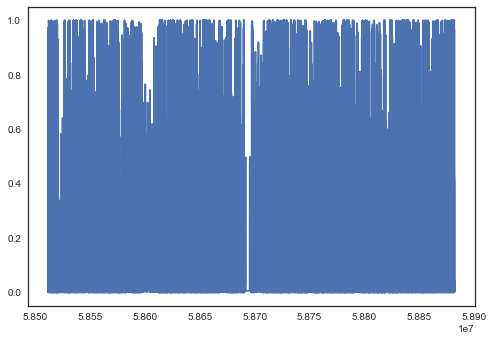

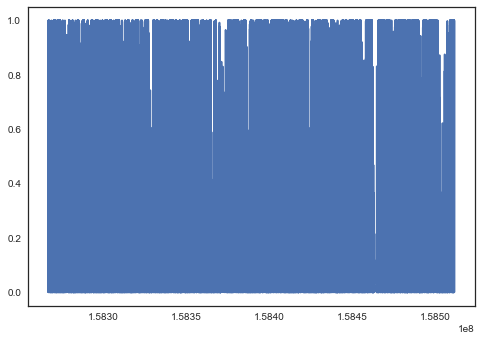

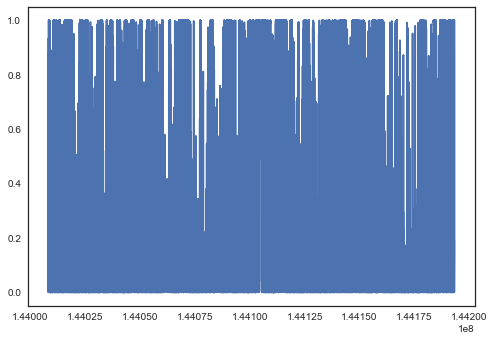

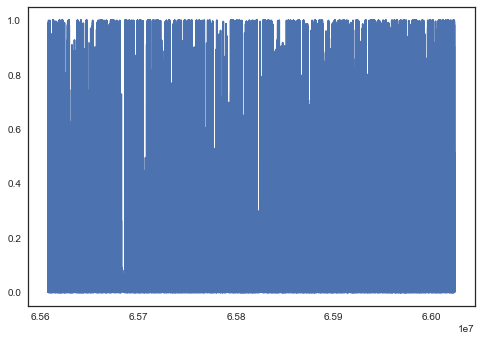

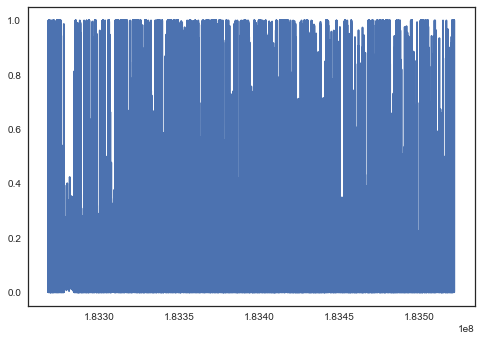

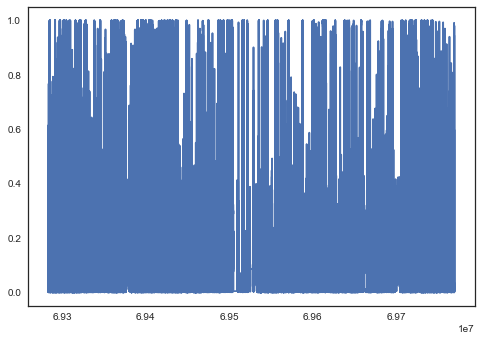

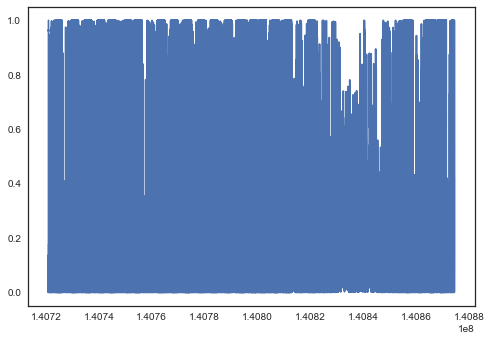

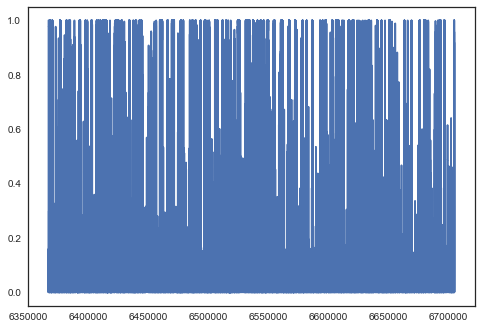

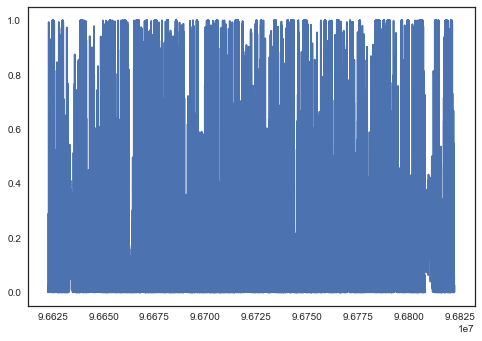

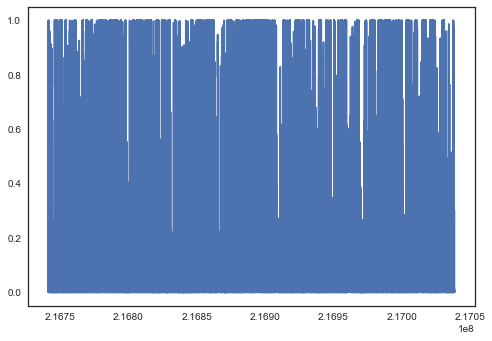

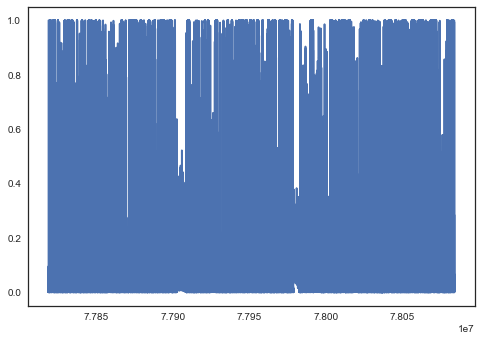

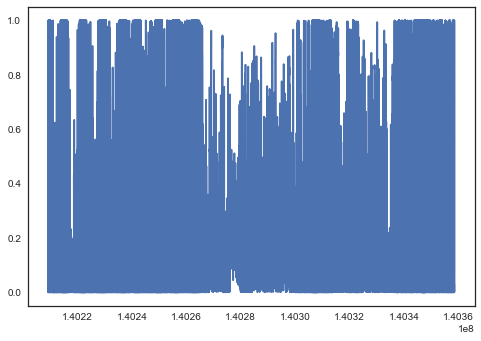

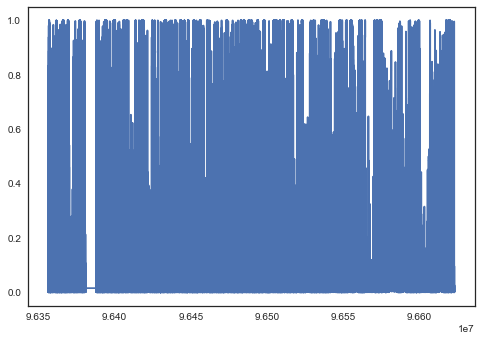

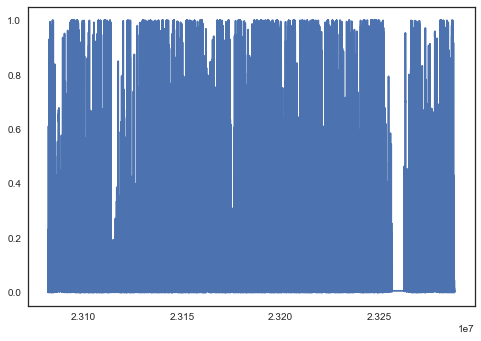

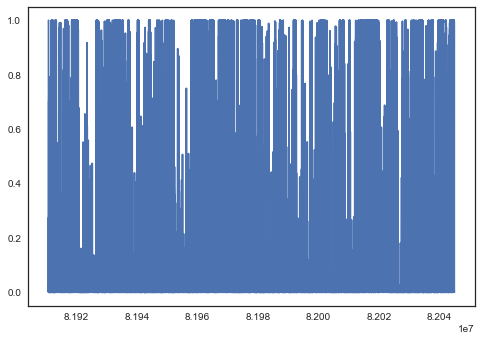

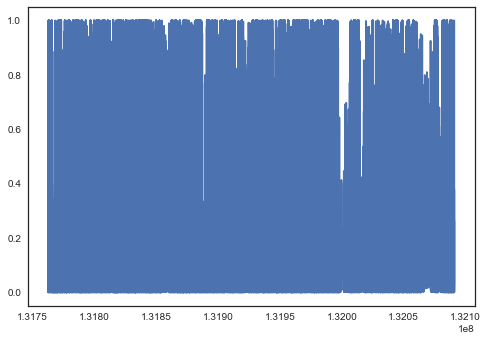

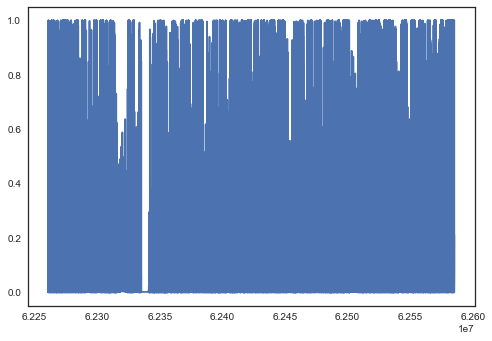

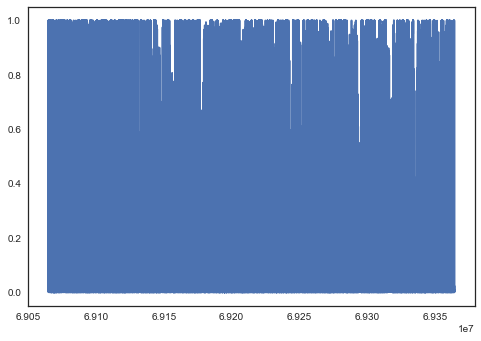

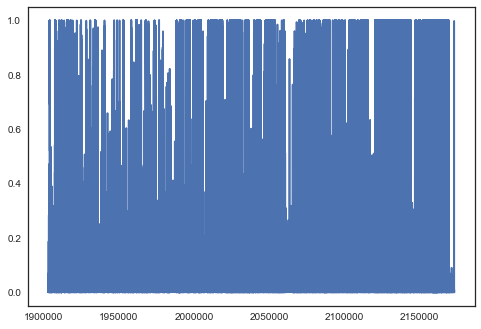

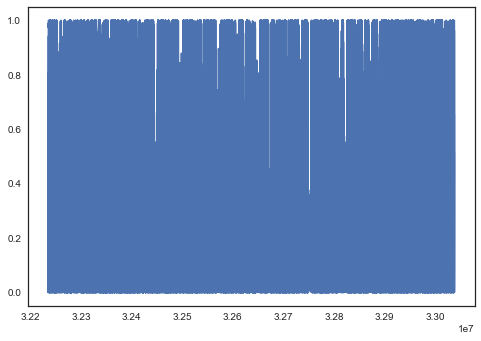

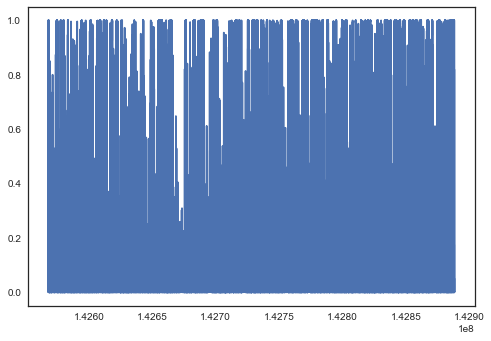

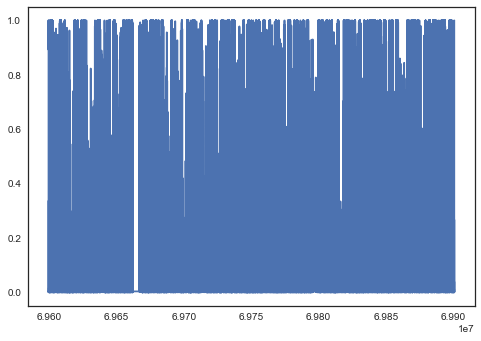

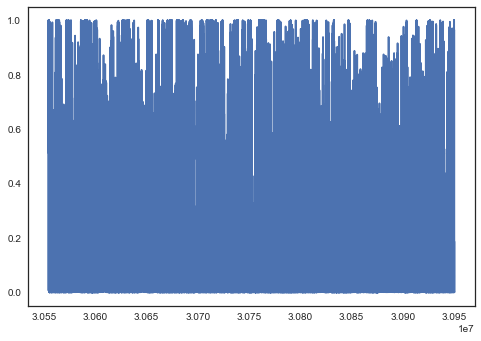

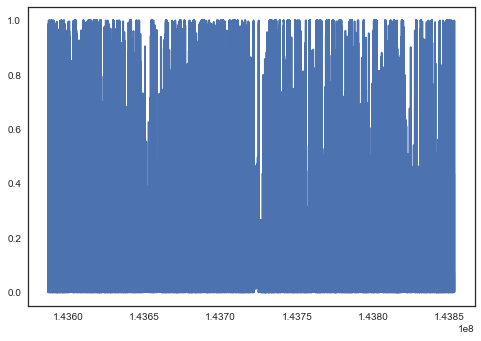

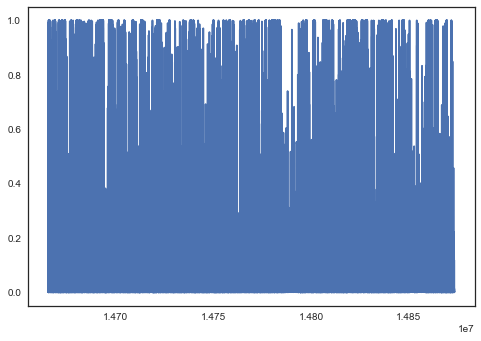

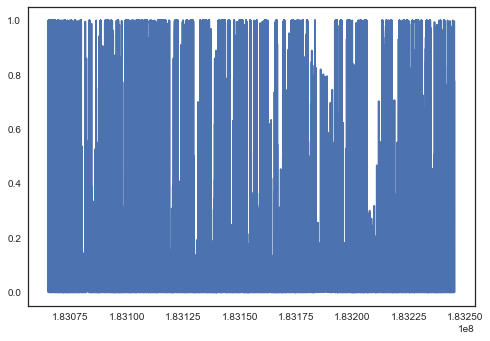

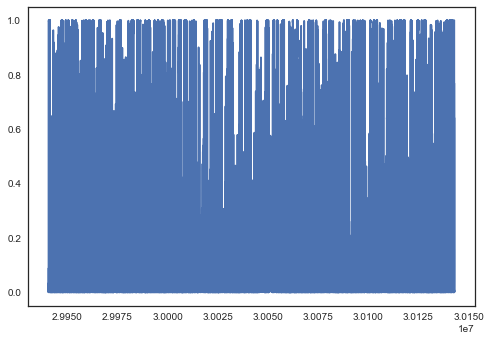

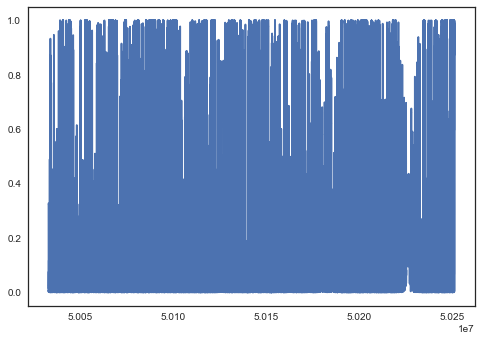

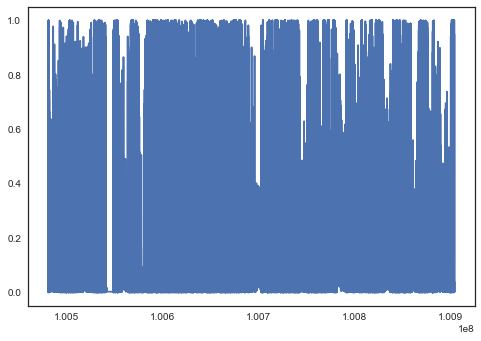

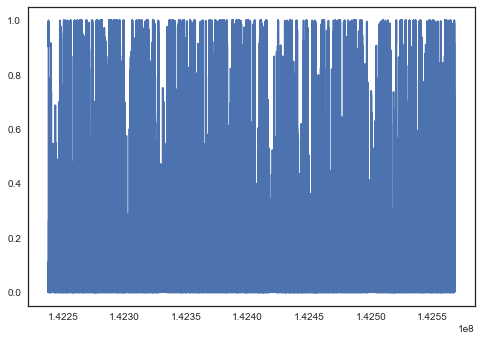

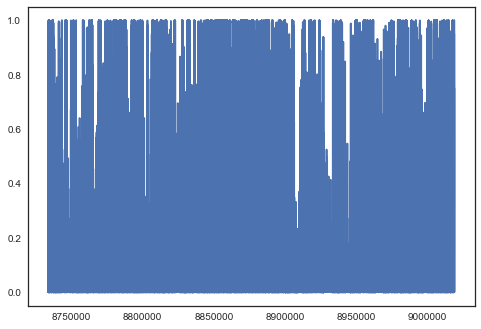

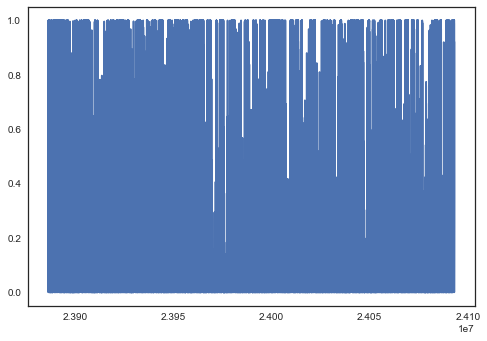

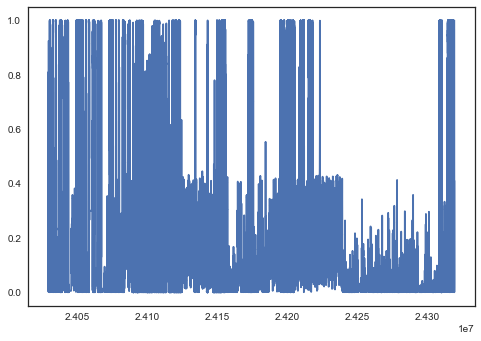

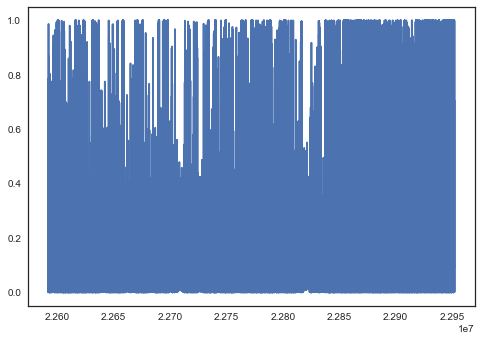

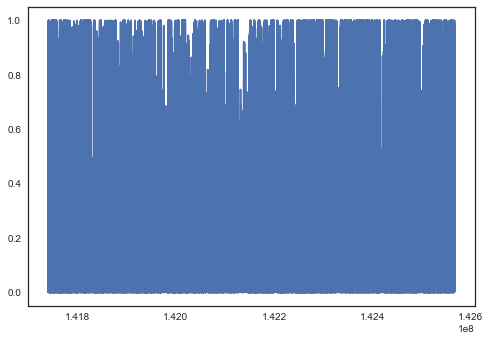

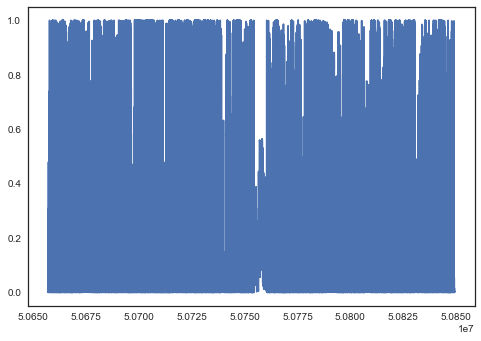

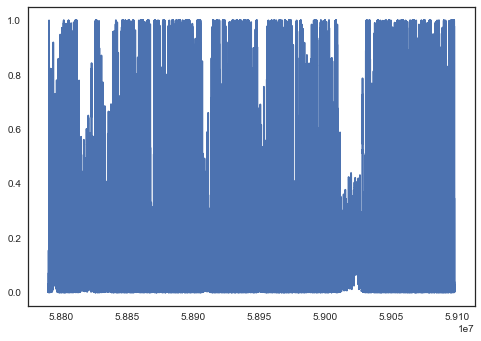

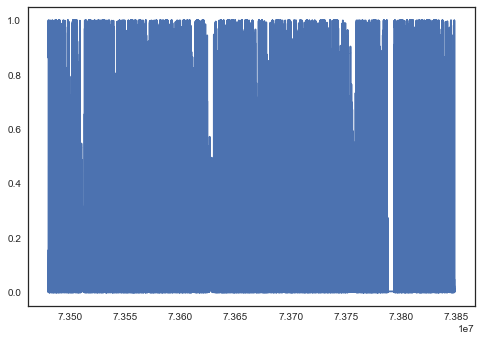

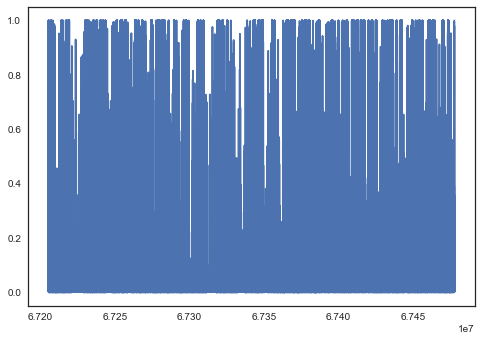

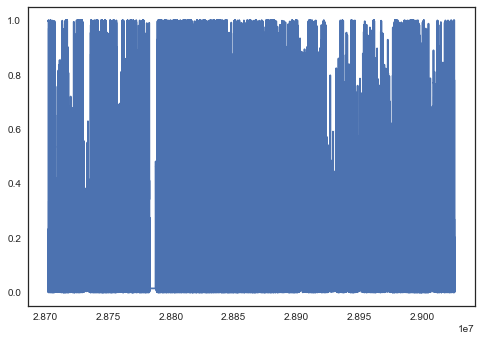

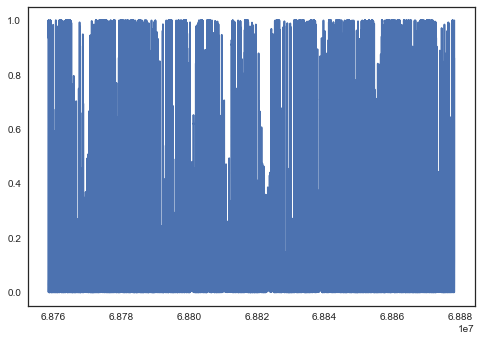

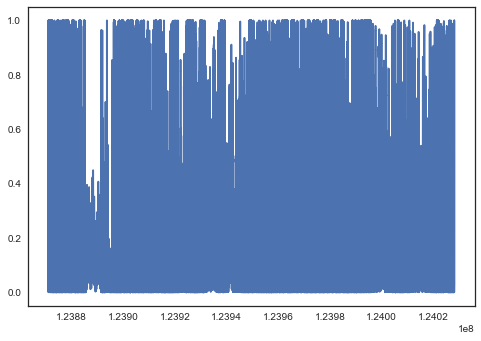

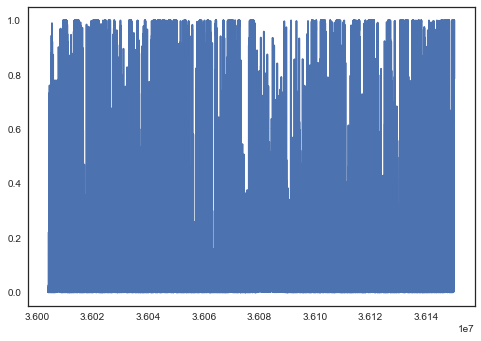

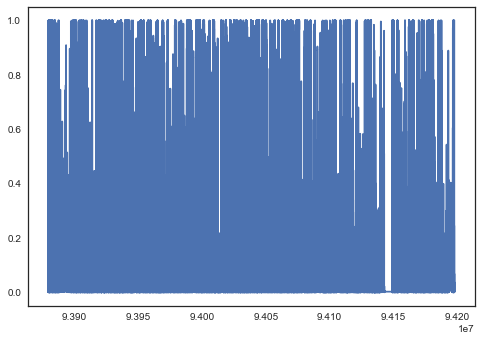

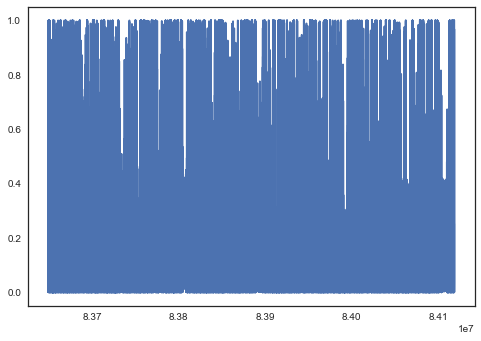

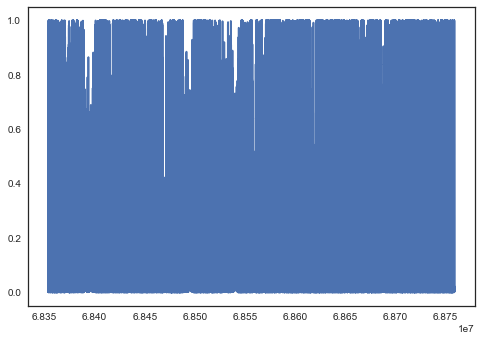

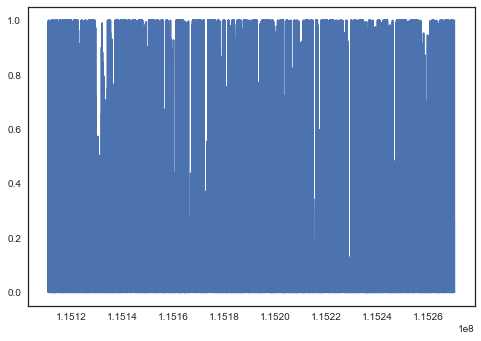

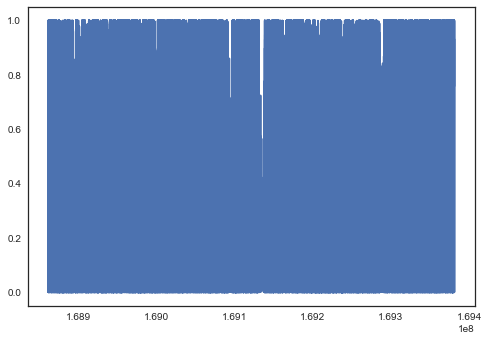

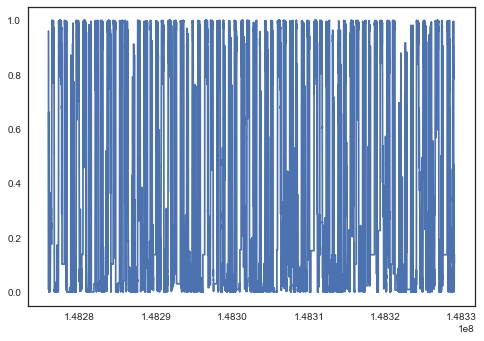

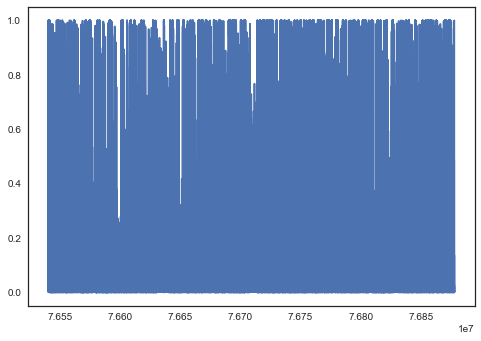

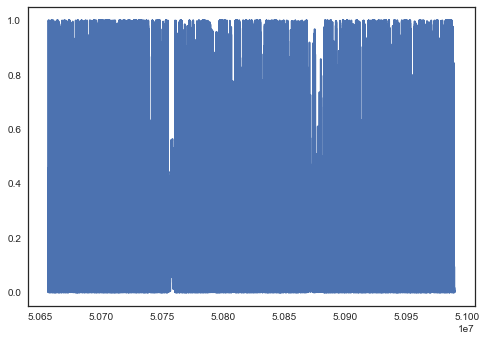

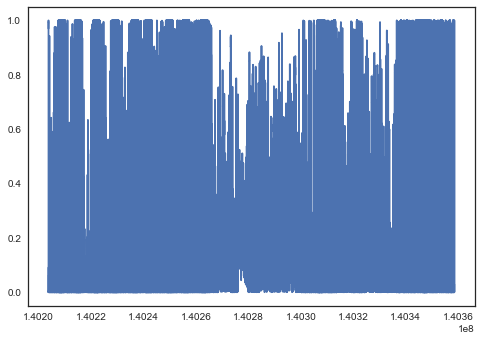

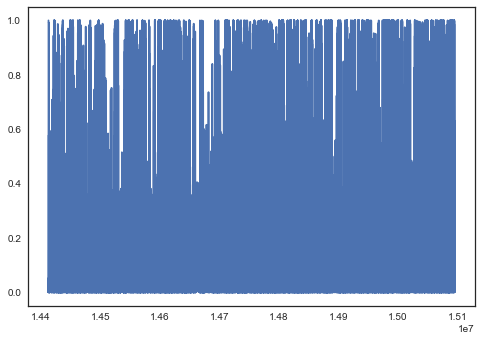

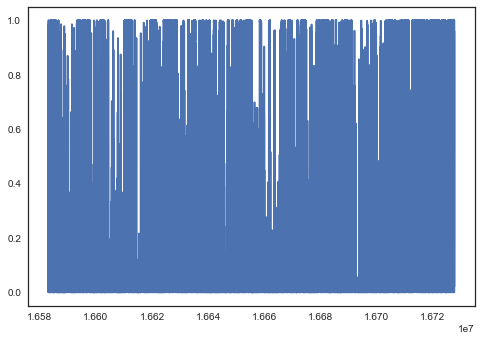

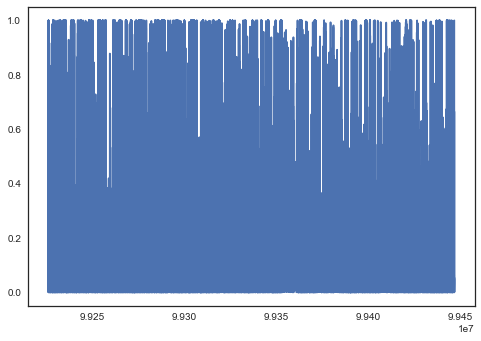

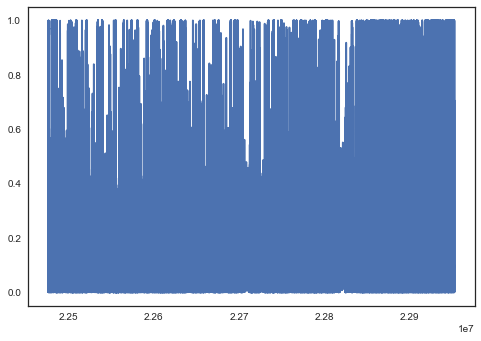

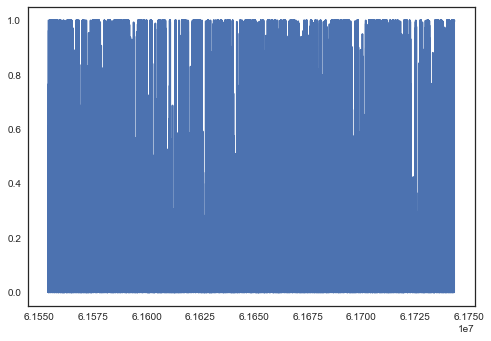

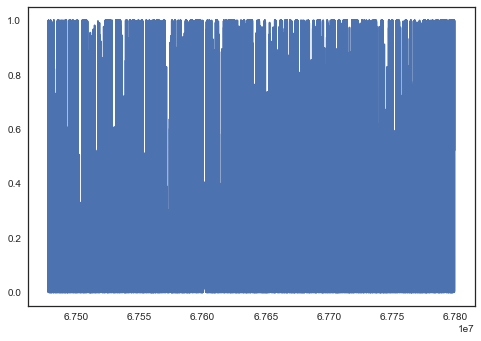

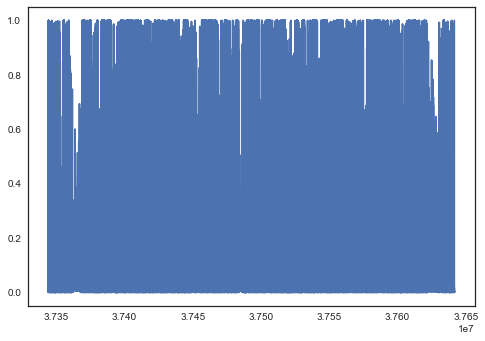

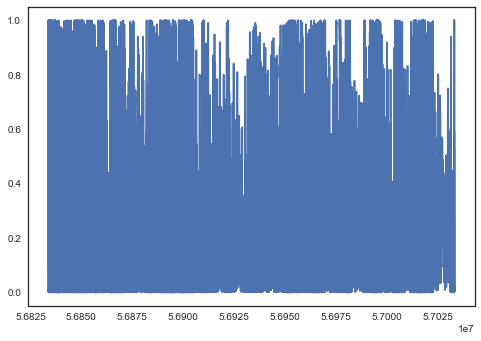

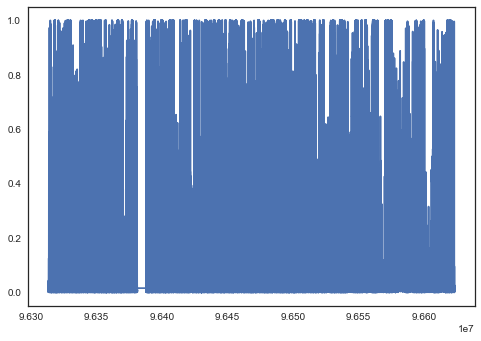

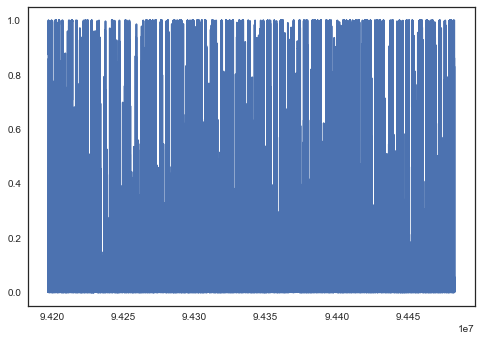

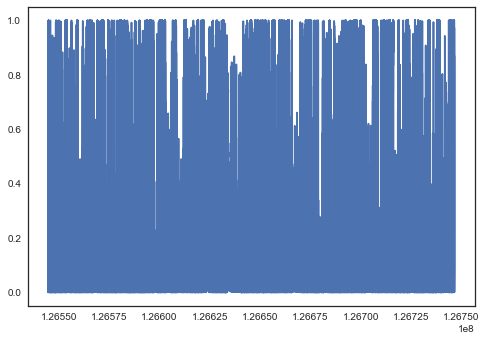

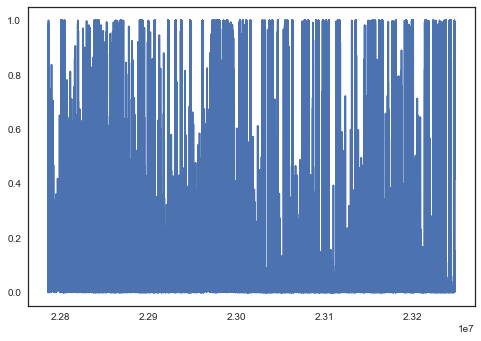

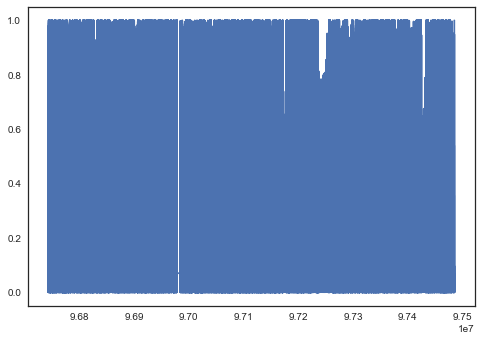

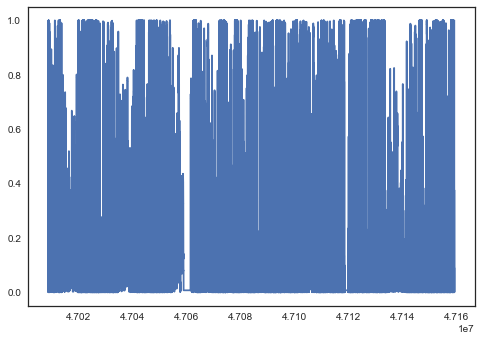

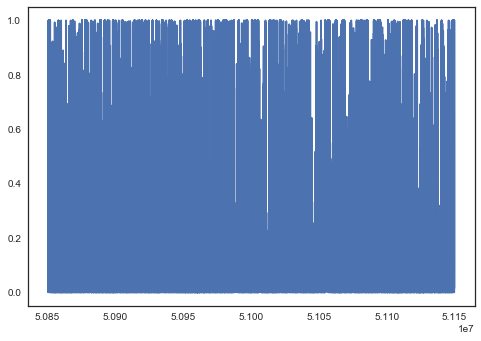

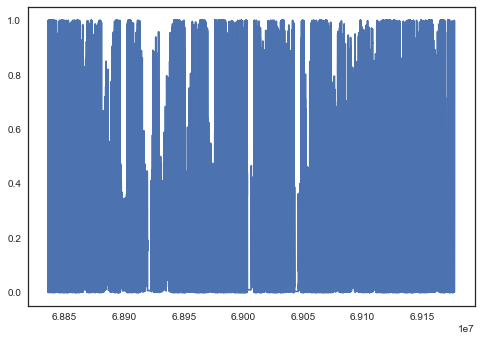

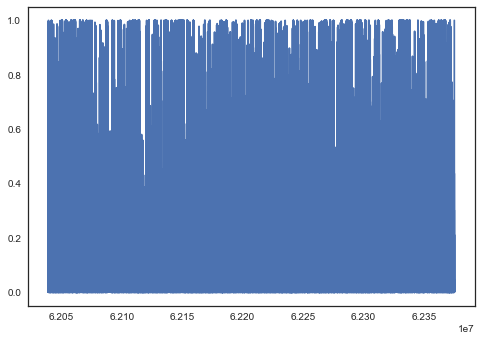

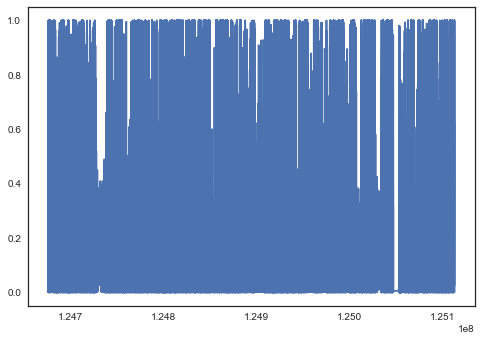

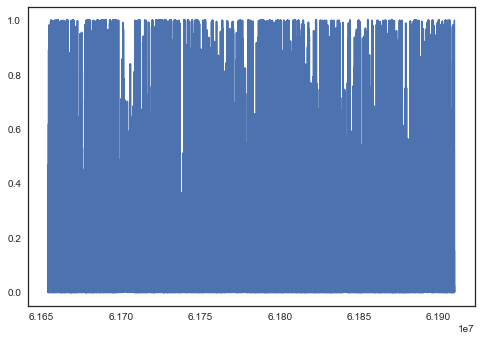

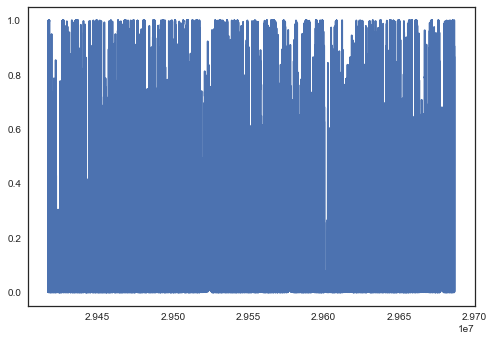

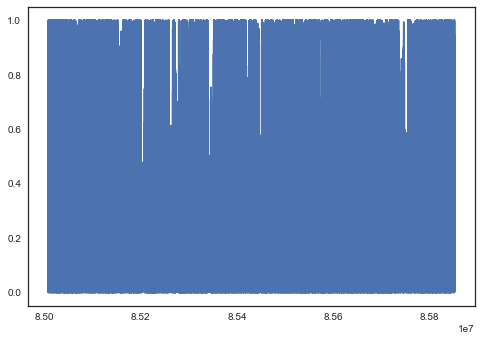

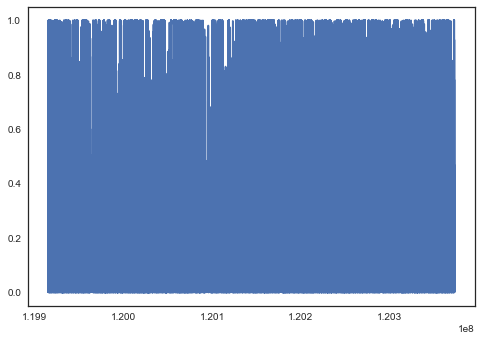

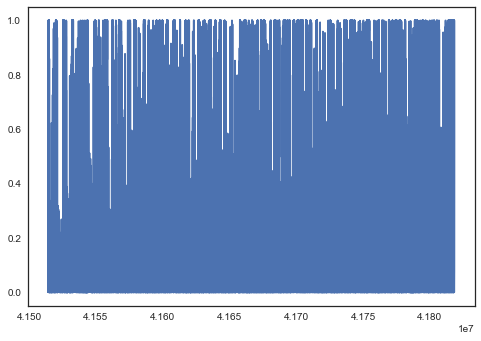

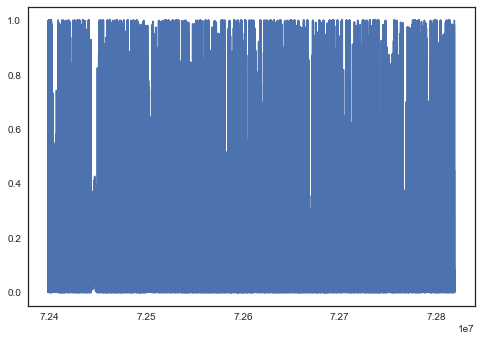

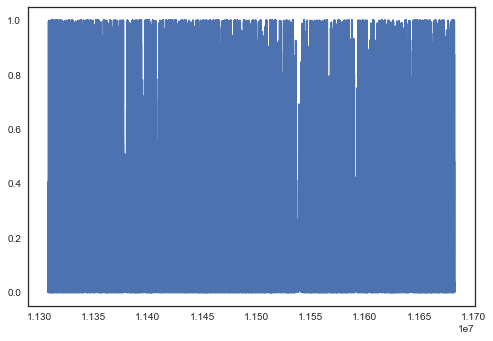

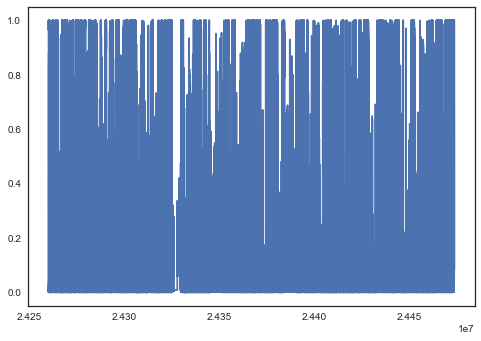

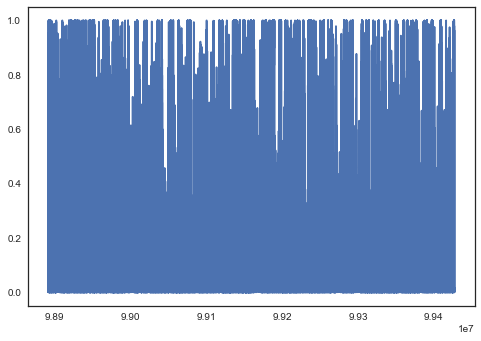

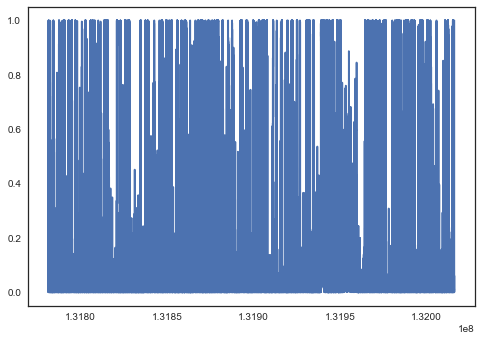

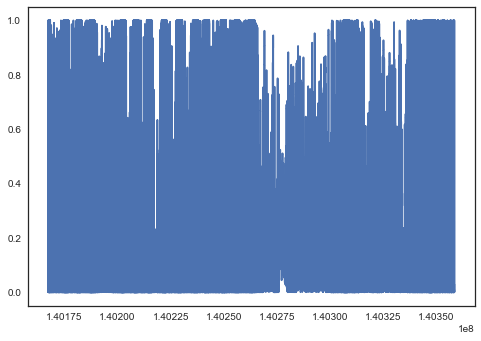

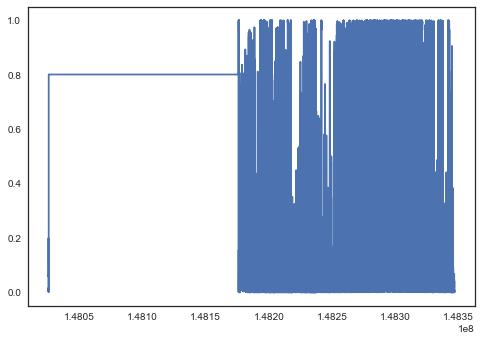

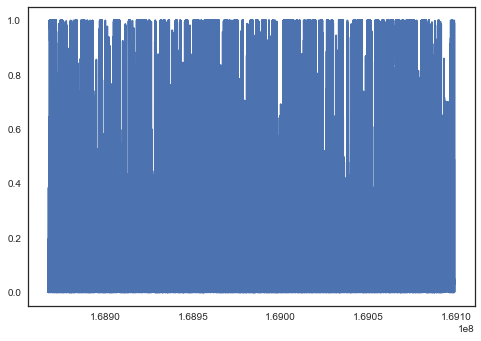

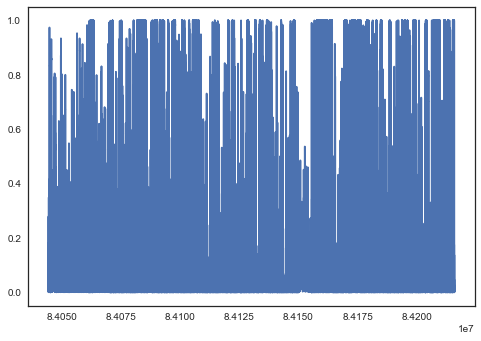

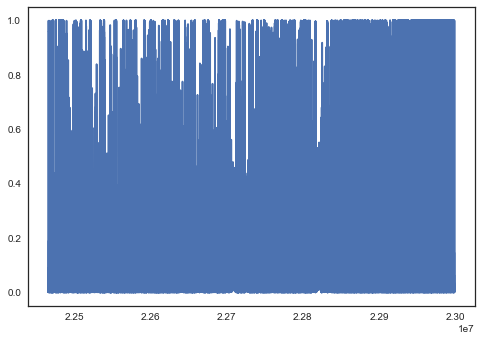

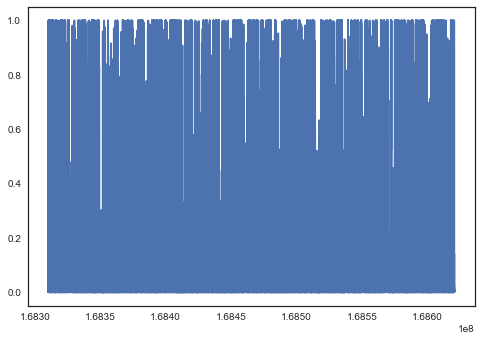

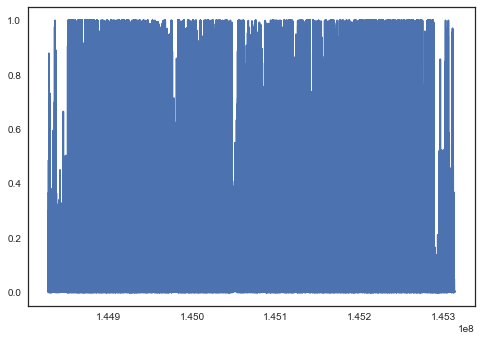

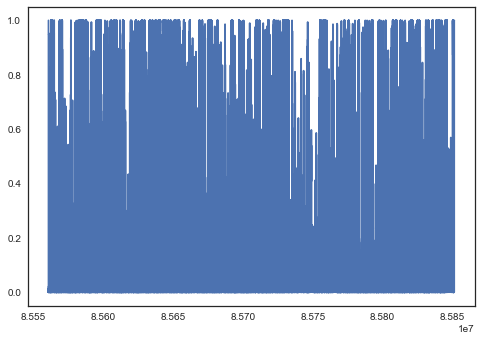

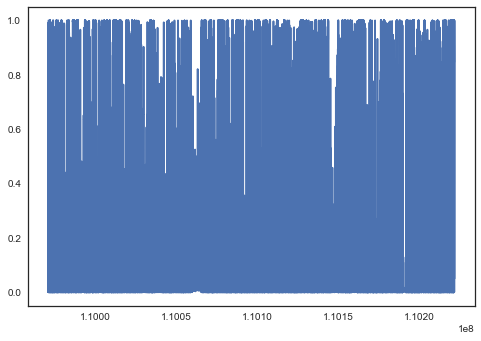

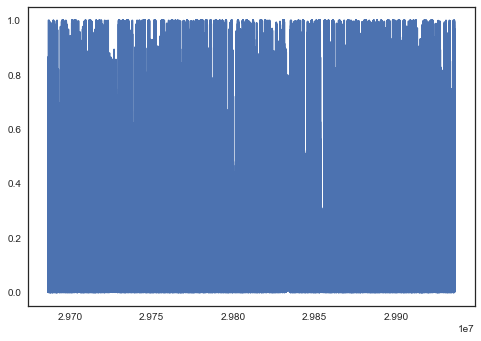

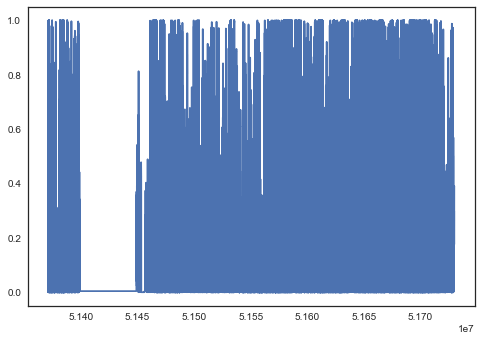

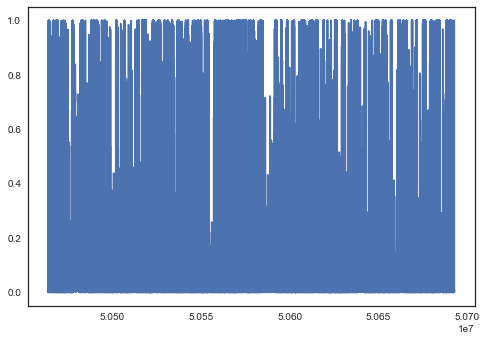

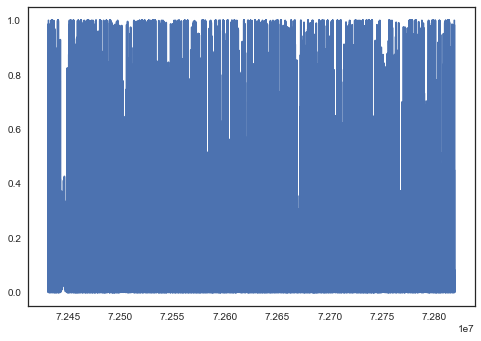

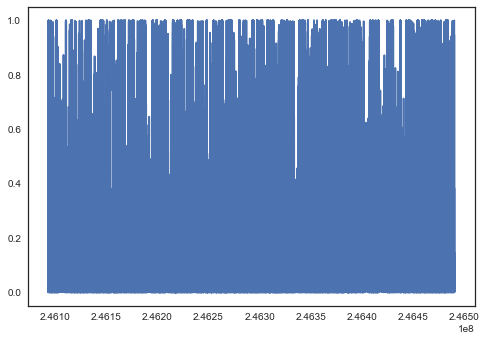

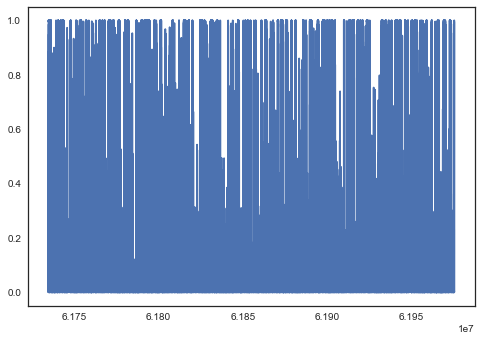

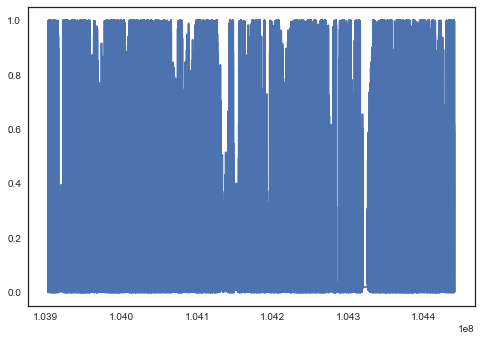

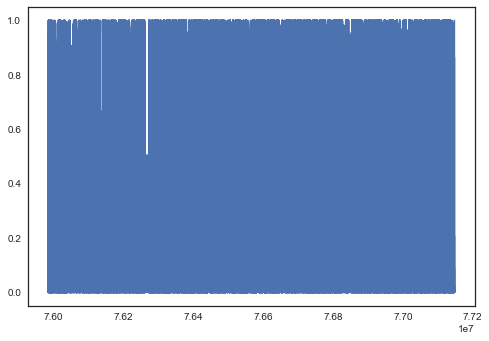

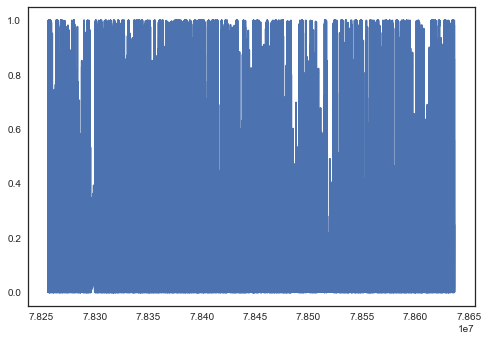

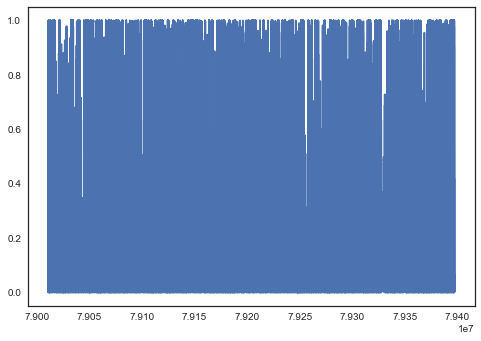

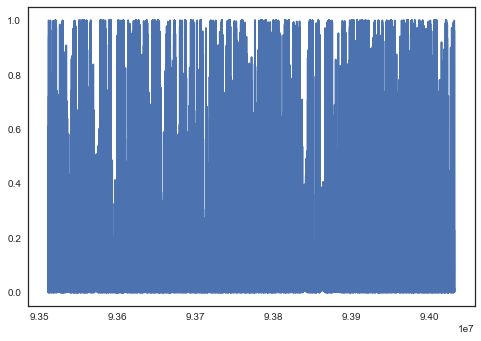

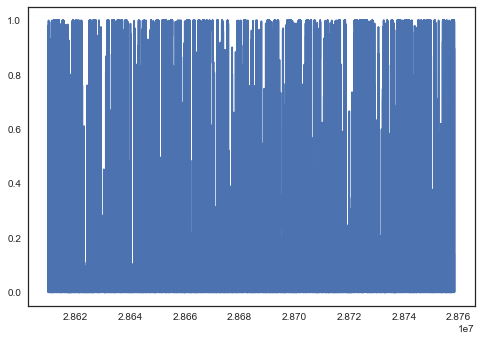

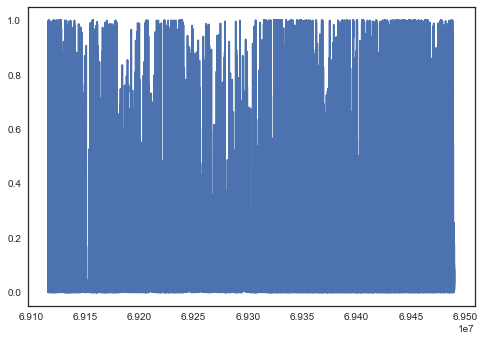

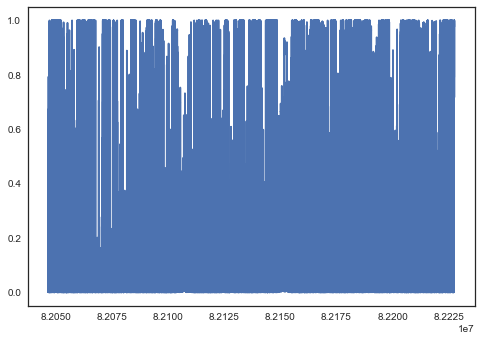

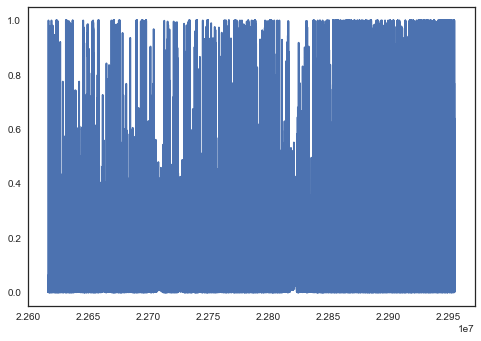

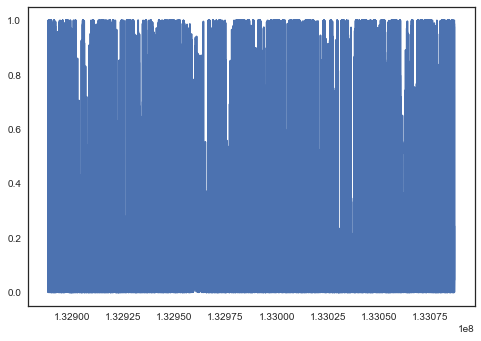

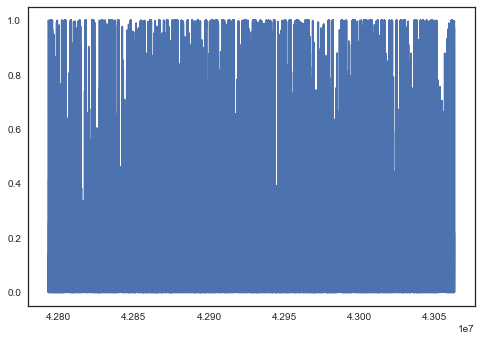

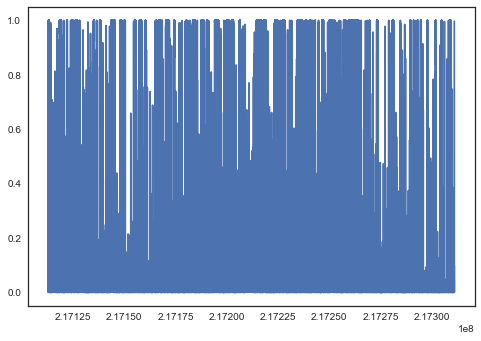

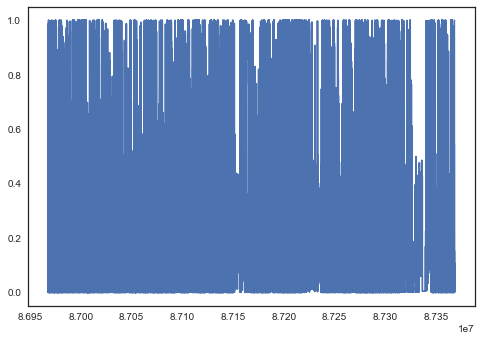

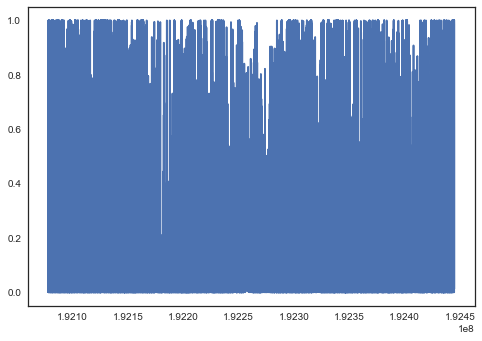

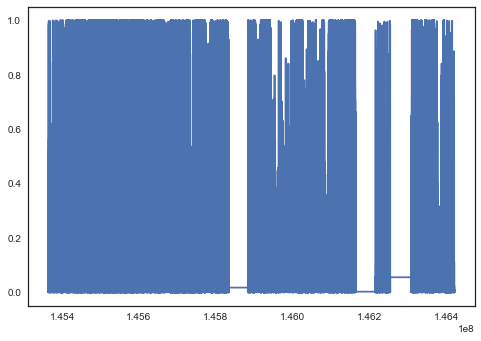

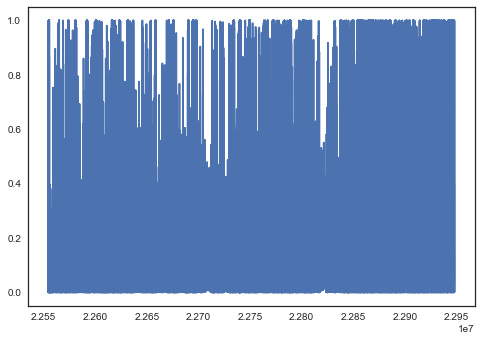

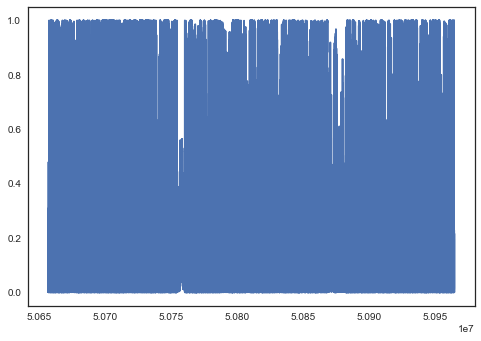

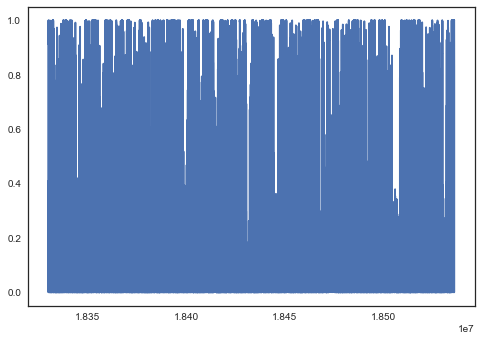

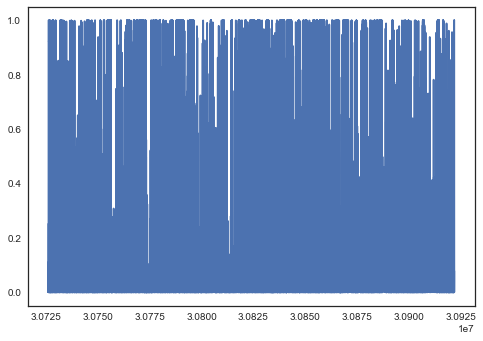

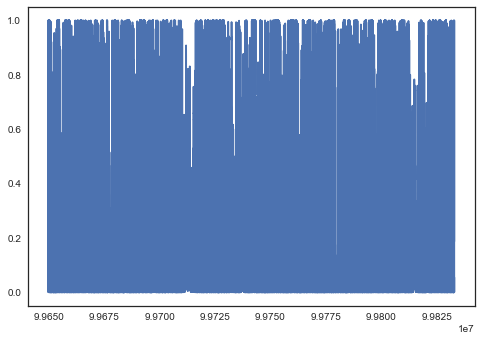

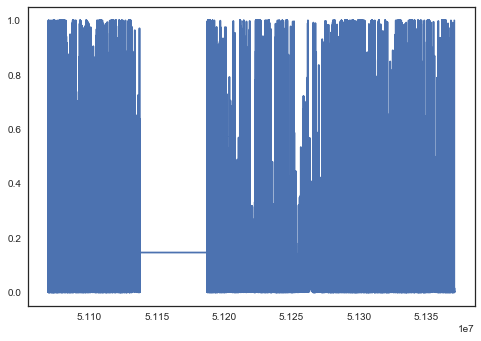

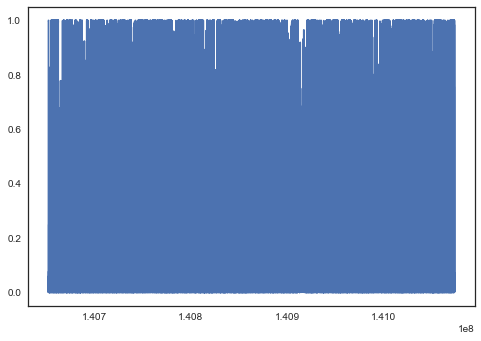

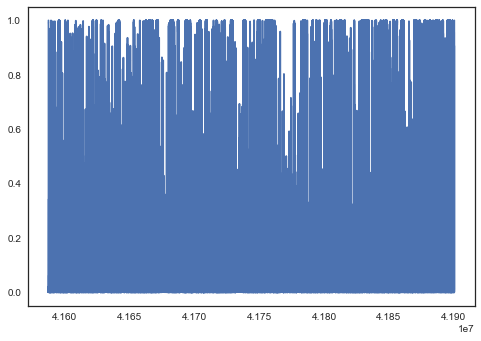

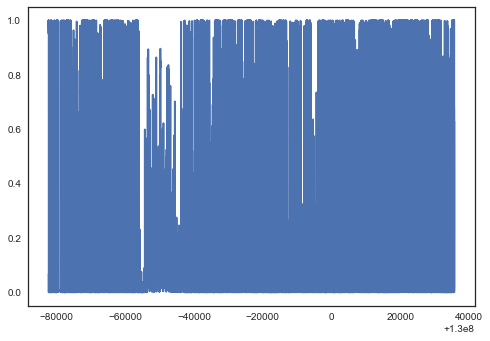

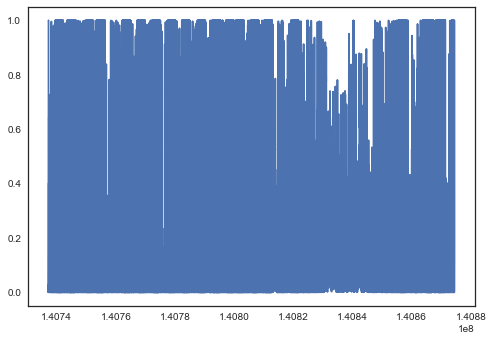

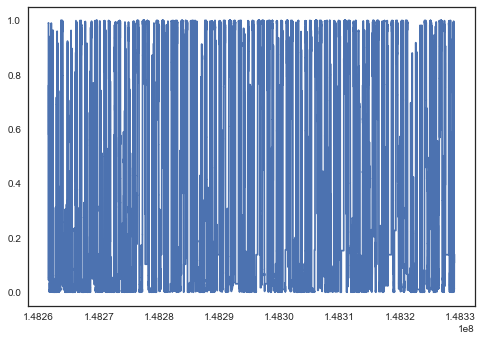

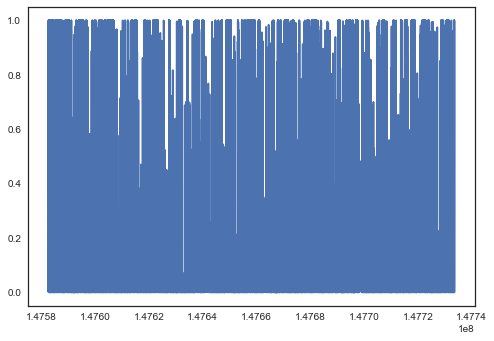

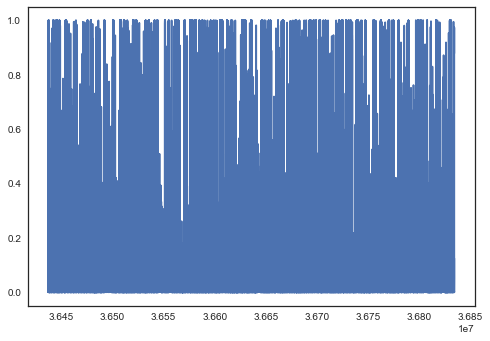

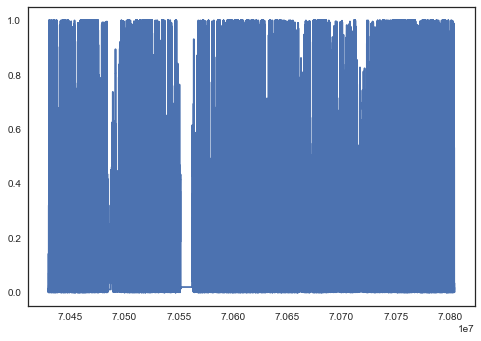

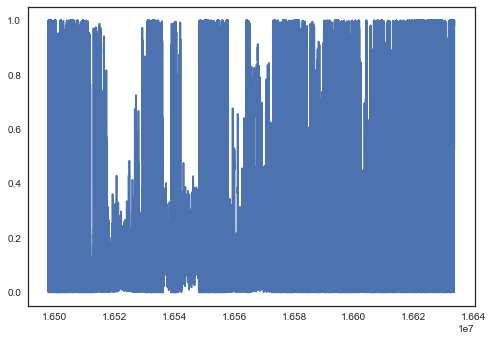

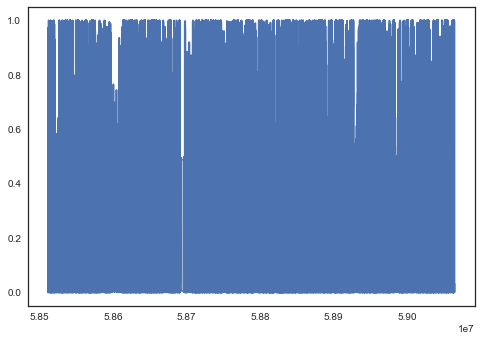

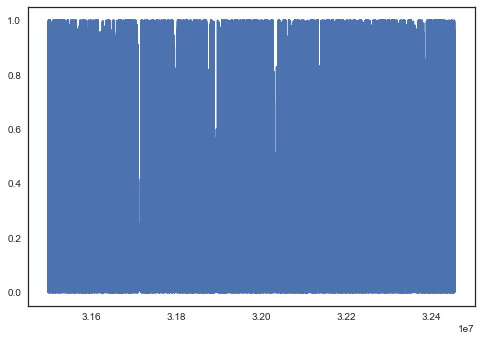

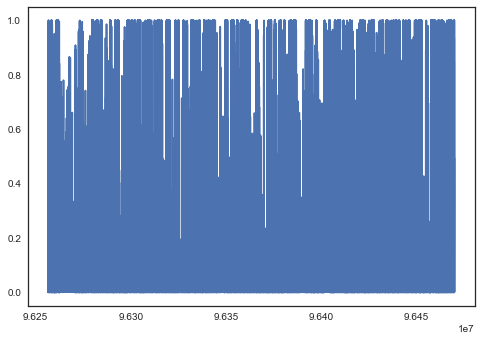

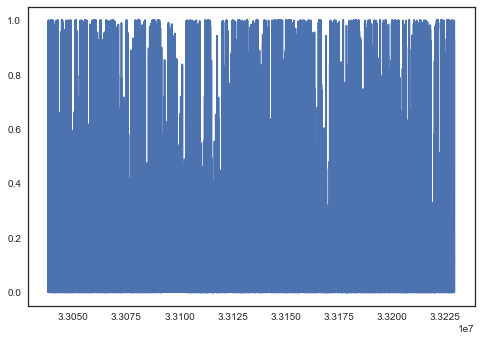

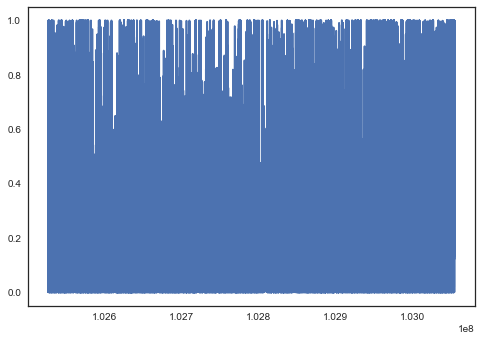

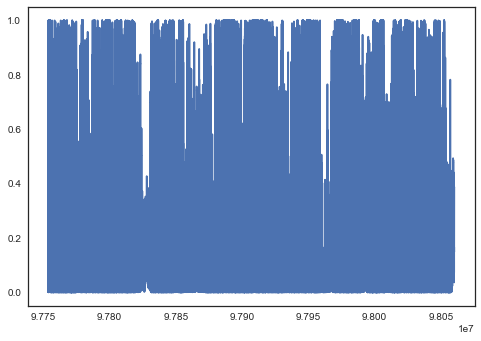

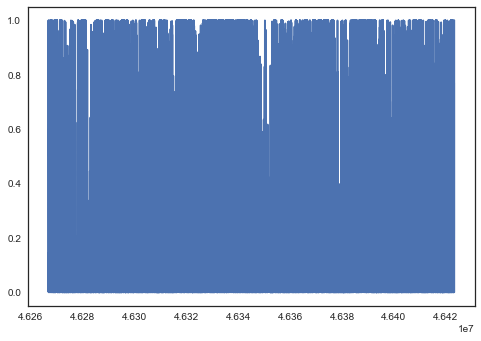

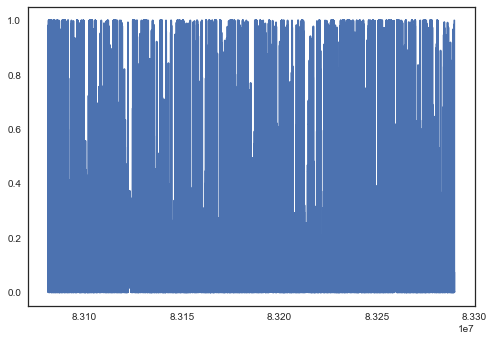

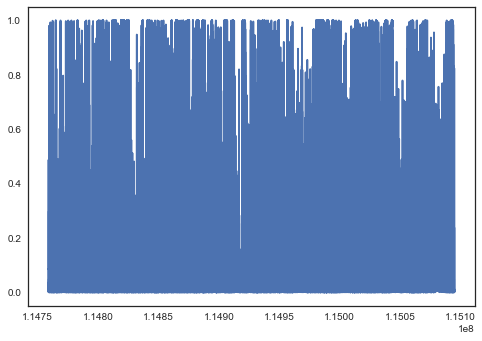

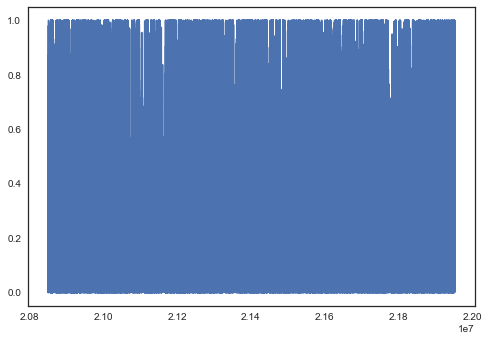

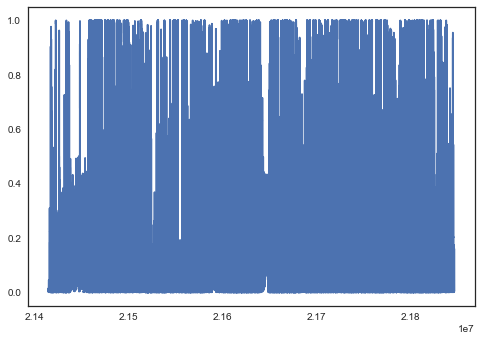

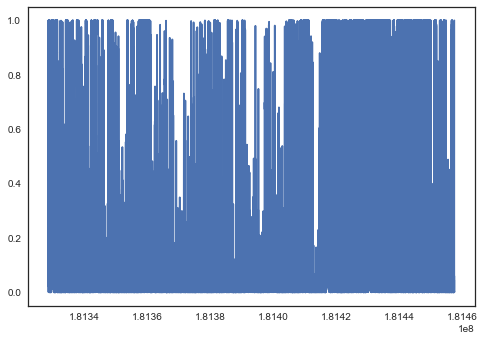

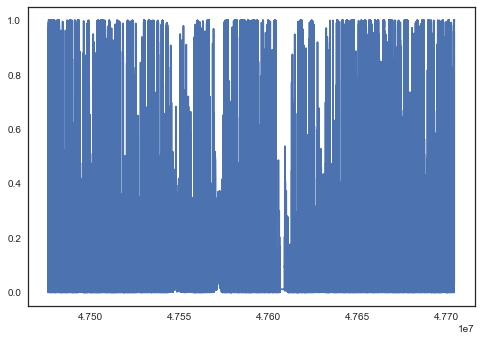

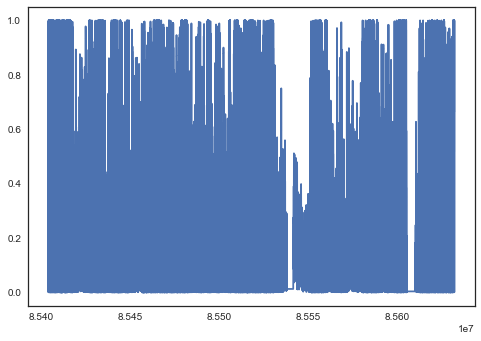

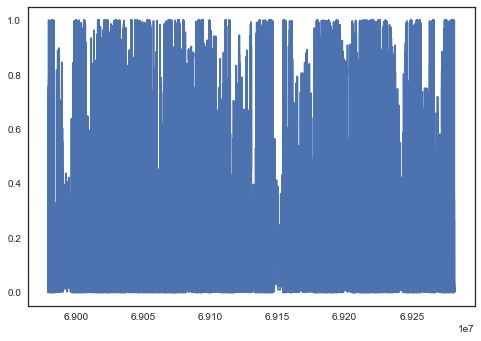

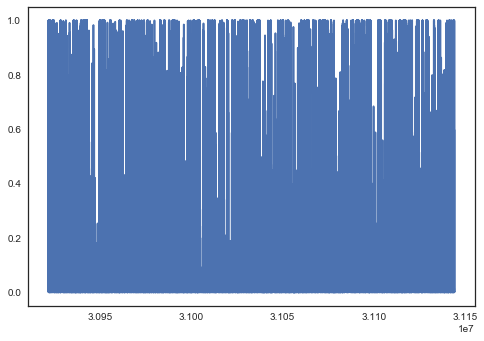

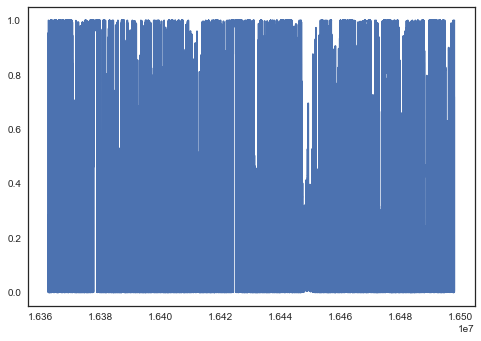

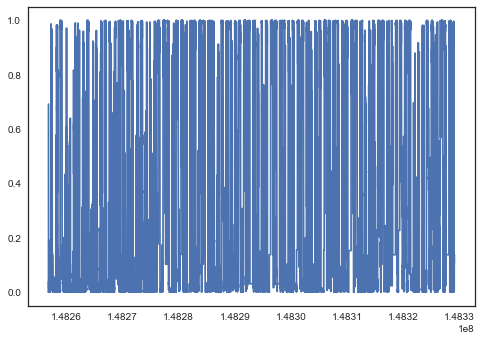

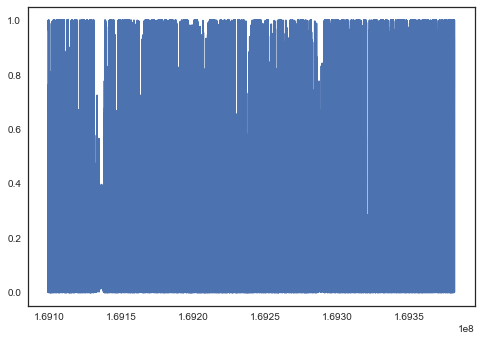

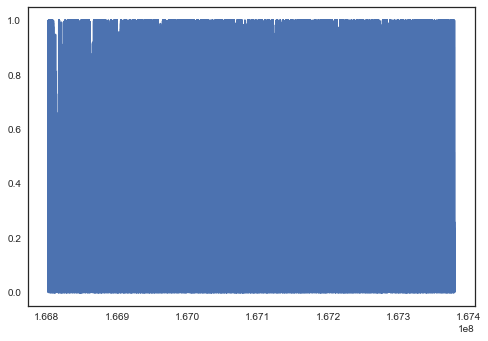

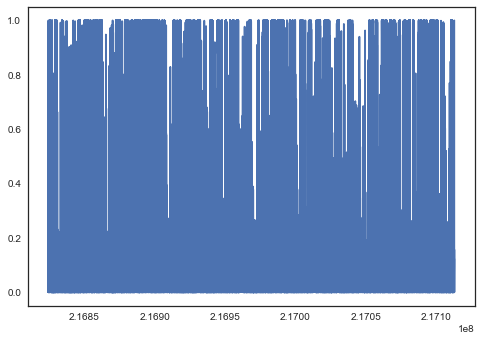

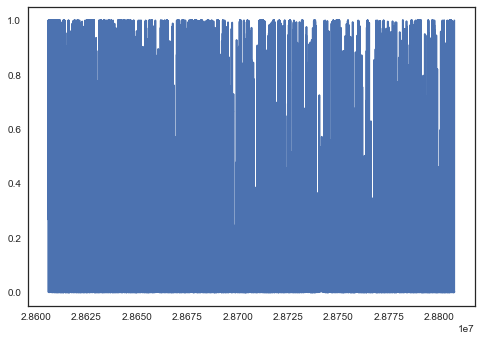

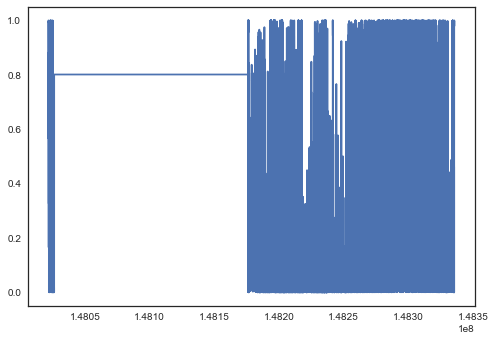

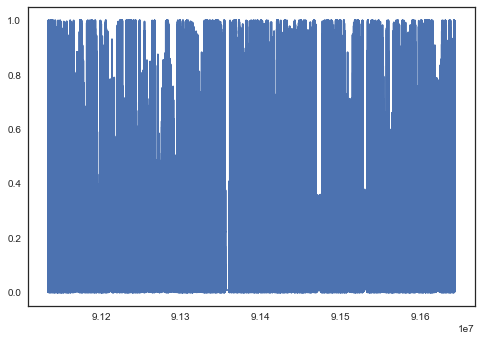

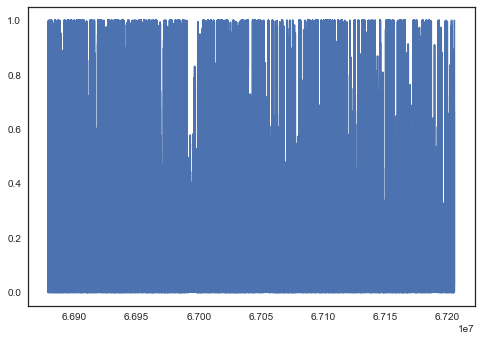

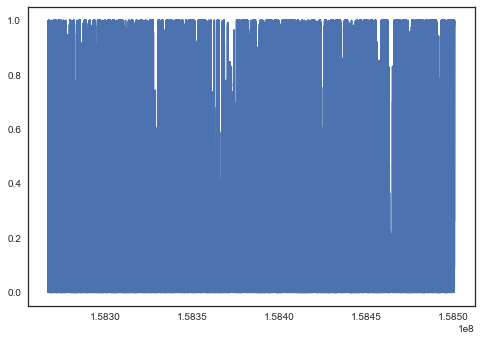

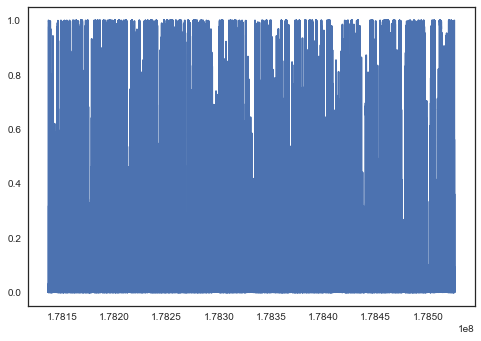

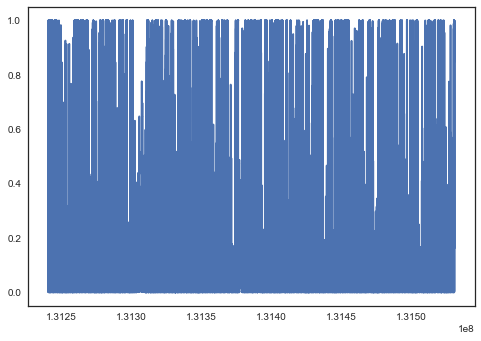

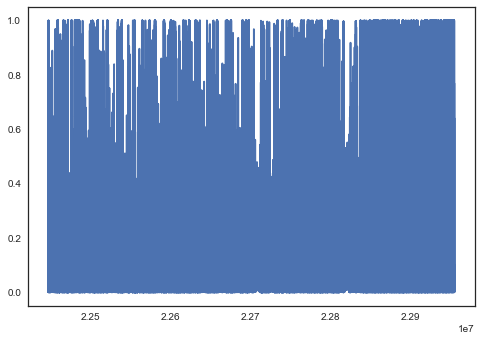

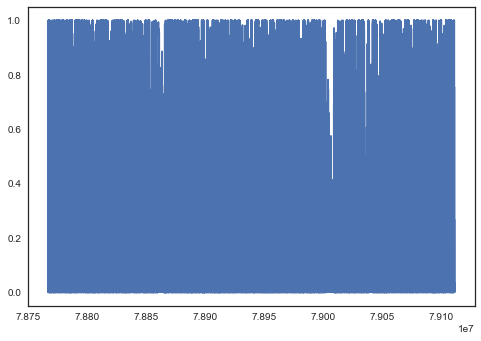

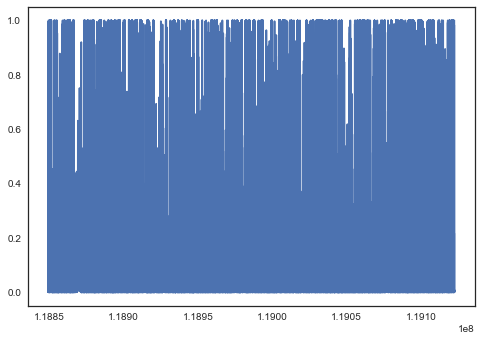

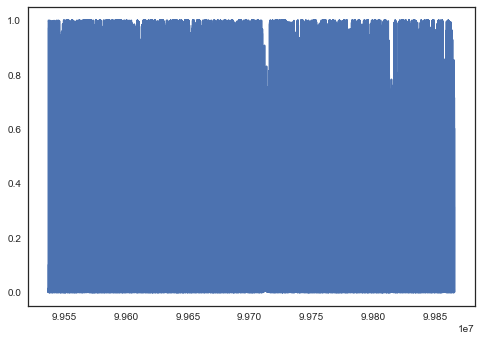

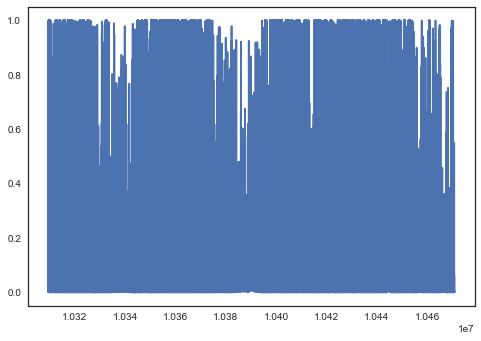

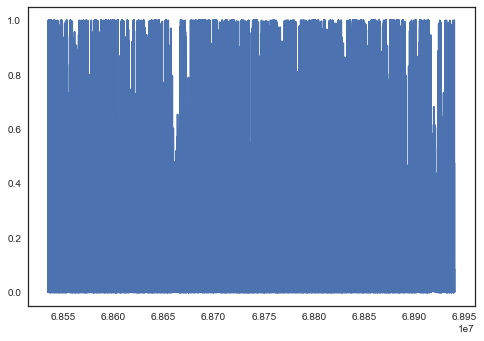

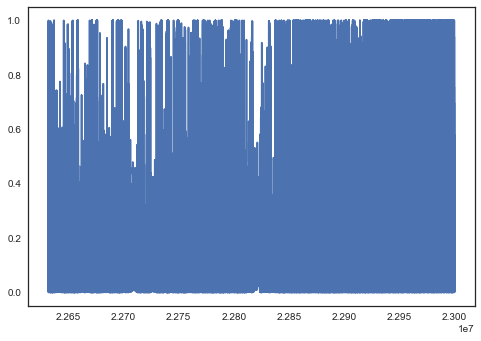

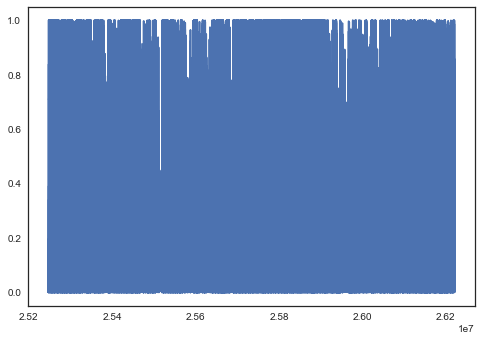

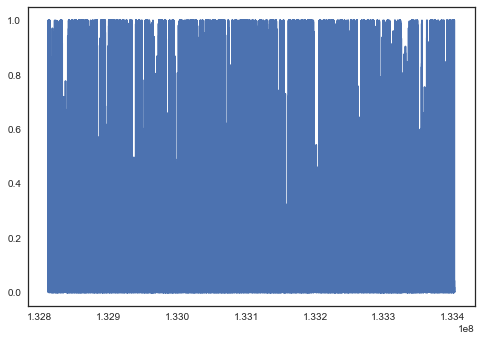

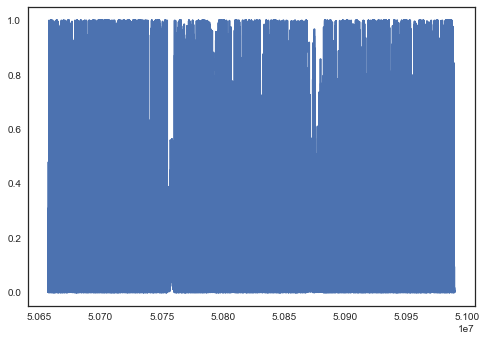

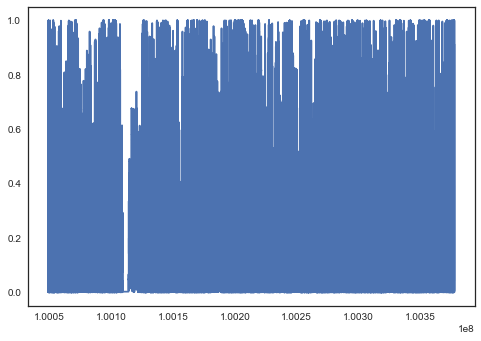

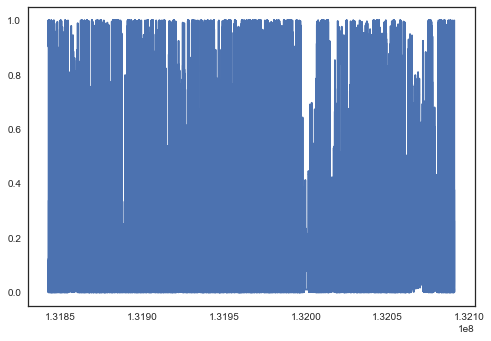

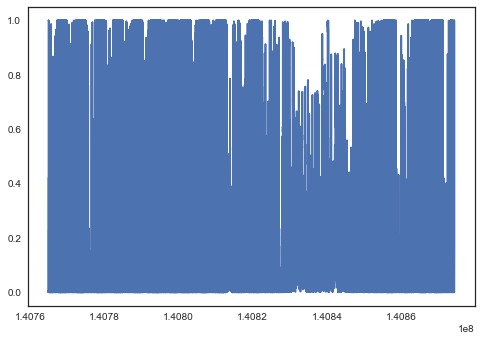

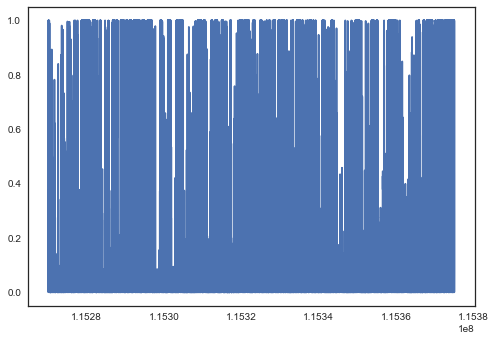

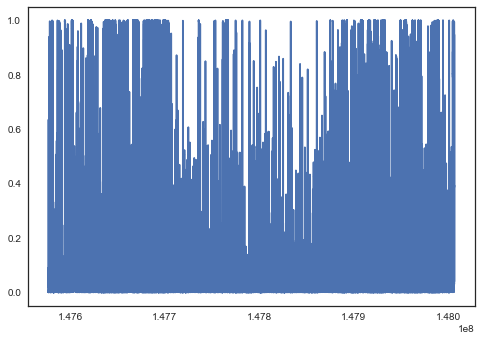

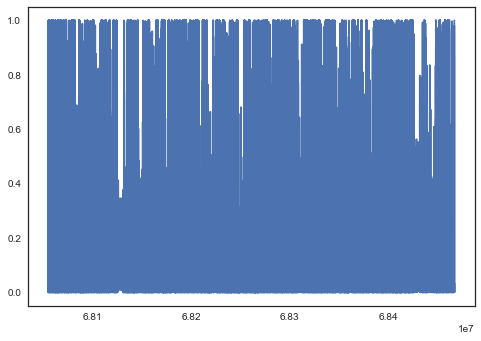

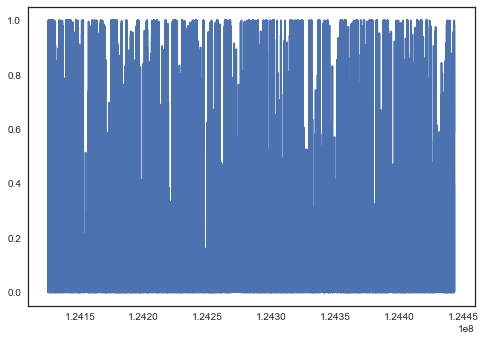

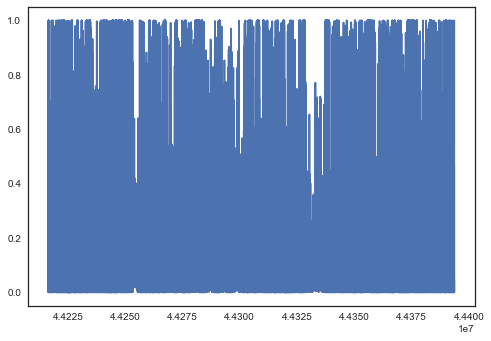

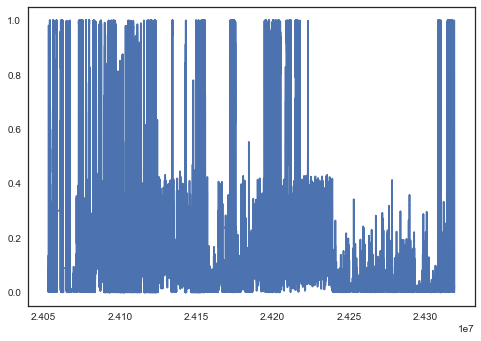

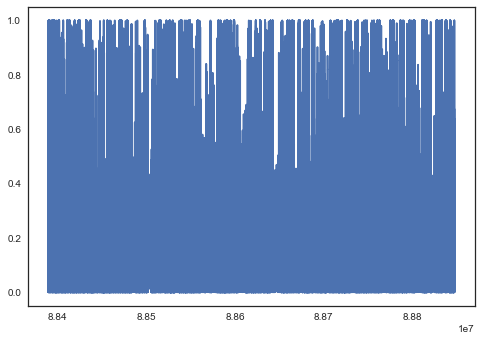

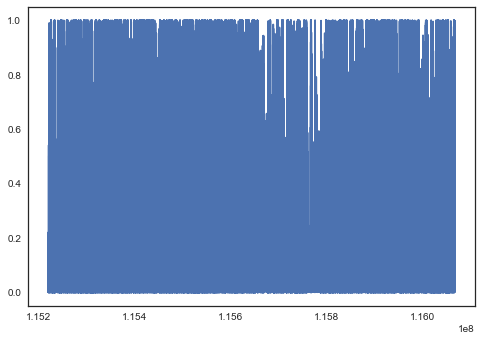

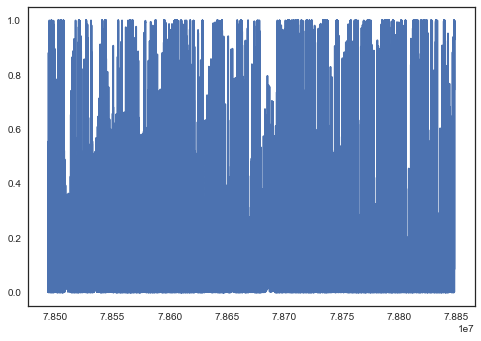

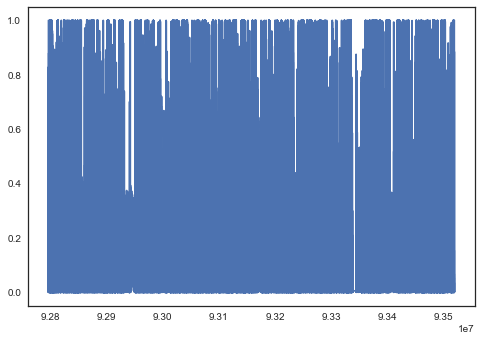

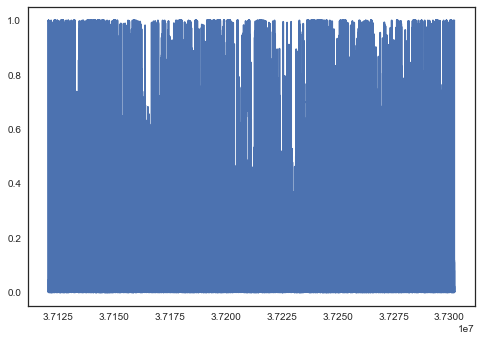

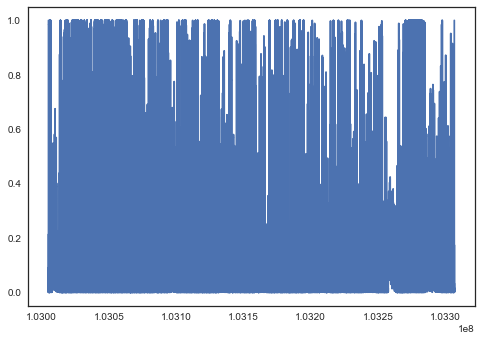

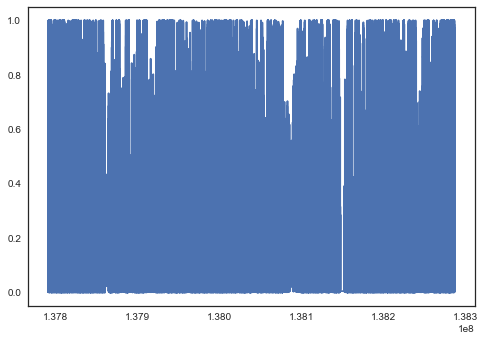

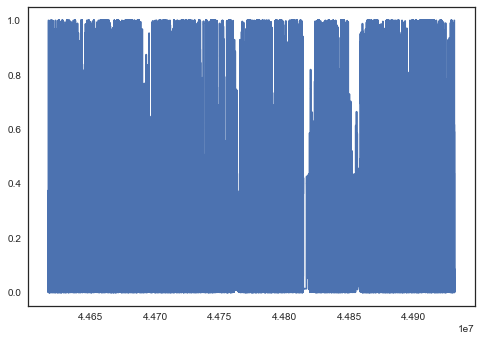

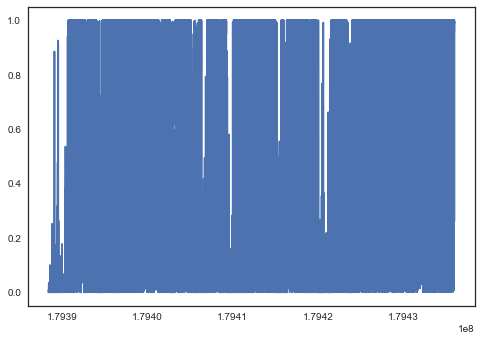

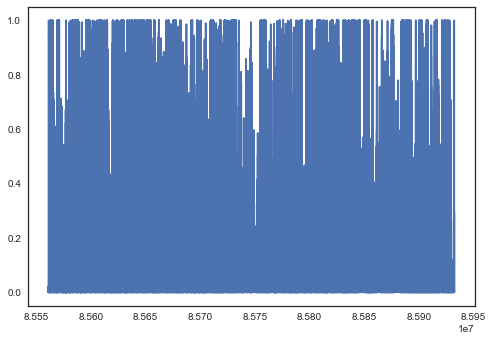

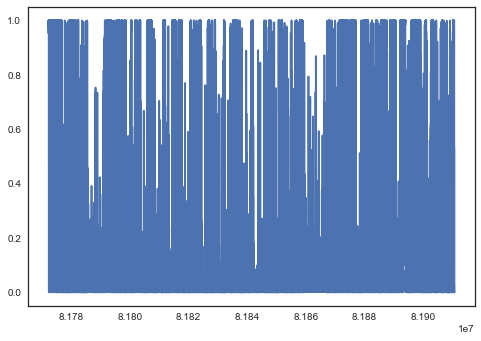

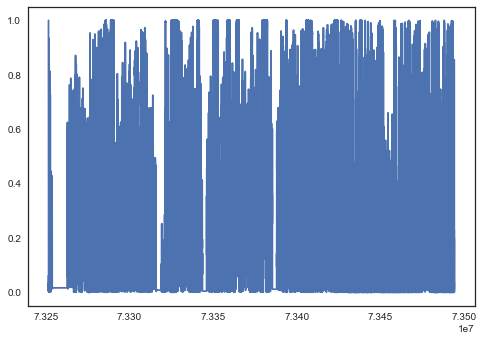

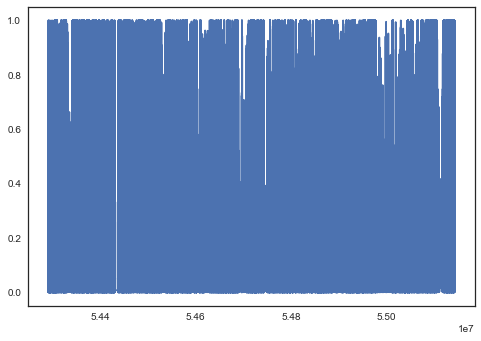

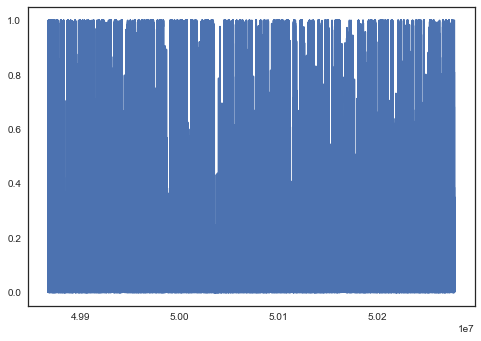

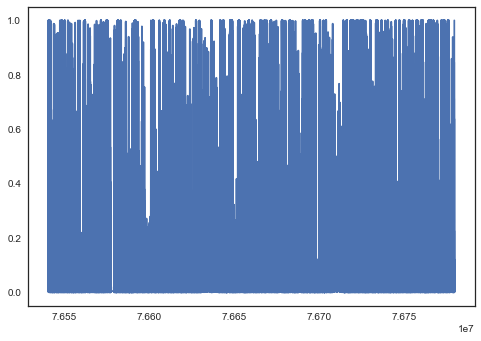

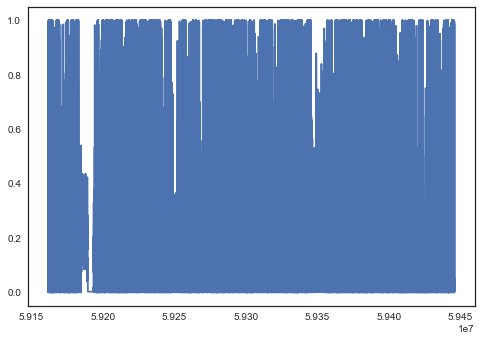

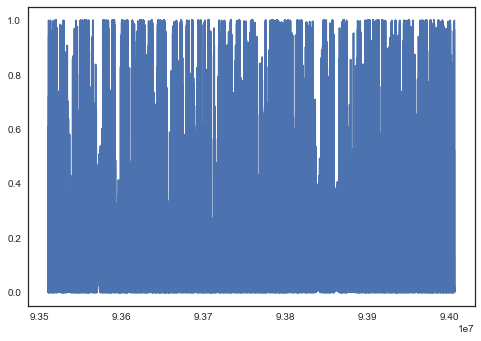

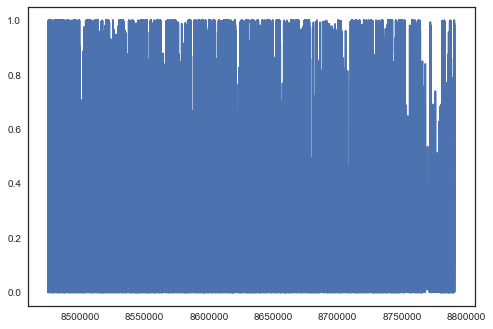

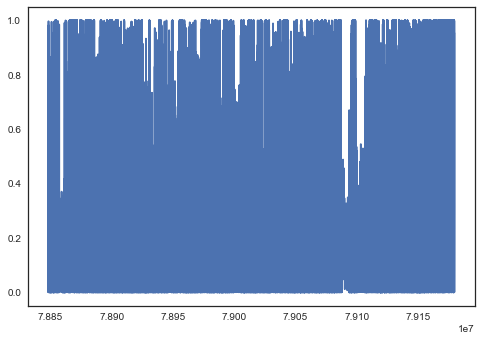

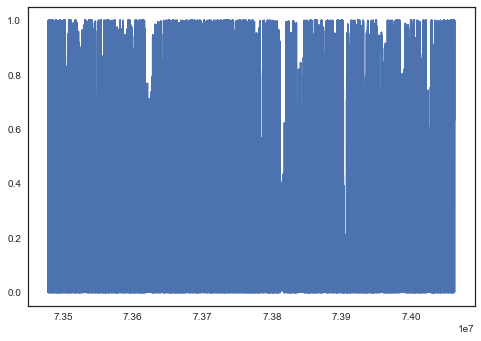

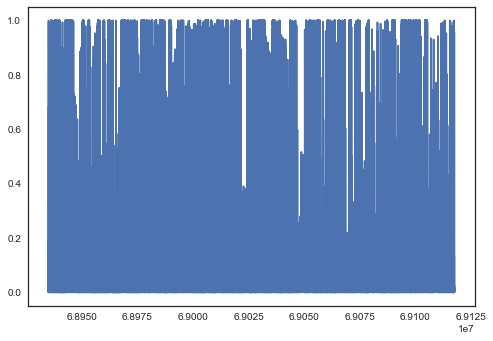

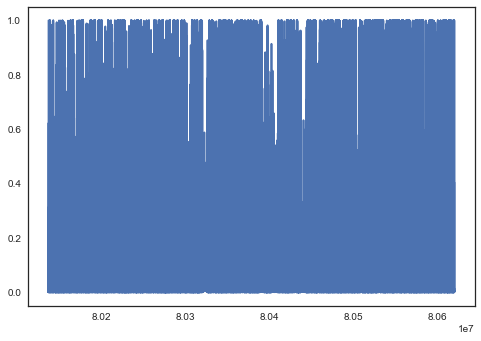

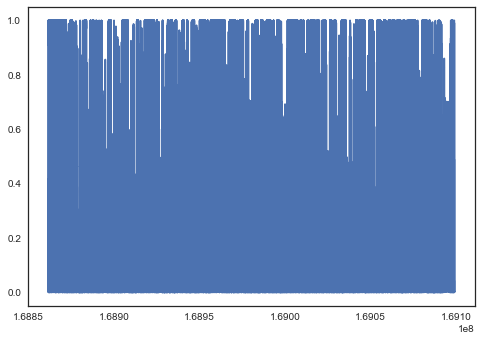

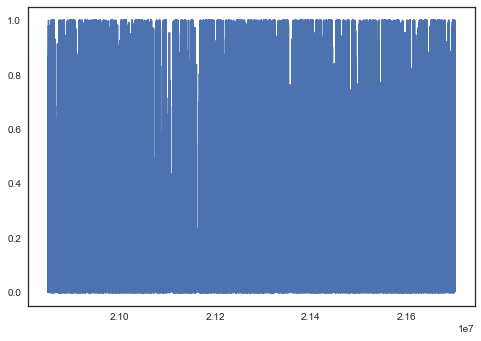

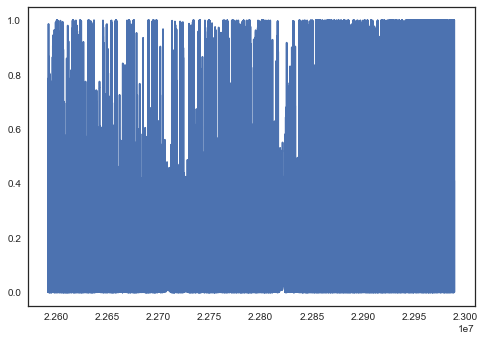

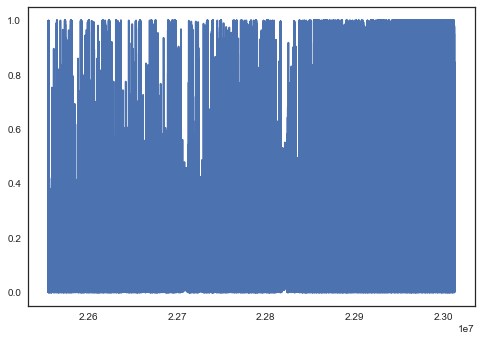

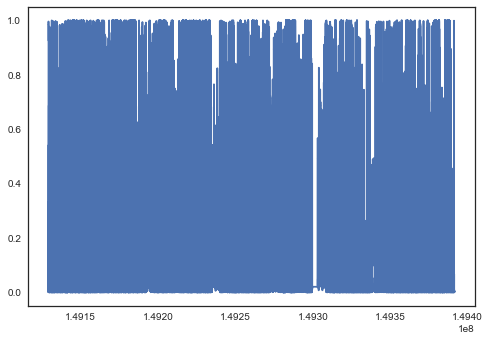

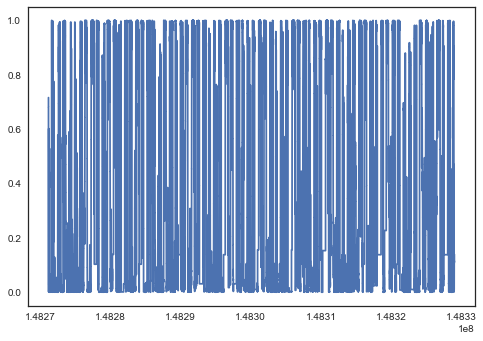

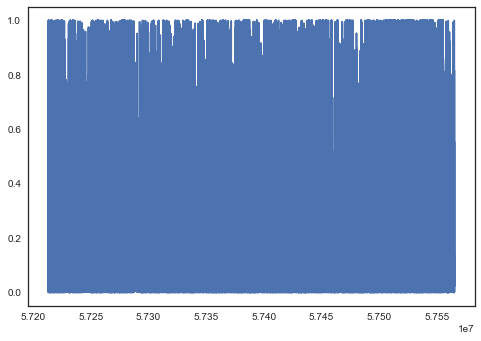

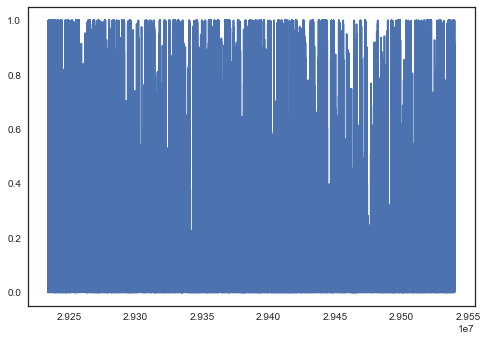

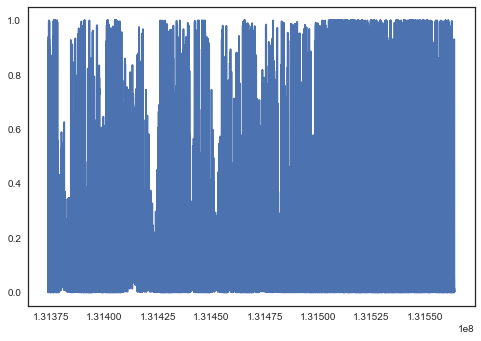

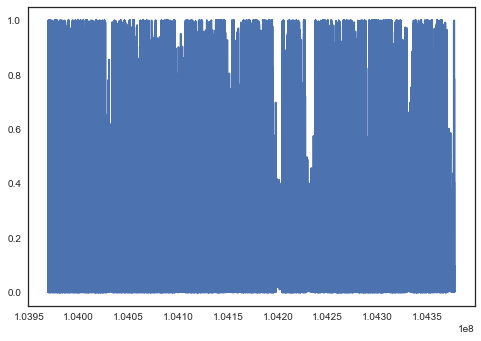

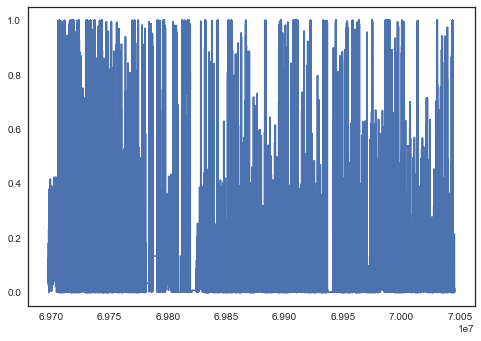

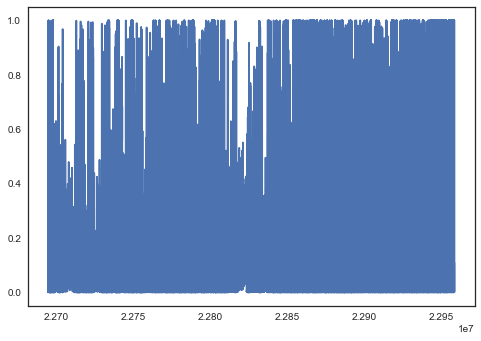

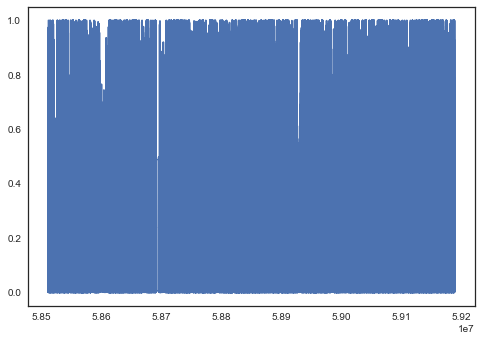

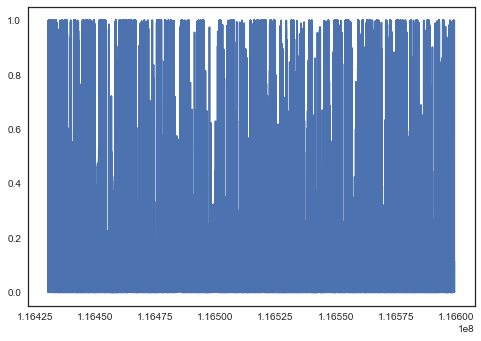

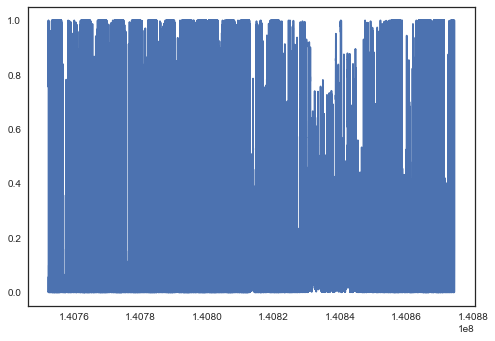

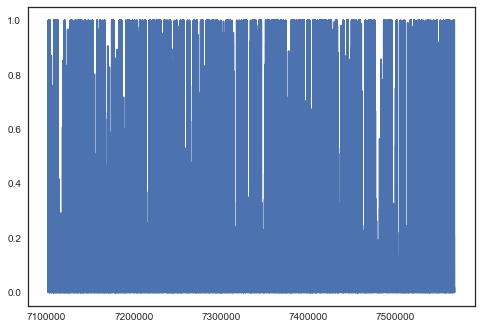

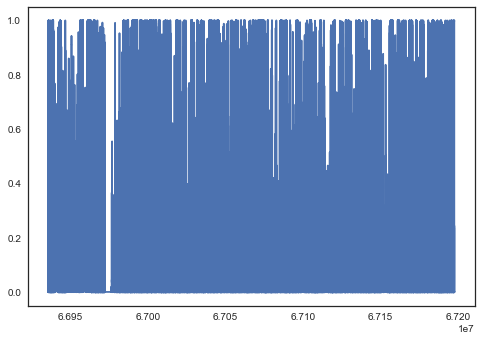

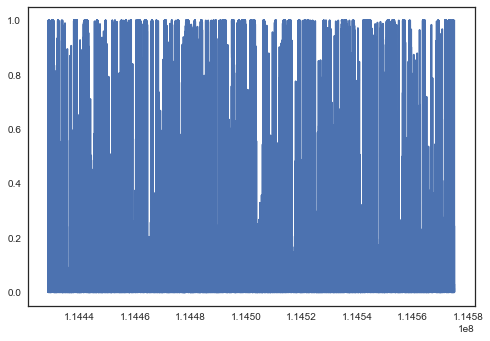

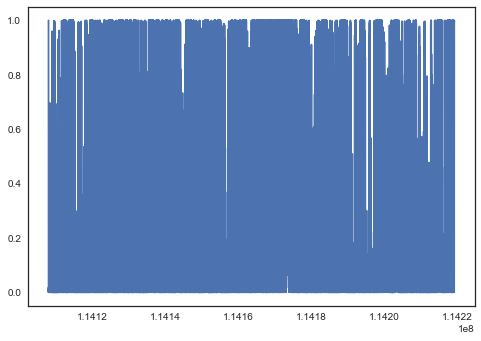

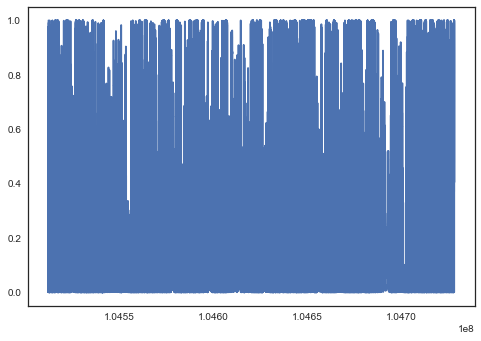

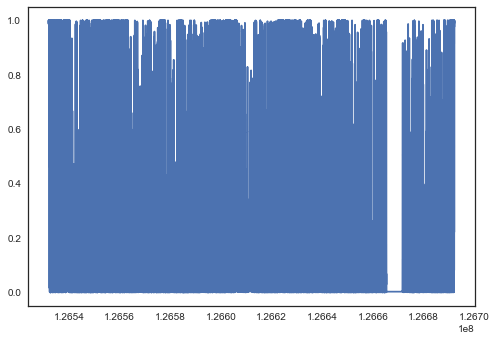

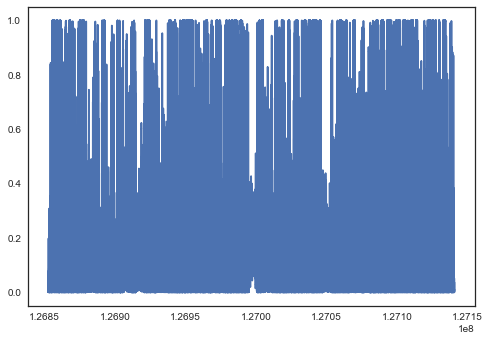

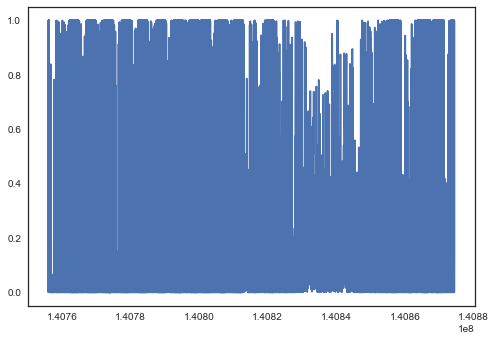

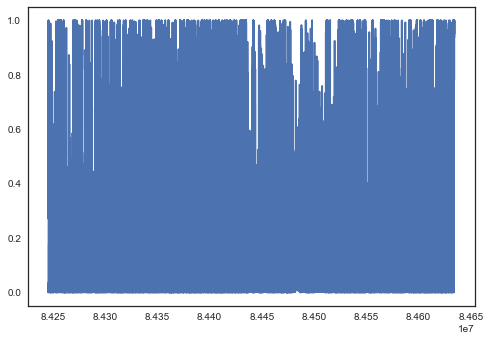

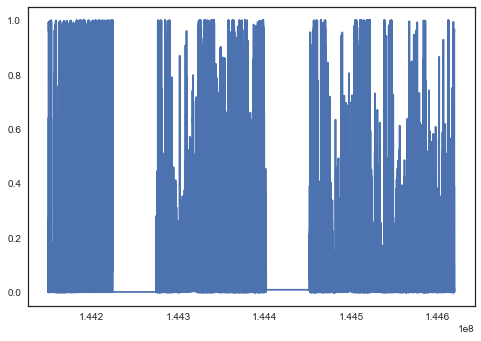

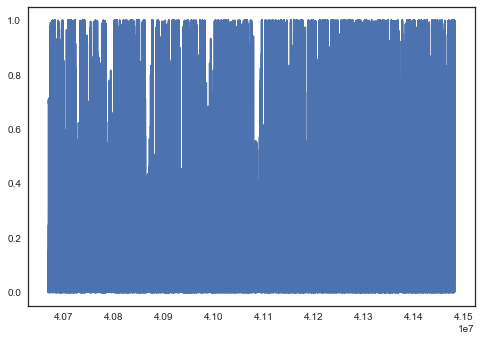

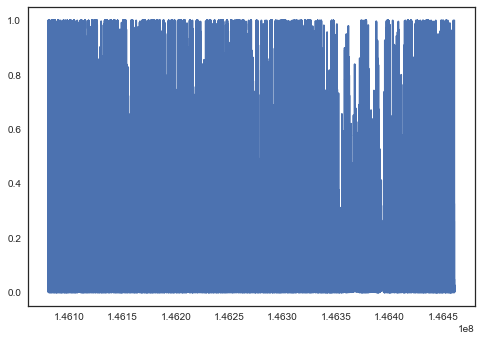

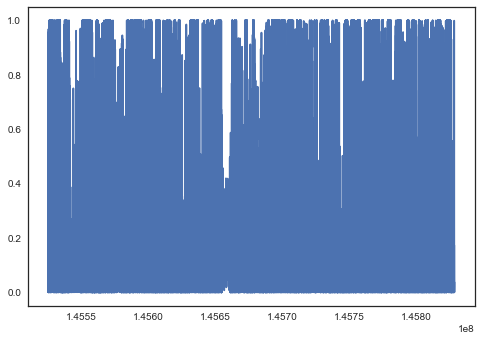

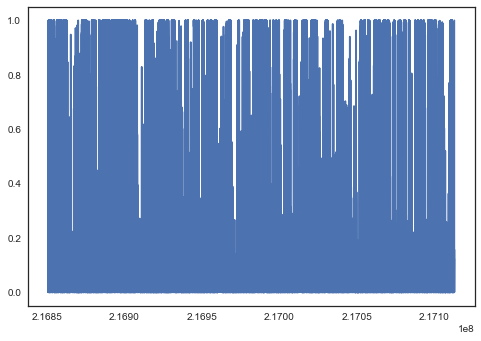

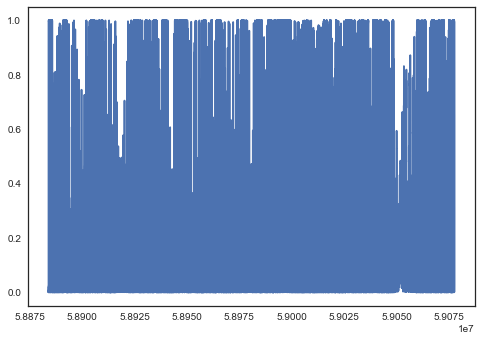

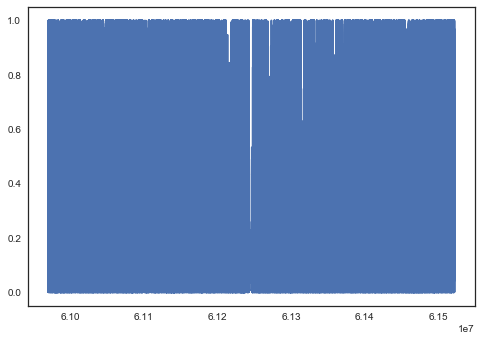

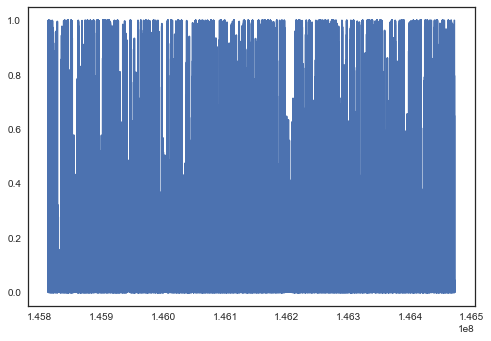

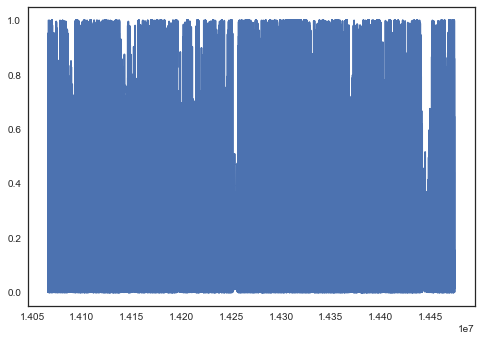

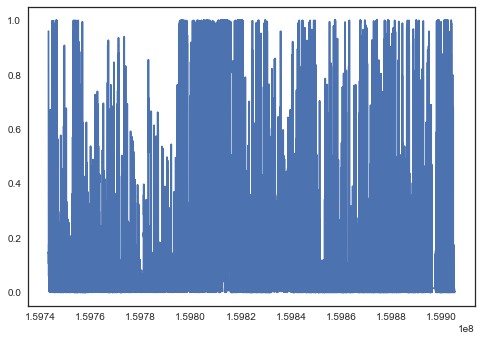

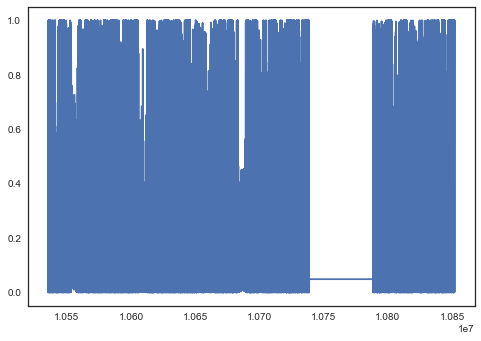

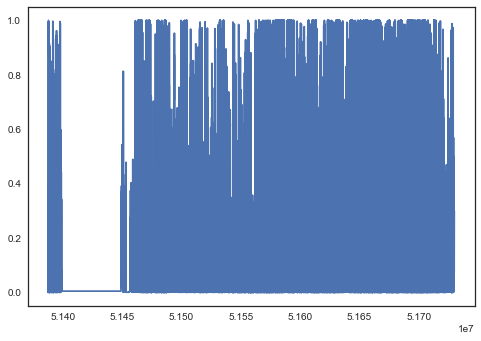

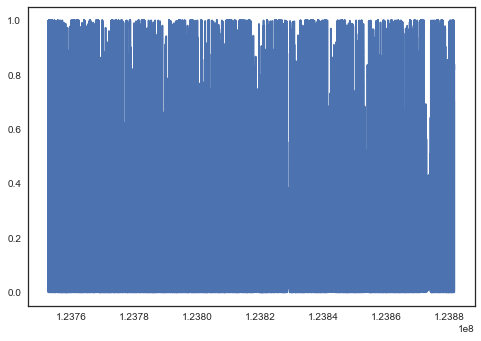

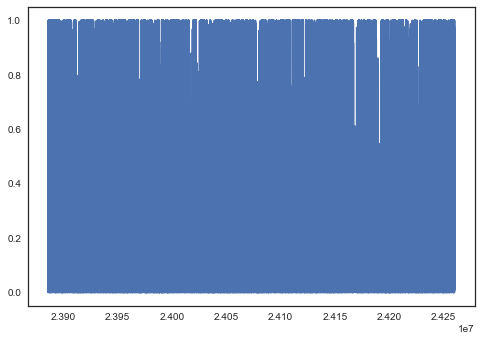

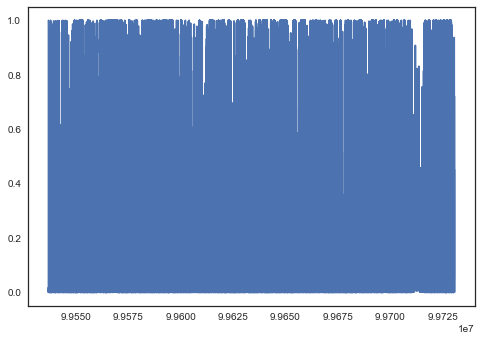

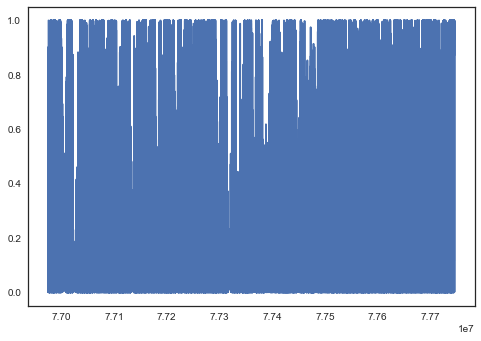

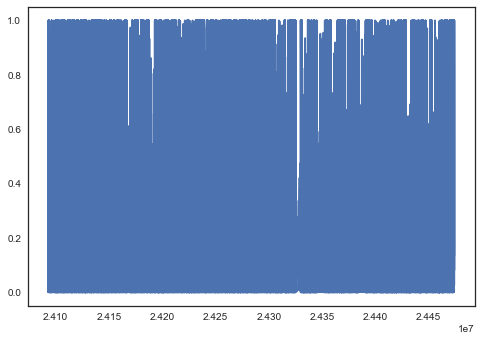

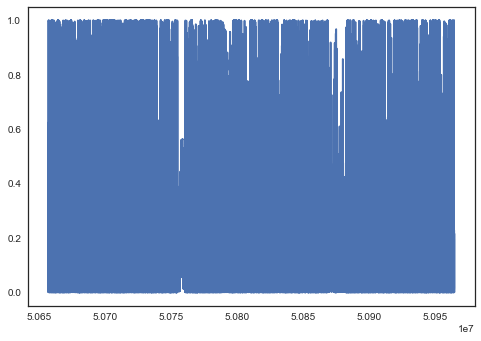

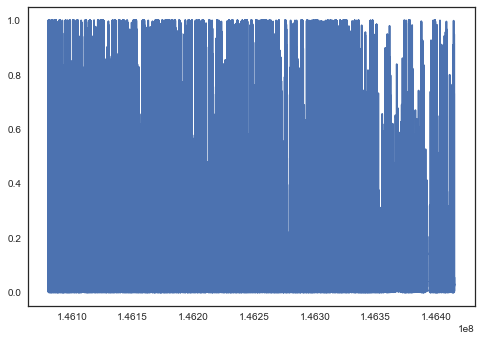

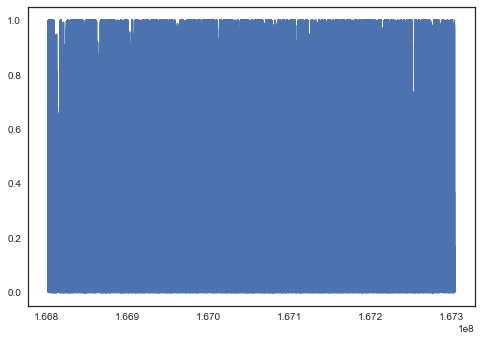

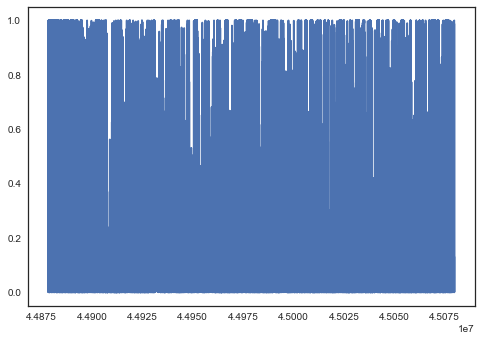

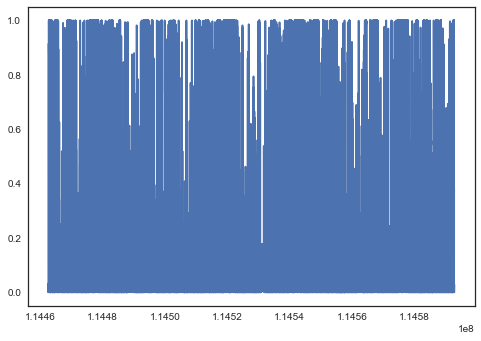

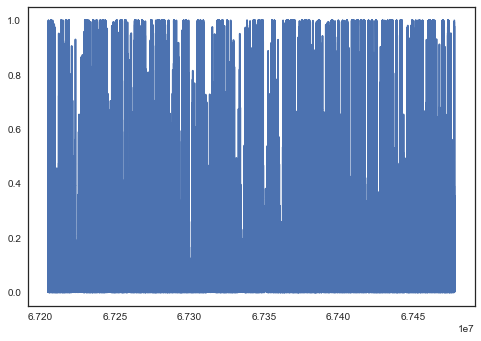

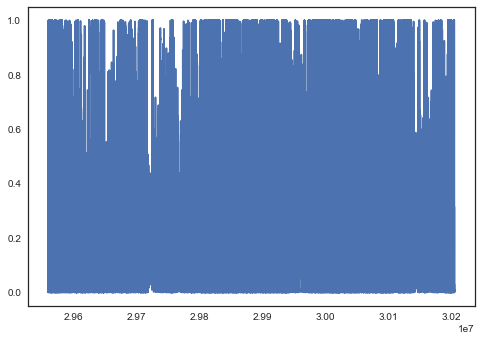

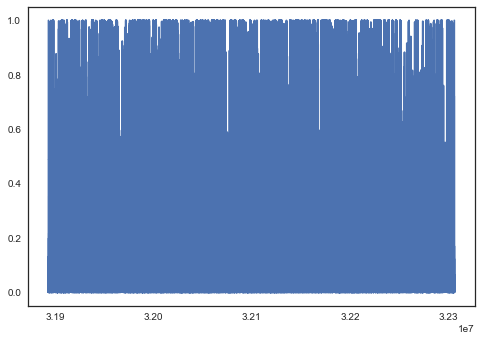

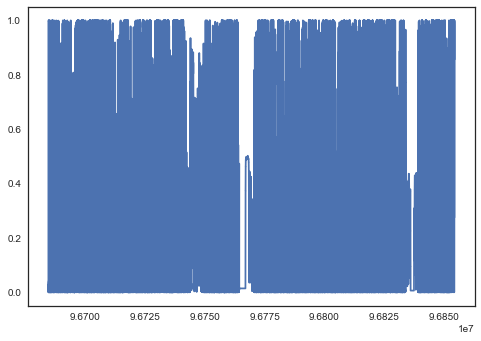

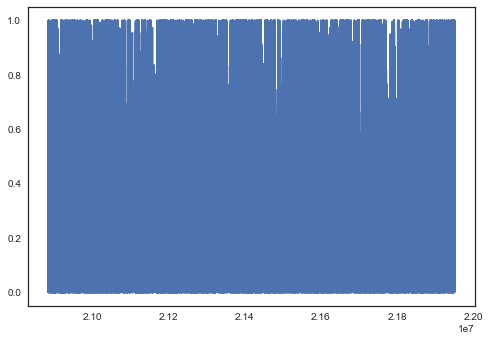

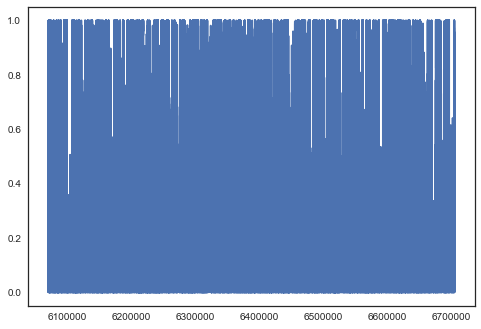

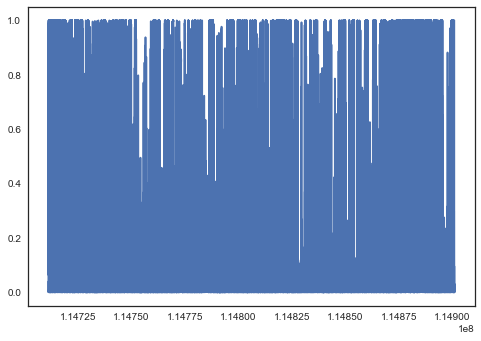

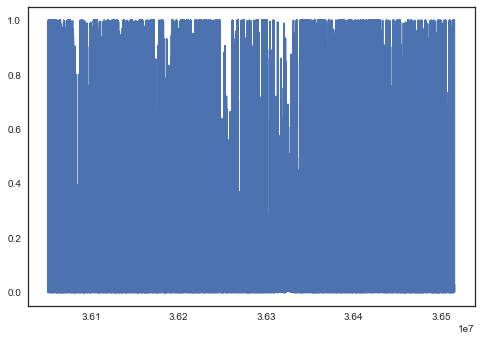

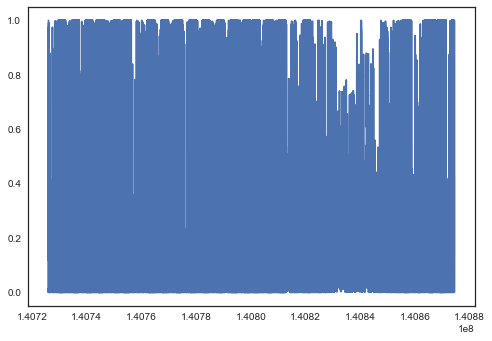

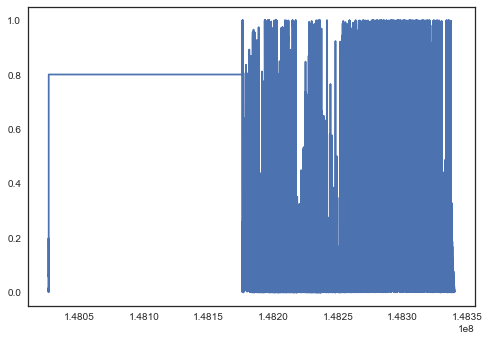

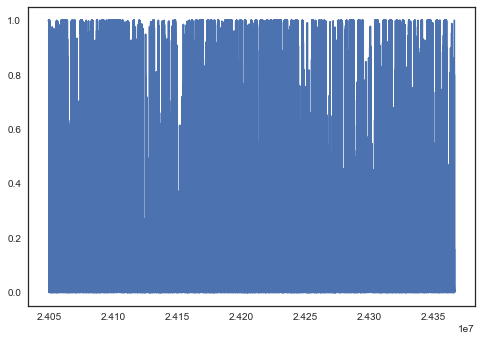

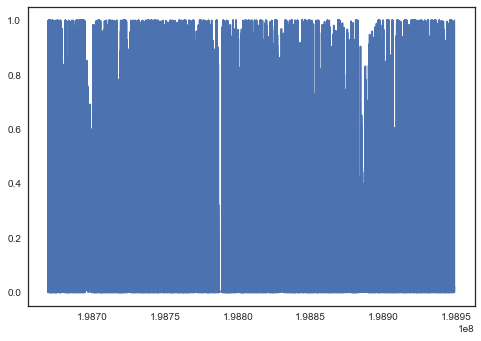

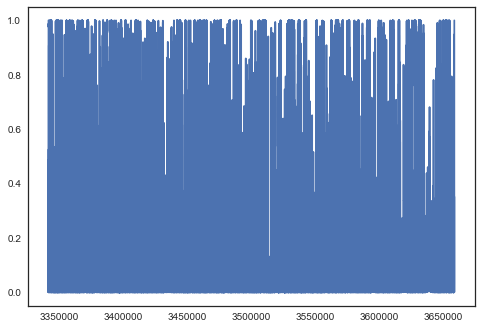

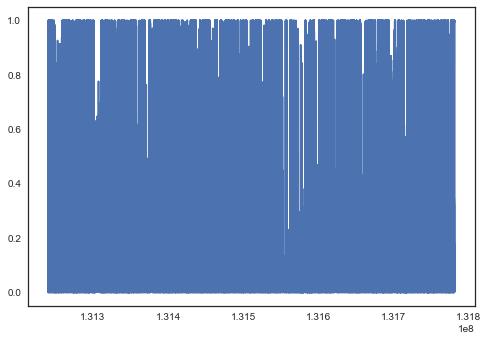

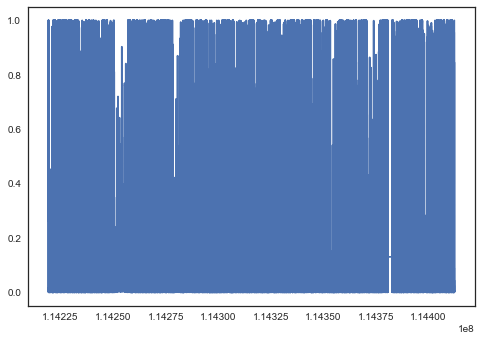

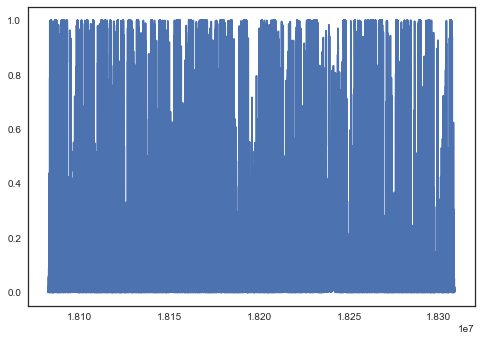

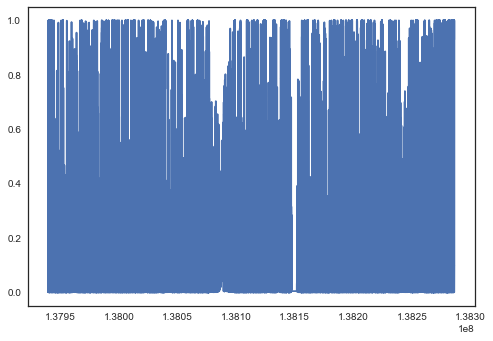

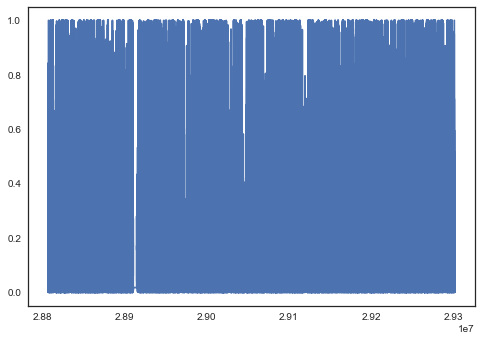

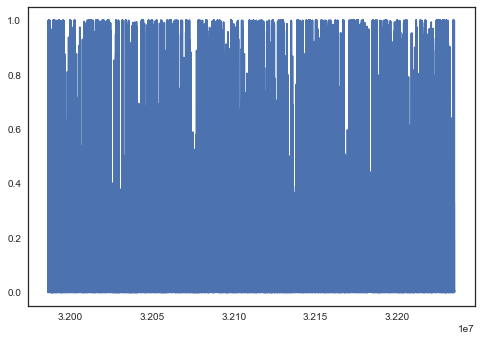

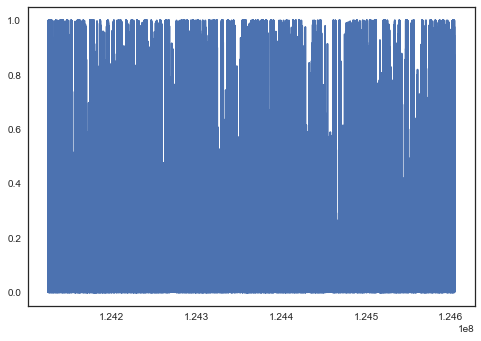

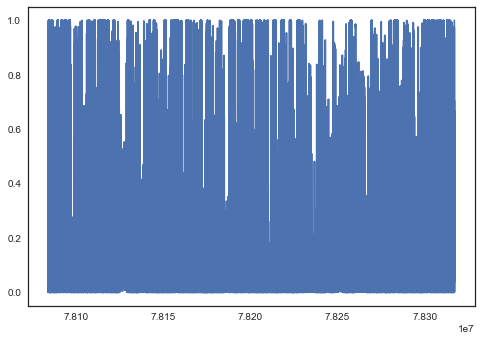

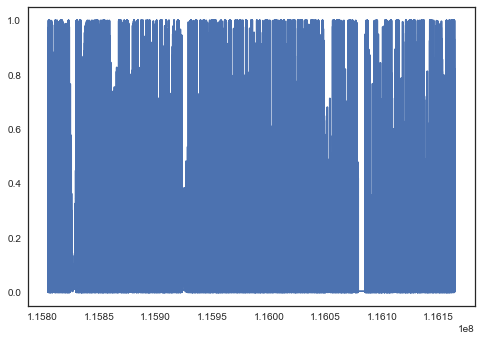

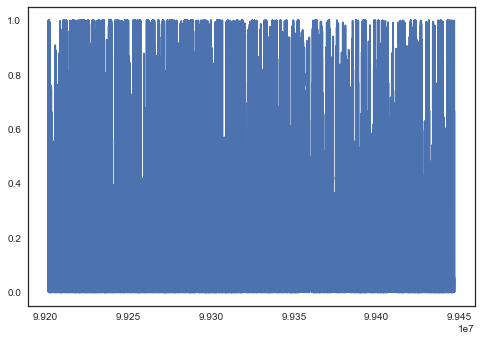

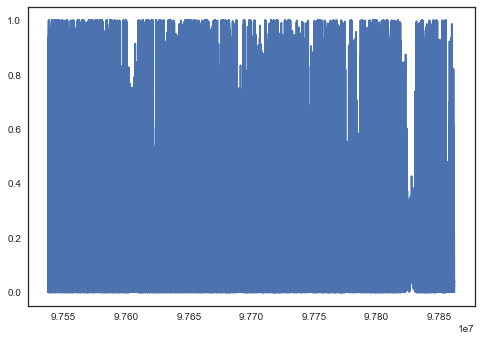

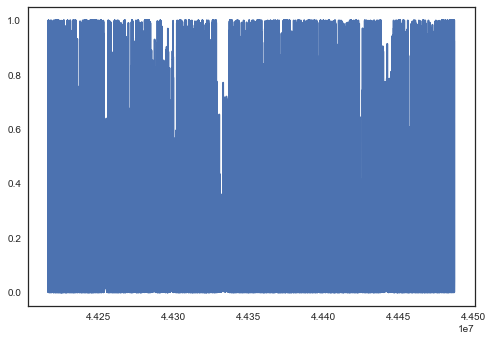

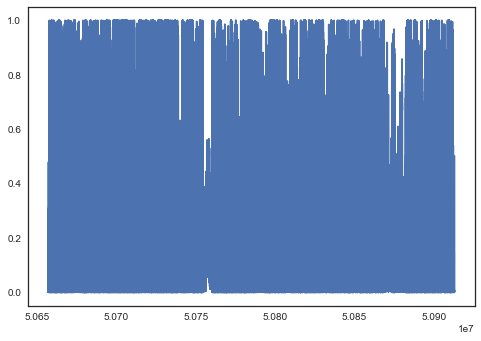

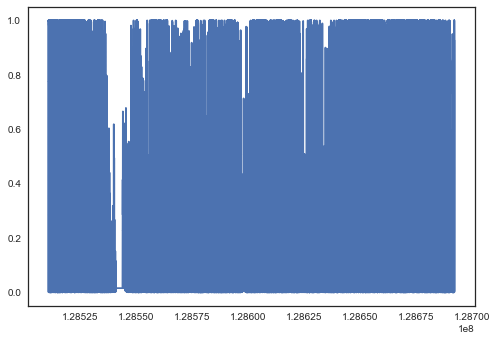

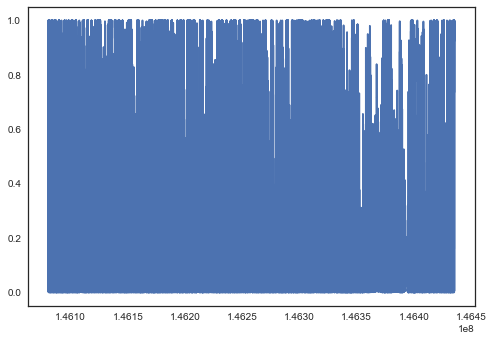

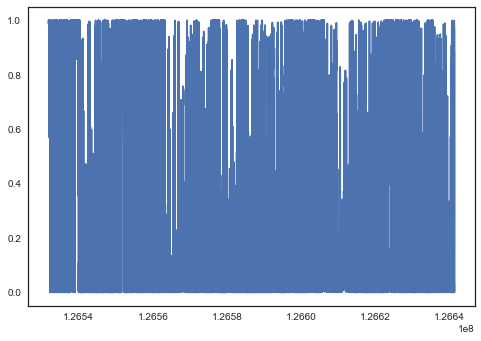

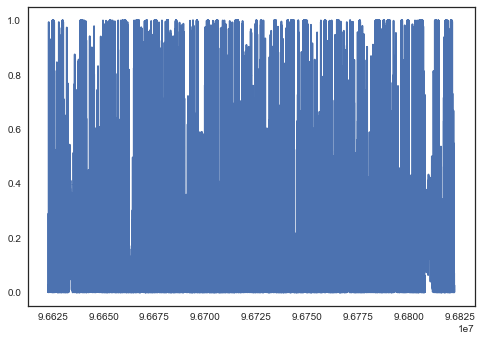

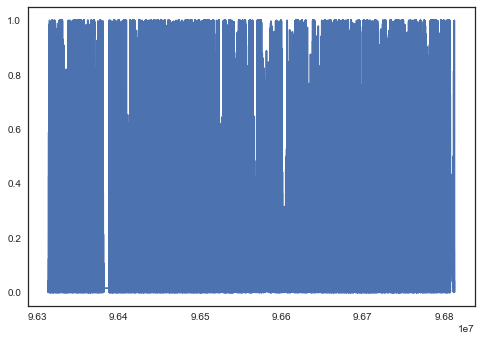

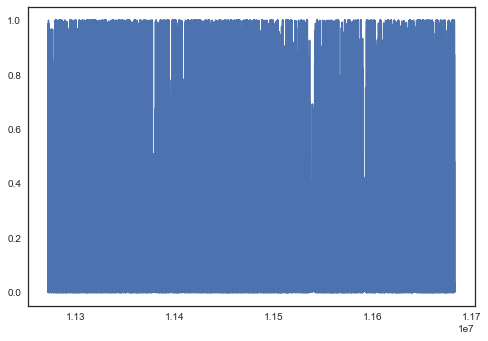

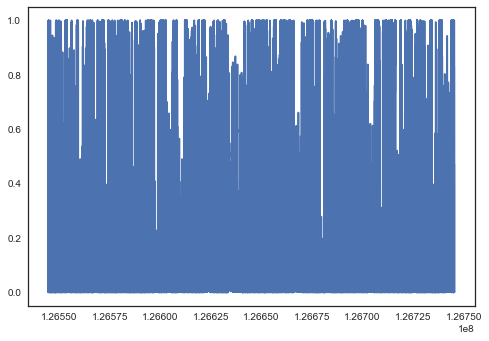

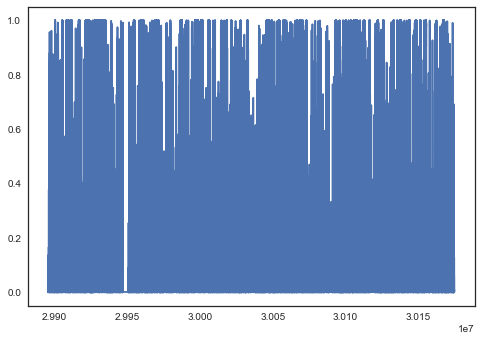

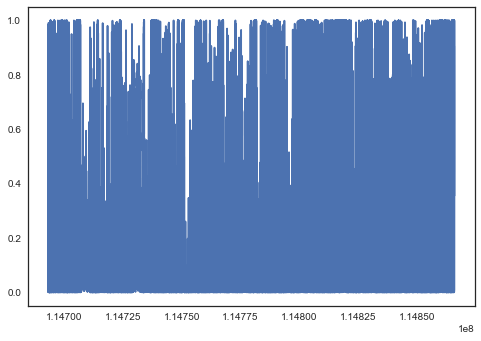

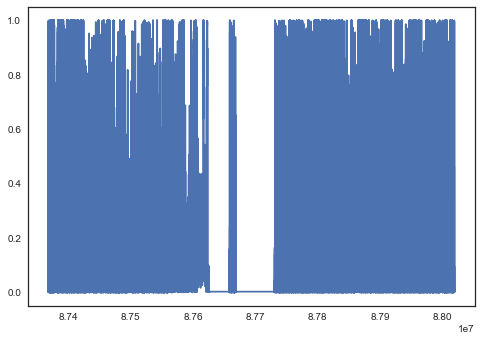

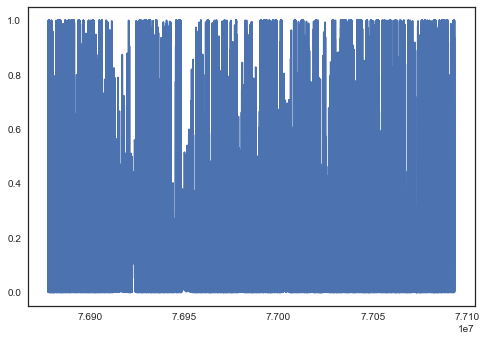

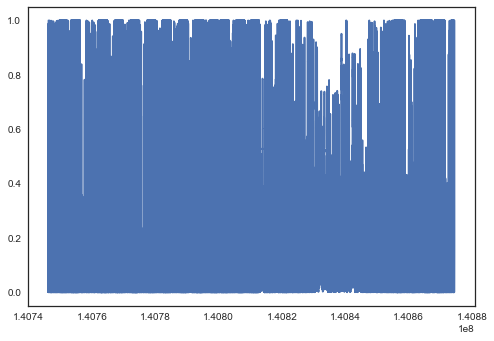

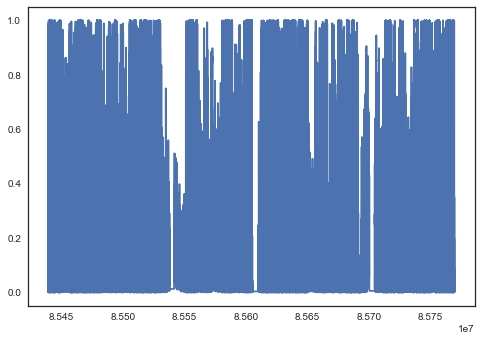

In [8]:

hcc_dict = dict()
'''loop through each file in glob object files and read its columns into table named region. 
Then take the ones with conservation greater than 0.75 and move into hcc.'''
for f in files:
    region = pd.read_table(f,names=["chromosome","start","end","conservation"])
    hcc = region.conservation >= 0.75
    '''convert table hcc into a list'''
    hcc_list= hcc.tolist()
    '''Identify peaks by counting how many base pairs in each region with conservation score greater than 0.75'''
    y = hcc_list.count(True)
    '''Then output the regions with more than 1000 of the peaks into a dictionary '''
    if y >= 10000:
        hcc_dict[f] = y
        plt.step(region["start"],region["conservation"])
        plt.show()
'''Write output of dictionary into a local file'''
with open('hcc_dict_output.txt', 'w') as file:
     file.write(json.dumps(hcc_dict))